# NEW IMPL

In [113]:
import pandas as pd
import numpy as np

## Merging datasets

In [114]:
# URL of the CSV file
url = "./data/audit.csv"
# Read the CSV into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

_id                          supplier_name public_water_system_id  \
0    1  East Bay Municipal Utilities District              CA0110005   
1    2  East Bay Municipal Utilities District              CA0110005   
2    3  East Bay Municipal Utilities District              CA0110005   
3    4  East Bay Municipal Utilities District              CA0110005   
4    5  East Bay Municipal Utilities District              CA0110005   

       reporting_month                county  hydrologic_region  climate_zone  \
0  2023-04-15T00:00:00  Alameda,Contra Costa  San Francisco Bay             3   
1  2023-03-15T00:00:00  Alameda,Contra Costa  San Francisco Bay             3   
2  2023-02-15T00:00:00  Alameda,Contra Costa  San Francisco Bay             3   
3  2023-01-15T00:00:00  Alameda,Contra Costa  San Francisco Bay             3   
4  2022-12-15T00:00:00  Alameda,Contra Costa  San Francisco Bay             3   

   total_population_served  reference_2014_population  \
0                  1440000                    1379000   
1                  1440000                    1379000   
2                  1440000                    1379000   
3                  1440000                    1379000   
4                  1430000                    1379000   

  county_under_drought_declaration  ...  \
0                              NaN  ...   
1                              Yes  ...   
2                              Yes  ...   
3                              Yes  ...   
4                              Yes  ...   

  reported_preliminary_commercial_industrial_and_institutional_wa  \
0                                                NaN                
1                                              739.0                
2                                              767.0                
3                                              939.0                
4                                              816.0                

  reported_final_commercial_industrial_and_institutional_water  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   reported_recycled_water reported_non_revenue_water  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                      NaN                        NaN   
3                      NaN                        NaN   
4                      NaN                        NaN   

   calculated_total_potable_water_production_gallons_ag_excluded  \
0                                       4.026000e+09               
1                                       3.672000e+09               
2                                       3.358000e+09               
3                                       3.696000e+09               
4                                       3.722000e+09               

   calculated_total_potable_water_production_gallons_2013_ag_exclu  \
0                                       5.418000e+09                 
1                                       4.928000e+09                 
2                                       4.016000e+09                 
3                                       4.099000e+09                 
4                                       4.772000e+09                 

   calculated_commercial_agricultural_water_gallons  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   calculated_commercial_agricultural_water_gallons_2013  calculated_r_gpcd  \
0                                                0.0                58.7125   
1      

In [115]:
# Convert 'reporting_month' column to datetime
df['reporting_month'] = pd.to_datetime(df['reporting_month'])

# Create 'month_year' column in mm-yyyy format
df['month_year'] = df['reporting_month'].dt.strftime('%m-%Y')

# Display the modified DataFrame
df.head()

_id                          supplier_name public_water_system_id  \
0    1  East Bay Municipal Utilities District              CA0110005   
1    2  East Bay Municipal Utilities District              CA0110005   
2    3  East Bay Municipal Utilities District              CA0110005   
3    4  East Bay Municipal Utilities District              CA0110005   
4    5  East Bay Municipal Utilities District              CA0110005   

  reporting_month                county  hydrologic_region  climate_zone  \
0      2023-04-15  Alameda,Contra Costa  San Francisco Bay             3   
1      2023-03-15  Alameda,Contra Costa  San Francisco Bay             3   
2      2023-02-15  Alameda,Contra Costa  San Francisco Bay             3   
3      2023-01-15  Alameda,Contra Costa  San Francisco Bay             3   
4      2022-12-15  Alameda,Contra Costa  San Francisco Bay             3   

   total_population_served  reference_2014_population  \
0                  1440000                    1379000   
1                  1440000                    1379000   
2                  1440000                    1379000   
3                  1440000                    1379000   
4                  1430000                    1379000   

  county_under_drought_declaration  ...  \
0                              NaN  ...   
1                              Yes  ...   
2                              Yes  ...   
3                              Yes  ...   
4                              Yes  ...   

  reported_final_commercial_industrial_and_institutional_water  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

  reported_recycled_water  reported_non_revenue_water  \
0                     NaN                         NaN   
1                     NaN                         NaN   
2                     NaN                         NaN   
3                     NaN                         NaN   
4                     NaN                         NaN   

  calculated_total_potable_water_production_gallons_ag_excluded  \
0                                       4.026000e+09              
1                                       3.672000e+09              
2                                       3.358000e+09              
3                                       3.696000e+09              
4                                       3.722000e+09              

   calculated_total_potable_water_production_gallons_2013_ag_exclu  \
0                                       5.418000e+09                 
1                                       4.928000e+09                 
2                                       4.016000e+09                 
3                                       4.099000e+09                 
4                                       4.772000e+09                 

   calculated_commercial_agricultural_water_gallons  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   calculated_commercial_agricultural_water_gallons_2013  calculated_r_gpcd  \
0                                                0.0                58.7125   
1                                                0.0                47.7097   
2                                                0.0                44.9732   
3                                                0.0                48.0215   
4                                                0.0                50.3767   

                                       qualification  month_year  
0  1. To provide context…the average R-GPCD for A...     04-2023  
1  1. T

In [116]:
# Assuming your CSV file is named 'reservoir_data.csv'
reservoir_df = pd.read_csv('./data/Reservoir_Monthly_Data.csv')

# Convert 'date' column to datetime
reservoir_df['DATE'] = pd.to_datetime(reservoir_df['DATE'])

# Extract month and year
reservoir_df['month_year'] = reservoir_df['DATE'].dt.strftime('%m-%Y')
reservoir_df.drop(['DATE'], axis=1, inplace=True)
reservoir_df.rename(columns={'STORAGE': 'reservoir_storage'}, inplace=True)
# Display the modified DataFrame
reservoir_df.head()

reservoir_storage month_year
0          9247201.0    01-2014
1          8971363.0    01-2015
2          8790246.0    01-2016
3         16503134.0    01-2017
4         16297579.0    01-2018

In [117]:
# Merge the DataFrames on 'month_year'
merged_df = pd.merge(df, reservoir_df, on='month_year', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()
merged_df.columns

Index(['_id', 'supplier_name', 'public_water_system_id', 'reporting_month',
       'county', 'hydrologic_region', 'climate_zone',
       'total_population_served', 'reference_2014_population',
       'county_under_drought_declaration',
       'water_shortage_contingency_stage_invoked',
       'water_shortage_level_indicator',
       'dwr_state_standard_level_corresponding_to_stage',
       'water_production_units',
       'reported_preliminary_total_potable_water_production',
       'reported_final_total_potable_water_production',
       'preliminary_percent_residential_use', 'final_percent_residential_use',
       'reported_preliminary_commercial_agricultural_water',
       'reported_final_commercial_agricultural_water',
       'reported_preliminary_commercial_industrial_and_institutional_wa',
       'reported_final_commercial_industrial_and_institutional_water',
       'reported_recycled_water', 'reported_non_revenue_water',
       'calculated_total_potable_water_production_gallons_a

In [118]:
ground_water=pd.read_csv('./data/i08_GroundwaterDepthSeasonal_Points.csv')
ground_water.columns

Index(['X', 'Y', 'OBJECTID', 'SITE_CODE', 'MSMT_DATE', 'EWM_STATION_ID',
       'WELL_NAME', 'SWN', 'WELL_USE', 'WLM_ORG_NAME', 'WSE', 'GSE_WSE', 'RPE',
       'GSE', 'MSMT_ISSUE', 'MSMT_YEAR', 'MSMT_SEASON', 'COMMENTS', 'SOURCE',
       'LAST_MODIFIED_DATE', 'MODIFIED_BY', 'DATE_DATA_REFERS_TO'],
      dtype='object')

In [119]:
# Convert 'MSMT_DATE' column to datetime
ground_water['MSMT_DATE'] = pd.to_datetime(ground_water['MSMT_DATE'])

# Extract month and year
ground_water['month_year'] = ground_water['MSMT_DATE'].dt.strftime('%m-%Y')
ground_water.drop(['MSMT_DATE', 'OBJECTID', 'SITE_CODE', 'SWN', 'SOURCE', 'MODIFIED_BY', 'EWM_STATION_ID', 'WELL_NAME'], axis=1, inplace=True)
ground_water.head()

X             Y    WELL_USE  \
0 -1.356611e+07  4.728593e+06       Other   
1 -1.340200e+07  4.409710e+06  Irrigation   
2 -1.339196e+07  4.132534e+06  Irrigation   
3 -1.363183e+07  4.611406e+06  Irrigation   
4 -1.358730e+07  4.855268e+06  Irrigation   

                               WLM_ORG_NAME     WSE  GSE_WSE     RPE     GSE  \
0                                         1     NaN      NaN   39.89   39.39   
1  San Luis & Delta-Mendota Water Authority  109.69    23.31  134.08  133.00   
2                                      5082  411.05   250.95  663.00  662.00   
3                                      2053   -5.17    17.60   12.43   12.43   
4                                            172.52    26.90  200.12  199.42   

  MSMT_ISSUE  MSMT_YEAR MSMT_SEASON COMMENTS      LAST_MODIFIED_DATE  \
0        NaN       2023      Spring      NaN  2023/10/01 00:00:00+00   
1                  2018      Spring      NaN  2019/04/19 00:00:00+00   
2        NaN       2021      Spring      NaN  2021/09/09 00:00:00+00   
3        NaN       2022      Spring      NaN  2022/10/01 00:00:00+00   
4        NaN       2020      Spring      NaN  2020/03/24 08:39:12+00   

      DATE_DATA_REFERS_TO month_year  
0  2023/03/15 00:00:00+00    04-2023  
1  2018/03/15 00:00:00+00    03-2018  
2  2021/03/15 00:00:00+00    03-2021  
3  2022/03/15 00:00:00+00    05-2022  
4  2020/03/15 00:00:00+00    03-2020

In [120]:
ground_water_dedup = ground_water.drop_duplicates(subset='month_year')
combi_df = pd.merge(merged_df, ground_water_dedup, on='month_year', how='left')
print(combi_df.head())  # Shows the first 5 rows
combi_df.columns

   _id                          supplier_name public_water_system_id  \
0    1  East Bay Municipal Utilities District              CA0110005   
1    2  East Bay Municipal Utilities District              CA0110005   
2    3  East Bay Municipal Utilities District              CA0110005   
3    4  East Bay Municipal Utilities District              CA0110005   
4    5  East Bay Municipal Utilities District              CA0110005   

  reporting_month                county  hydrologic_region  climate_zone  \
0      2023-04-15  Alameda,Contra Costa  San Francisco Bay             3   
1      2023-03-15  Alameda,Contra Costa  San Francisco Bay             3   
2      2023-02-15  Alameda,Contra Costa  San Francisco Bay             3   
3      2023-01-15  Alameda,Contra Costa  San Francisco Bay             3   
4      2022-12-15  Alameda,Contra Costa  San Francisco Bay             3   

   total_population_served  reference_2014_population  \
0                  1440000                    1379000

Index(['_id', 'supplier_name', 'public_water_system_id', 'reporting_month',
       'county', 'hydrologic_region', 'climate_zone',
       'total_population_served', 'reference_2014_population',
       'county_under_drought_declaration',
       'water_shortage_contingency_stage_invoked',
       'water_shortage_level_indicator',
       'dwr_state_standard_level_corresponding_to_stage',
       'water_production_units',
       'reported_preliminary_total_potable_water_production',
       'reported_final_total_potable_water_production',
       'preliminary_percent_residential_use', 'final_percent_residential_use',
       'reported_preliminary_commercial_agricultural_water',
       'reported_final_commercial_agricultural_water',
       'reported_preliminary_commercial_industrial_and_institutional_wa',
       'reported_final_commercial_industrial_and_institutional_water',
       'reported_recycled_water', 'reported_non_revenue_water',
       'calculated_total_potable_water_production_gallons_a

### Predicting precipitation and ETo values based on historic data

Commented the prediction model as I have the dataset saved and wanted to save time

In [122]:
'''
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset (adjust file path as needed)
df = pd.read_csv('./data/precip_eto.csv')

# Convert ModelDate to datetime format if it's not already
df['ModelDate'] = pd.to_datetime(df['ModelDate'])

# Extract month and year into separate columns
df['Month'] = df['ModelDate'].dt.month
df['Year'] = df['ModelDate'].dt.year

# Filter to include only data from 1915 to 2011
df_filtered = df[(df['Year'] >= 1915) & (df['Year'] <= 2011)]
'''

"\nfrom datetime import datetime\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import train_test_split\n\n# Load your dataset (adjust file path as needed)\ndf = pd.read_csv('./data/precip_eto.csv')\n\n# Convert ModelDate to datetime format if it's not already\ndf['ModelDate'] = pd.to_datetime(df['ModelDate'])\n\n# Extract month and year into separate columns\ndf['Month'] = df['ModelDate'].dt.month\ndf['Year'] = df['ModelDate'].dt.year\n\n# Filter to include only data from 1915 to 2011\ndf_filtered = df[(df['Year'] >= 1915) & (df['Year'] <= 2011)]\n"

In [123]:
'''
# Prepare features and targets
X = df_filtered[['Month', 'Year']]
y_precip = df_filtered['Precip_mm']
y_eto = df_filtered['ETo_mm']

# Train models
rf_precip = RandomForestRegressor(n_estimators=100, random_state=42)
rf_eto = RandomForestRegressor(n_estimators=100, random_state=42)

rf_precip.fit(X, y_precip)
rf_eto.fit(X, y_eto)
'''

"\n# Prepare features and targets\nX = df_filtered[['Month', 'Year']]\ny_precip = df_filtered['Precip_mm']\ny_eto = df_filtered['ETo_mm']\n\n# Train models\nrf_precip = RandomForestRegressor(n_estimators=100, random_state=42)\nrf_eto = RandomForestRegressor(n_estimators=100, random_state=42)\n\nrf_precip.fit(X, y_precip)\nrf_eto.fit(X, y_eto)\n"

In [124]:
'''
# Create a dataframe with all months from 2014-2023
future_dates = []
for year in range(2014, 2024):
    for month in range(1, 13):
        future_dates.append({'Year': year, 'Month': month})

future_df = pd.DataFrame(future_dates)

# Generate predictions
future_df['Precip_mm'] = rf_precip.predict(future_df[['Month', 'Year']])
future_df['ETo_mm'] = rf_eto.predict(future_df[['Month', 'Year']])

# Add a date column for easier reference
future_df['Date'] = pd.to_datetime(future_df[['Year', 'Month']].assign(day=1))

# Create month_year column in mm-yyyy format
# Using zfill to ensure month is two digits (e.g., 01 instead of 1)
future_df['month_year'] = future_df['Month'].astype(str).str.zfill(2) + '-' + future_df['Year'].astype(str)
future_df.drop(['Year', 'Month'], axis=1, inplace=True)
# Save predictions to CSV
future_df.to_csv('./data/predicted_precip_eto_2014_2023.csv', index=False)
'''
# Load the predicted data
future_df = pd.read_csv('./data/predicted_precip_eto_2014_2023.csv')

In [158]:
# Merge future_df with combi_df on 'month_year'
combined_df = pd.merge(future_df,combi_df, on='month_year', how='inner')

# Display the first few rows of the combined dataframe
combined_df

Precip_mm      ETo_mm        Date month_year    _id  \
0       2.657044  210.338100  2014-06-01    06-2014    107   
1       2.657044  210.338100  2014-06-01    06-2014    212   
2       2.657044  210.338100  2014-06-01    06-2014    320   
3       2.657044  210.338100  2014-06-01    06-2014    428   
4       2.657044  210.338100  2014-06-01    06-2014    536   
...          ...         ...         ...        ...    ...   
42464   8.213414  175.867104  2023-05-01    05-2023  41868   
42465   8.213414  175.867104  2023-05-01    05-2023  42088   
42466   8.213414  175.867104  2023-05-01    05-2023  42265   
42467   8.213414  175.867104  2023-05-01    05-2023  42337   
42468   8.213414  175.867104  2023-05-01    05-2023  42366   

                                    supplier_name  \
0           East Bay Municipal Utilities District   
1                              Morro Bay  City of   
2                      Yorba Linda Water District   
3                             Long Beach  City of   
4                              Los Banos, City of   
...                                           ...   
42464             City of Newman Water Department   
42465  Mountain House Community Services District   
42466            Greenfield County Water District   
42467         Thermalito Water and Sewer District   
42468           Santa Clarita Valley Water Agency   

                                  public_water_system_id reporting_month  \
0                                              CA0110005      2014-06-15   
1                                              CA4010011      2014-06-15   
2                                              CA3010037      2014-06-15   
3                                              CA1910065      2014-06-15   
4                                              CA2410005      2014-06-15   
...                                                  ...             ...   
42464                                          CA5010013      2023-05-15   
42465                                          CA3910027      2023-05-15   
42466                                          CA1510024      2023-05-15   
42467                                          CA0410008      2023-05-15   
42468  CA1910255,CA1910247,CA1910096,CA1910250,CA1910...      2023-05-15   

                     county  hydrologic_region  ...     WSE  GSE_WSE    RPE  \
0      Alameda,Contra Costa  San Francisco Bay  ...     NaN      NaN    NaN   
1           San Luis Obispo      Central Coast  ...     NaN      NaN    NaN   
2                    Orange        South Coast  ...     NaN      NaN    NaN   
3               Los Angeles        South Coast  ...     NaN      NaN    NaN   
4                    Merced  San Joaquin River  ...     NaN      NaN    NaN   
...                     ...                ...  ...     ...      ...    ...   
42464            Stanislaus  San Joaquin River  ...  527.78    33.12  563.0   
42465           San Joaquin  San Joaquin River  ...  527.78    33.12  563.0   
42466                  Kern        Tulare Lake  ...  527.78    33.12  563.0   
42467                 Butte   Sacramento River  ...  527.78    33.12  563.0   
42468           Los Angeles        South Coast  ...  527.78    33.12  563.0   

         GSE MSMT_ISSUE MSMT_YEAR  MSMT_SEASON COMMENTS  \
0        NaN        NaN       NaN          NaN      NaN   
1        NaN        NaN       NaN          NaN      NaN   
2        NaN        NaN       NaN          NaN      NaN   
3        NaN        NaN       NaN          NaN      NaN   
4        NaN        NaN       NaN          NaN      NaN   
...      ...        ...       ...          ...      ...   
42464  560.9        NaN    2023.0       Spring      NaN   
42465  560.9        NaN    2023.0       Spring      NaN   
42466  560.9        NaN    2023.0       Spring      NaN   
42467  560.9        NaN    2023.0       Spring      NaN   
42468  560.9        NaN    2023.0       Spring      NaN   

           LAST_MODIFIED_DATE     DATE_DATA_REFERS_TO 

In [ ]:
import os

# List of file paths
file_paths = ['./data/min_temp.csv', './data/max_temp.csv', './data/avg_temp.csv', './data/precip.csv', './data/palmer_hydro.csv', './data/palmer_z_index.csv']

# Start with the first file
df = pd.read_csv(file_paths[0])
filename = os.path.splitext(os.path.basename(file_paths[0]))[0]
df = df.rename(columns={'Value': filename})
df['month_year'] = df['Date'].astype(str).str.slice(0, 4) + '-' + df['Date'].astype(str).str.slice(4, 6)
df = df.drop(columns=['Date'])

# Process remaining files and merge
for file_path in file_paths[1:]:
    temp_df = pd.read_csv(file_path)
    filename = os.path.splitext(os.path.basename(file_path))[0]
    temp_df = temp_df.rename(columns={'Value': filename})
    temp_df['month_year'] = temp_df['Date'].astype(str).str.slice(0, 4) + '-' + temp_df['Date'].astype(str).str.slice(4, 6)
    temp_df = temp_df.drop(columns=['Date'])

    # Merge with the main dataframe
    df = pd.merge(df, temp_df, on='month_year')

# Convert existing yyyy-mm format to mm-yyyy format
df['month_year'] = df['month_year'].str[5:7] + '-' + df['month_year'].str[0:4]
# Save the result
df.to_csv('./data/combined_temperature_data.csv', index=False)
print(df)


     min_temp month_year  max_temp  avg_temp  precip  palmer_hydro  \
0        37.2    01-2014      63.0      50.1    0.54         -5.88   
1        39.0    02-2014      60.6      49.8    4.02         -5.87   
2        41.6    03-2014      65.3      53.5    3.28         -5.59   
3        44.4    04-2014      71.0      57.7    1.06         -5.53   
4        50.5    05-2014      78.8      64.6    0.35         -6.05   
..        ...        ...       ...       ...     ...           ...   
127      61.4    08-2024      90.7      76.1    0.23         -1.74   
128      57.8    09-2024      87.3      72.6    0.12         -2.03   
129      51.5    10-2024      79.6      65.6    0.37         -2.65   
130      37.7    11-2024      59.2      48.4    4.05         -1.81   
131      38.1    12-2024      58.8      48.5    3.75         -1.70   

     palmer_z_index  
0             -5.89  
1             -1.79  
2             -0.95  
3             -1.56  
4             -3.27  
..              ...  
127  

In [160]:
# Merge future_df with combi_df on 'month_year'
combined_df = pd.merge(combined_df, df, on='month_year', how='inner')

# Display the first few rows of the combined dataframe
combined_df

Precip_mm      ETo_mm        Date month_year    _id  \
0       2.657044  210.338100  2014-06-01    06-2014    107   
1       2.657044  210.338100  2014-06-01    06-2014    212   
2       2.657044  210.338100  2014-06-01    06-2014    320   
3       2.657044  210.338100  2014-06-01    06-2014    428   
4       2.657044  210.338100  2014-06-01    06-2014    536   
...          ...         ...         ...        ...    ...   
42464   8.213414  175.867104  2023-05-01    05-2023  41868   
42465   8.213414  175.867104  2023-05-01    05-2023  42088   
42466   8.213414  175.867104  2023-05-01    05-2023  42265   
42467   8.213414  175.867104  2023-05-01    05-2023  42337   
42468   8.213414  175.867104  2023-05-01    05-2023  42366   

                                    supplier_name  \
0           East Bay Municipal Utilities District   
1                              Morro Bay  City of   
2                      Yorba Linda Water District   
3                             Long Beach  City of   
4                              Los Banos, City of   
...                                           ...   
42464             City of Newman Water Department   
42465  Mountain House Community Services District   
42466            Greenfield County Water District   
42467         Thermalito Water and Sewer District   
42468           Santa Clarita Valley Water Agency   

                                  public_water_system_id reporting_month  \
0                                              CA0110005      2014-06-15   
1                                              CA4010011      2014-06-15   
2                                              CA3010037      2014-06-15   
3                                              CA1910065      2014-06-15   
4                                              CA2410005      2014-06-15   
...                                                  ...             ...   
42464                                          CA5010013      2023-05-15   
42465                                          CA3910027      2023-05-15   
42466                                          CA1510024      2023-05-15   
42467                                          CA0410008      2023-05-15   
42468  CA1910255,CA1910247,CA1910096,CA1910250,CA1910...      2023-05-15   

                     county  hydrologic_region  ...  MSMT_SEASON  COMMENTS  \
0      Alameda,Contra Costa  San Francisco Bay  ...          NaN       NaN   
1           San Luis Obispo      Central Coast  ...          NaN       NaN   
2                    Orange        South Coast  ...          NaN       NaN   
3               Los Angeles        South Coast  ...          NaN       NaN   
4                    Merced  San Joaquin River  ...          NaN       NaN   
...                     ...                ...  ...          ...       ...   
42464            Stanislaus  San Joaquin River  ...       Spring       NaN   
42465           San Joaquin  San Joaquin River  ...       Spring       NaN   
42466                  Kern        Tulare Lake  ...       Spring       NaN   
42467                 Butte   Sacramento River  ...       Spring       NaN   
42468           Los Angeles        South Coast  ...       Spring       NaN   

           LAST_MODIFIED_DATE     DATE_DATA_REFERS_TO min_temp max_temp  \
0                         NaN                     NaN     56.6     87.1   
1                         NaN                     NaN     56.6     87.1   
2                         NaN                     NaN     56.6     87.1   
3                         NaN                     NaN     56.6     87.1   
4                         NaN                     NaN     56.6     87.1   
...                       ...                     ...      ...      ...   
42464  2023/10/01 00:00:00+00  2023/03/15 00:00:00+00     49.6     74.5   
42465  2023/10/01 00:00:00+00  2023/03/15 00:00:00+00     49.6     74.5   
42466  2023/10/01 00:00:00+00  2023/03/15 00:00:00+00     49.6     74.5   
42467  2023/10/01 00:00:0

### Water quality data

In [161]:
water_quality_df = pd.read_csv('./data/water_quality.csv')

# Define the water quality parameters you want to keep
desired_parameters = ['pH', 'ElectricalConductance', 'DissolvedOxygen']

# Filter the dataframe to keep only rows with these parameters
filtered_df = water_quality_df[water_quality_df['parameter'].isin(desired_parameters)]

filtered_df['sample_date'] = pd.to_datetime(filtered_df['sample_date'])
filtered_df['month_year'] = filtered_df['sample_date'].dt.strftime('%m-%Y')

filtered_df = filtered_df[['county_name', 'month_year', 'parameter', 'fdr_result', 'uns_name']]
filtered_df['month_year_dt'] = pd.to_datetime(filtered_df['month_year'], format='%m-%Y')
filtered_df = filtered_df[(filtered_df['month_year_dt'].dt.year >= 2014) & (filtered_df['month_year_dt'].dt.year <= 2024)]
# Remove the temporary datetime column
filtered_df = filtered_df.drop(columns=['month_year_dt'])
filtered_df.rename(columns={'county_name':'county'}, inplace=True)
# Display the filtered dataframe
print(filtered_df.head())

       county month_year        parameter  fdr_result  uns_name
5321  Alameda    01-2014  DissolvedOxygen         9.8      mg/L
5325  Alameda    01-2014               pH         8.4  pH Units
5330  Alameda    02-2014  DissolvedOxygen         9.6      mg/L
5334  Alameda    02-2014               pH         7.5  pH Units
5338  Alameda    03-2014  DissolvedOxygen         9.5      mg/L


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/1698537460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sample_date'] = pd.to_datetime(filtered_df['sample_date'])
/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/1698537460.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_year'] = filtered_df['sample_date'].dt.strftime('%m-%Y')


In [162]:
pivoted_df = filtered_df.pivot_table(
    index=['county', 'month_year'], 
    columns='parameter', 
    values='fdr_result'
).reset_index()
pivoted_df.columns.name = None
pivoted_df

county month_year  DissolvedOxygen  ElectricalConductance     pH
0     Alameda    01-2014        10.150000                    NaN  8.300
1     Alameda    01-2015         9.066667                    NaN  7.800
2     Alameda    01-2016         9.818333                    NaN  7.682
3     Alameda    01-2017         6.250000                    NaN  7.500
4     Alameda    01-2018         8.200000                    NaN  8.050
...       ...        ...              ...                    ...    ...
2600     Yuba    11-2016         8.600000                    NaN  7.200
2601     Yuba    11-2017        10.500000                    NaN  7.800
2602     Yuba    11-2021        10.500000                    NaN  7.600
2603     Yuba    11-2022        10.600000                    NaN  7.800
2604     Yuba    11-2023        10.870000                    NaN  7.790

[2605 rows x 5 columns]

In [164]:
print("First DataFrame county_name values:", pivoted_df['county'].nunique())
print("Second DataFrame county_name values:", combined_df['county'].nunique())

First DataFrame county_name values: 44
Second DataFrame county_name values: 61


In [167]:
# Perform a right join to keep all counties from combined_df
merged_df = pd.merge(
    pivoted_df,          
    combined_df,   
    on=['month_year', 'county'],
    how='right'          
)

merged_df.head()

county month_year  DissolvedOxygen  ElectricalConductance  \
0  Alameda,Contra Costa    06-2014              NaN                    NaN   
1       San Luis Obispo    06-2014              NaN                    NaN   
2                Orange    06-2014              NaN                    NaN   
3           Los Angeles    06-2014         9.550000                    NaN   
4                Merced    06-2014         9.456667                    NaN   

         pH  Precip_mm    ETo_mm        Date  _id  \
0       NaN   2.657044  210.3381  2014-06-01  107   
1       NaN   2.657044  210.3381  2014-06-01  212   
2       NaN   2.657044  210.3381  2014-06-01  320   
3  8.916667   2.657044  210.3381  2014-06-01  428   
4  8.066667   2.657044  210.3381  2014-06-01  536   

                           supplier_name  ... MSMT_SEASON COMMENTS  \
0  East Bay Municipal Utilities District  ...         NaN      NaN   
1                     Morro Bay  City of  ...         NaN      NaN   
2             Yorba Linda Water District  ...         NaN      NaN   
3                    Long Beach  City of  ...         NaN      NaN   
4                     Los Banos, City of  ...         NaN      NaN   

  LAST_MODIFIED_DATE  DATE_DATA_REFERS_TO  min_temp  max_temp avg_temp precip  \
0                NaN                  NaN      56.6      87.1     71.9   0.06   
1                NaN                  NaN      56.6      87.1     71.9   0.06   
2                NaN                  NaN      56.6      87.1     71.9   0.06   
3                NaN                  NaN      56.6      87.1     71.9   0.06   
4                NaN                  NaN      56.6      87.1     71.9   0.06   

  palmer_hydro  palmer_z_index  
0        -6.77           -4.01  
1        -6.77           -4.01  
2        -6.77           -4.01  
3        -6.77           -4.01  
4        -6.77           -4.01  

[5 rows x 58 columns]

### Extracting only the required columns

In [170]:
# Define columns to keep (the most relevant for water level prediction)
columns_to_keep = [
    'supplier_name',
    'county',
    'hydrologic_region', 
    'climate_zone',
    'total_population_served',
    'county_under_drought_declaration',
    'water_shortage_level_indicator',
    'reported_final_total_potable_water_production',
    'final_percent_residential_use',
    'reported_final_commercial_agricultural_water',
    'reported_final_commercial_industrial_and_institutional_water',
    'reported_recycled_water',
    'reported_non_revenue_water',
    'calculated_r_gpcd',
    'month_year',
    'reservoir_storage',
    'WSE',           # Water Surface Elevation
    'GSE_WSE',       # Groundwater depth (key predictor)
    'GSE',           # Ground Surface Elevation
    'MSMT_YEAR',
    'MSMT_SEASON',
    'precip',   # Precipitation
    'ETo_mm',     # Evapotranspiration
    'max_temp',  # Maximum temperature
    'min_temp',  # Minimum temperature
    'avg_temp',  # Average temperature
    'palmer_hydro', # Palmer Hydrological Drought Index
    'palmer_z_index', # Palmer Z Index
    'DissolvedOxygen', # Dissolved Oxygen
    'pH',          # pH
    'ElectricalConductance' # Electrical Conductivity
]

# Drop all columns except those in columns_to_keep
df = merged_df[columns_to_keep]
df.columns
print(df)


                                    supplier_name                county  \
0           East Bay Municipal Utilities District  Alameda,Contra Costa   
1                              Morro Bay  City of       San Luis Obispo   
2                      Yorba Linda Water District                Orange   
3                             Long Beach  City of           Los Angeles   
4                              Los Banos, City of                Merced   
...                                           ...                   ...   
42464             City of Newman Water Department            Stanislaus   
42465  Mountain House Community Services District           San Joaquin   
42466            Greenfield County Water District                  Kern   
42467         Thermalito Water and Sewer District                 Butte   
42468           Santa Clarita Valley Water Agency           Los Angeles   

       hydrologic_region  climate_zone  total_population_served  \
0      San Francisco Bay        

In [171]:
df.to_csv('./data/combined_data.csv', index=False)

## Data Cleaning

In [172]:
# Make a copy to avoid modifying the original during cleaning
df_clean = df.copy()

In [173]:
# 1. supplier_name - standardize case and remove extra spaces
df_clean['supplier_name'] = df_clean['supplier_name'].str.strip().str.title()

# 2. county - standardize format
df_clean['county'] = df_clean['county'].str.strip().str.title()

# 3. hydrologic_region - standardize format
df_clean['hydrologic_region'] = df_clean['hydrologic_region'].str.strip().str.title()

In [174]:
# 4. climate_zone - ensure numeric or categorical consistency
if df_clean['climate_zone'].dtype == 'object':
    df_clean['climate_zone'] = df_clean['climate_zone'].str.strip()
    # Convert to categorical if it's a limited set of values
    if df_clean['climate_zone'].nunique() < 20:  # Arbitrary threshold
        df_clean['climate_zone'] = df_clean['climate_zone'].astype('category')

# 5. total_population_served - ensure numeric and handle outliers
df_clean['total_population_served'] = pd.to_numeric(df_clean['total_population_served'], errors='coerce')

In [175]:
# Replace missing values with median
df_clean['total_population_served'] = df_clean['total_population_served'].fillna(df_clean['total_population_served'].median())

In [176]:
# Cap outliers at 99.5 percentile
upper_limit = df_clean['total_population_served'].quantile(0.995)
df_clean.loc[df_clean['total_population_served'] > upper_limit, 'total_population_served'] = upper_limit

In [177]:
# 6. county_under_drought_declaration - convert to boolean if text
if df_clean['county_under_drought_declaration'].dtype == 'object':
    # Map text values to boolean
    drought_map = {'yes': True, 'no': False, 'Yes': True, 'No': False, 'Y': True, 'N': False}
    df_clean['county_under_drought_declaration'] = df_clean['county_under_drought_declaration'].map(drought_map)
    # Fill missing with False
    df_clean['county_under_drought_declaration'] = df_clean['county_under_drought_declaration'].fillna(False)

/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/299307252.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['county_under_drought_declaration'] = df_clean['county_under_drought_declaration'].fillna(False)


In [178]:
# 7. water_shortage_level_indicator - ensure numeric and handle missing values
df_clean['water_shortage_level_indicator'] = pd.to_numeric(df_clean['water_shortage_level_indicator'], errors='coerce')
# Fill missing with 0 (assuming 0 means no shortage)
df_clean['water_shortage_level_indicator'] = df_clean['water_shortage_level_indicator'].fillna(0)


In [179]:
# 8. reported_final_total_potable_water_production - ensure numeric and handle outliers
df_clean['reported_final_total_potable_water_production'] = pd.to_numeric(df_clean['reported_final_total_potable_water_production'], errors='coerce')
# Replace missing with median
df_clean['reported_final_total_potable_water_production'] = df_clean['reported_final_total_potable_water_production'].fillna(df_clean['reported_final_total_potable_water_production'].median())
# Cap outliers
upper_limit = df_clean['reported_final_total_potable_water_production'].quantile(0.995)
df_clean.loc[df_clean['reported_final_total_potable_water_production'] > upper_limit, 'reported_final_total_potable_water_production'] = upper_limit

In [180]:
# 9. final_percent_residential_use - ensure percentage is between 0-100
df_clean['final_percent_residential_use'] = pd.to_numeric(df_clean['final_percent_residential_use'], errors='coerce')
# Clip values to valid percentage range
df_clean['final_percent_residential_use'] = df_clean['final_percent_residential_use'].clip(0, 100)
# Fill missing with median
df_clean['final_percent_residential_use'] = df_clean['final_percent_residential_use'].fillna(df_clean['final_percent_residential_use'].median())

In [181]:
# 10. reported_final_commercial_agricultural_water - ensure numeric
df_clean['reported_final_commercial_agricultural_water'] = pd.to_numeric(df_clean['reported_final_commercial_agricultural_water'], errors='coerce')
# Fill missing with 0 (assuming no agricultural water if not reported)
df_clean['reported_final_commercial_agricultural_water'] = df_clean['reported_final_commercial_agricultural_water'].fillna(0)

In [182]:
# 11. reported_final_commercial_industrial_and_institutional_water - ensure numeric
df_clean['reported_final_commercial_industrial_and_institutional_water'] = pd.to_numeric(df_clean['reported_final_commercial_industrial_and_institutional_water'], errors='coerce')
# Fill missing with 0 (assuming no commercial/industrial water if not reported)
df_clean['reported_final_commercial_industrial_and_institutional_water'] = df_clean['reported_final_commercial_industrial_and_institutional_water'].fillna(0)

In [183]:
# 12. reported_recycled_water - ensure numeric
df_clean['reported_recycled_water'] = pd.to_numeric(df_clean['reported_recycled_water'], errors='coerce')
# Fill missing with 0 (assuming no recycled water if not reported)
df_clean['reported_recycled_water'] = df_clean['reported_recycled_water'].fillna(0)

In [184]:
# 13. reported_non_revenue_water - ensure numeric
df_clean['reported_non_revenue_water'] = pd.to_numeric(df_clean['reported_non_revenue_water'], errors='coerce')
# Fill missing with median
df_clean['reported_non_revenue_water'] = df_clean['reported_non_revenue_water'].fillna(df_clean['reported_non_revenue_water'].median())

In [185]:
# 14. calculated_r_gpcd - ensure numeric and handle outliers
df_clean['calculated_r_gpcd'] = pd.to_numeric(df_clean['calculated_r_gpcd'], errors='coerce')
# Replace missing with median
df_clean['calculated_r_gpcd'] = df_clean['calculated_r_gpcd'].fillna(df_clean['calculated_r_gpcd'].median())
# Cap outliers
upper_limit = df_clean['calculated_r_gpcd'].quantile(0.995)
df_clean.loc[df_clean['calculated_r_gpcd'] > upper_limit, 'calculated_r_gpcd'] = upper_limit

In [186]:
# 15. month_year - ensure consistent format
# Check if month_year is already in MM-YYYY format
if df_clean['month_year'].dtype == 'object':
    # Try to convert to datetime to standardize
    try:
        temp_dates = pd.to_datetime(df_clean['month_year'], errors='coerce')
        df_clean['month_year'] = temp_dates.dt.strftime('%m-%Y')
    except:
        # If conversion fails, keep as is
        pass

/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/3325875065.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_dates = pd.to_datetime(df_clean['month_year'], errors='coerce')


In [187]:
# 16. reservoir_storage - ensure numeric
df_clean['reservoir_storage'] = pd.to_numeric(df_clean['reservoir_storage'], errors='coerce')
# Fill missing with median
df_clean['reservoir_storage'] = df_clean['reservoir_storage'].fillna(df_clean['reservoir_storage'].median())

In [188]:
# 17. WSE (Water Surface Elevation) - ensure numeric
df_clean['WSE'] = pd.to_numeric(df_clean['WSE'], errors='coerce')
# Fill missing with median
df_clean['WSE'] = df_clean['WSE'].fillna(df_clean['WSE'].median())

# 18. GSE_WSE (Groundwater depth) - ensure numeric
df_clean['GSE_WSE'] = pd.to_numeric(df_clean['GSE_WSE'], errors='coerce')
# Fill missing with median
df_clean['GSE_WSE'] = df_clean['GSE_WSE'].fillna(df_clean['GSE_WSE'].median())

# 19. GSE (Ground Surface Elevation) - ensure numeric
df_clean['GSE'] = pd.to_numeric(df_clean['GSE'], errors='coerce')
# Fill missing with median
df_clean['GSE'] = df_clean['GSE'].fillna(df_clean['GSE'].median())

In [189]:
import datetime

# 20. MSMT_YEAR - ensure numeric and valid year
df_clean['MSMT_YEAR'] = pd.to_numeric(df_clean['MSMT_YEAR'], errors='coerce')

# Filter for reasonable year range
current_year = datetime.datetime.now().year  # This gets the current year as an integer
df_clean.loc[df_clean['MSMT_YEAR'] < 1900, 'MSMT_YEAR'] = np.nan
df_clean.loc[df_clean['MSMT_YEAR'] > current_year, 'MSMT_YEAR'] = np.nan

# Fill missing with most common year
df_clean['MSMT_YEAR'] = df_clean['MSMT_YEAR'].fillna(df_clean['MSMT_YEAR'].mode()[0])
df_clean['MSMT_YEAR'] = df_clean['MSMT_YEAR'].astype(int)


In [190]:
# 21. MSMT_SEASON - standardize season names
if df_clean['MSMT_SEASON'].dtype == 'object':
    # Map to standard season names
    season_map = {
        'spring': 'Spring', 'Spring': 'Spring', 'SPRING': 'Spring',
        'summer': 'Summer', 'Summer': 'Summer', 'SUMMER': 'Summer',
        'fall': 'Fall', 'Fall': 'Fall', 'FALL': 'Fall', 'autumn': 'Fall', 'Autumn': 'Fall',
        'winter': 'Winter', 'Winter': 'Winter', 'WINTER': 'Winter'
    }
    df_clean['MSMT_SEASON'] = df_clean['MSMT_SEASON'].map(season_map)
    # Convert to categorical
    df_clean['MSMT_SEASON'] = df_clean['MSMT_SEASON'].astype('category')

In [191]:
# Extract the month from the 'month_year' column
df_clean['month'] = df_clean['month_year'].str.split('-').str[0].astype(int)

# Define a function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return np.nan  # For any invalid month values

# Create a new column with the derived seasons
df_clean['derived_season'] = df_clean['month'].apply(month_to_season)

# Convert MSMT_SEASON to string type first to avoid categorical issues
df_clean['MSMT_SEASON'] = df_clean['MSMT_SEASON'].astype(str)

# Only fill missing MSMT_SEASON values with the derived seasons
# (NaN values will be converted to 'nan' strings by the astype(str) operation)
mask = df_clean['MSMT_SEASON'] == 'nan'
df_clean.loc[mask, 'MSMT_SEASON'] = df_clean.loc[mask, 'derived_season']

# Drop the temporary columns we created
df_clean = df_clean.drop(columns=['month', 'derived_season'])

# Check if we still have missing values (now they would be 'nan' strings)
missing_seasons = (df_clean['MSMT_SEASON'] == 'nan').sum()
print(f"Remaining missing values in MSMT_SEASON: {missing_seasons}")

# If there are still missing values, fill with the most common season
if missing_seasons > 0:
    most_common_season = df_clean['MSMT_SEASON'].value_counts().index[0]
    # Don't include 'nan' in the value counts
    if most_common_season == 'nan':
        most_common_season = df_clean['MSMT_SEASON'].value_counts().index[1]
    
    df_clean.loc[df_clean['MSMT_SEASON'] == 'nan', 'MSMT_SEASON'] = most_common_season
    print(f"Filled remaining missing values with most common season: {most_common_season}")

# Convert back to categorical
df_clean['MSMT_SEASON'] = df_clean['MSMT_SEASON'].astype('category')


Remaining missing values in MSMT_SEASON: 0


In [192]:
# Create derived features
# Water usage per capita
df_clean['water_usage_per_capita'] = df_clean['reported_final_total_potable_water_production'] / df_clean['total_population_served']

# Percentage of non-revenue water
df_clean['percent_non_revenue'] = (df_clean['reported_non_revenue_water'] / df_clean['reported_final_total_potable_water_production']) * 100
df_clean['percent_non_revenue'] = df_clean['percent_non_revenue'].clip(0, 100)  # Ensure valid percentage


In [211]:
# Precipitation data
missing_precip = df_clean['precip'].isnull().sum()
print(f"Missing precipitation values: {missing_precip} ({missing_precip/len(df)*100:.2f}%)")

# Check for outliers in precipitation
precip_q1 = df_clean['precip'].quantile(0.25)
precip_q3 = df_clean['precip'].quantile(0.75)
precip_iqr = precip_q3 - precip_q1
precip_lower = precip_q1 - 1.5 * precip_iqr
precip_upper = precip_q3 + 1.5 * precip_iqr

# Identify precipitation outliers
precip_outliers = df_clean[(df_clean['precip'] < precip_lower) | (df_clean['precip'] > precip_upper)]['precip']
print(f"Precipitation outliers: {len(precip_outliers)}")

# Handle missing values using interpolation for time series data
df_clean.loc[:, 'precip'] = df_clean['precip'].interpolate(method='linear')
# Handle any remaining missing values at the beginning or end
df_clean.loc[df_clean['precip'].isnull(), 'precip'] = df_clean['precip'].fillna(method='bfill').fillna(method='ffill')

# Cap extreme outliers rather than removing them
df_clean.loc[df_clean['precip'] < 0, 'precip'] = 0  # Precipitation can't be negative
df_clean.loc[df_clean['precip'] > precip_upper, 'precip'] = precip_upper

Missing precipitation values: 0 (0.00%)
Precipitation outliers: 3571


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/783819541.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['precip'].isnull(), 'precip'] = df_clean['precip'].fillna(method='bfill').fillna(method='ffill')


In [212]:
# ETo data
missing_eto = df_clean['ETo_mm'].isnull().sum()
print(f"Missing ETo values: {missing_eto} ({missing_eto/len(df_clean)*100:.2f}%)")

# Check for outliers in ETo
eto_q1 = df_clean['ETo_mm'].quantile(0.25)
eto_q3 = df_clean['ETo_mm'].quantile(0.75)
eto_iqr = eto_q3 - eto_q1
eto_lower = eto_q1 - 1.5 * eto_iqr
eto_upper = eto_q3 + 1.5 * eto_iqr

# Identify ETo outliers
eto_outliers = df_clean[(df_clean['ETo_mm'] < eto_lower) | (df_clean['ETo_mm'] > eto_upper)]['ETo_mm']
print(f"ETo outliers: {len(eto_outliers)}")

# Handle missing values using interpolation
df_clean.loc[:, 'ETo_mm'] = df_clean['ETo_mm'].interpolate(method='linear')
# Handle any remaining missing values
df_clean.loc[df_clean['ETo_mm'].isnull(), 'ETo_mm'] = df_clean['ETo_mm'].fillna(method='bfill').fillna(method='ffill')

# Cap extreme outliers (ETo can't be negative)
df_clean.loc[df_clean['ETo_mm'] < 0, 'ETo_mm'] = 0
df_clean.loc[df_clean['ETo_mm'] > eto_upper, 'ETo_mm'] = eto_upper


Missing ETo values: 0 (0.00%)
ETo outliers: 0


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/1294025982.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['ETo_mm'].isnull(), 'ETo_mm'] = df_clean['ETo_mm'].fillna(method='bfill').fillna(method='ffill')


In [213]:
# max temperature
missing_max_temp = df_clean['max_temp'].isnull().sum()
print(f"Missing max temperature values: {missing_max_temp} ({missing_max_temp/len(df_clean)*100:.2f}%)")

# Check for outliers in max temperature
max_temp_q1 = df_clean['max_temp'].quantile(0.25)
max_temp_q3 = df_clean['max_temp'].quantile(0.75)
max_temp_iqr = max_temp_q3 - max_temp_q1
max_temp_lower = max_temp_q1 - 1.5 * max_temp_iqr
max_temp_upper = max_temp_q3 + 1.5 * max_temp_iqr

# Identify max temperature outliers
max_temp_outliers = df_clean[(df_clean['max_temp'] < max_temp_lower) | (df_clean['max_temp'] > max_temp_upper)]['max_temp']
print(f"Max temperature outliers: {len(max_temp_outliers)}")

# Handle missing values using interpolation
df_clean.loc[:, 'max_temp'] = df_clean['max_temp'].interpolate(method='linear')
# Handle any remaining missing values
df_clean.loc[df_clean['max_temp'].isnull(), 'max_temp'] = df_clean['max_temp'].fillna(method='bfill').fillna(method='ffill')

# Cap extreme outliers (using reasonable temperature range for California)
df_clean.loc[df_clean['max_temp'] < -10, 'max_temp'] = -10  # Fahrenheit scale lower bound
df_clean.loc[df_clean['max_temp'] > 130, 'max_temp'] = 130  # Fahrenheit scale upper bound


Missing max temperature values: 0 (0.00%)
Max temperature outliers: 0


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/3649005243.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['max_temp'].isnull(), 'max_temp'] = df_clean['max_temp'].fillna(method='bfill').fillna(method='ffill')


In [214]:
# min temperature
missing_min_temp = df_clean['min_temp'].isnull().sum()
print(f"Missing min temperature values: {missing_min_temp} ({missing_min_temp/len(df_clean)*100:.2f}%)")

# Check for outliers in min temperature
min_temp_q1 = df_clean['min_temp'].quantile(0.25)
min_temp_q3 = df_clean['min_temp'].quantile(0.75)
min_temp_iqr = min_temp_q3 - min_temp_q1
min_temp_lower = min_temp_q1 - 1.5 * min_temp_iqr
min_temp_upper = min_temp_q3 + 1.5 * min_temp_iqr

# Identify min temperature outliers
min_temp_outliers = df_clean[(df_clean['min_temp'] < min_temp_lower) | (df_clean['min_temp'] > min_temp_upper)]['min_temp']
print(f"Min temperature outliers: {len(min_temp_outliers)}")

# Handle missing values using interpolation
df_clean.loc[:, 'min_temp'] = df_clean['min_temp'].interpolate(method='linear')
# Handle any remaining missing values
df_clean.loc[df_clean['min_temp'].isnull(), 'min_temp'] = df_clean['min_temp'].fillna(method='bfill').fillna(method='ffill')

# Cap extreme outliers (using reasonable temperature range for California)
df_clean.loc[df_clean['min_temp'] < -20, 'min_temp'] = -20  # Fahrenheit scale lower bound
df_clean.loc[df_clean['min_temp'] > 100, 'min_temp'] = 100  # Fahrenheit scale upper bound


Missing min temperature values: 0 (0.00%)
Min temperature outliers: 0


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/182148428.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['min_temp'].isnull(), 'min_temp'] = df_clean['min_temp'].fillna(method='bfill').fillna(method='ffill')


In [215]:
# average temperature
missing_avg_temp = df_clean['avg_temp'].isnull().sum()
print(f"Missing average temperature values: {missing_avg_temp} ({missing_avg_temp/len(df_clean)*100:.2f}%)")

# Check for outliers in average temperature
avg_temp_q1 = df_clean['avg_temp'].quantile(0.25)
avg_temp_q3 = df_clean['avg_temp'].quantile(0.75)
avg_temp_iqr = avg_temp_q3 - avg_temp_q1
avg_temp_lower = avg_temp_q1 - 1.5 * avg_temp_iqr
avg_temp_upper = avg_temp_q3 + 1.5 * avg_temp_iqr

# Identify average temperature outliers
avg_temp_outliers = df_clean[(df_clean['avg_temp'] < avg_temp_lower) | (df_clean['avg_temp'] > avg_temp_upper)]['avg_temp']
print(f"Average temperature outliers: {len(avg_temp_outliers)}")

# Handle missing values using interpolation
df_clean.loc[:, 'avg_temp'] = df_clean['avg_temp'].interpolate(method='linear')
# Handle any remaining missing values
df_clean.loc[df_clean['avg_temp'].isnull(), 'avg_temp'] = df_clean['avg_temp'].fillna(method='bfill').fillna(method='ffill')

# Cap extreme outliers (using reasonable temperature range for California)
df_clean.loc[df_clean['avg_temp'] < -10, 'avg_temp'] = -10  # Fahrenheit scale lower bound
df_clean.loc[df_clean['avg_temp'] > 110, 'avg_temp'] = 110  # Fahrenheit scale upper bound

# Ensure temperature consistency (min_temp ≤ avg_temp ≤ max_temp)
temp_inconsistency = df_clean[(df_clean['min_temp'] > df_clean['avg_temp']) | (df_clean['avg_temp'] > df_clean['max_temp'])].shape[0]
print(f"Temperature inconsistencies: {temp_inconsistency}")

# Fix temperature inconsistencies
if temp_inconsistency > 0:
    # Recalculate avg_temp as the mean of min and max for inconsistent rows
    mask = (df_clean['min_temp'] > df_clean['avg_temp']) | (df_clean['avg_temp'] > df_clean['max_temp'])
    df_clean.loc[mask, 'avg_temp'] = (df_clean.loc[mask, 'min_temp'] + df_clean.loc[mask, 'max_temp']) / 2


Missing average temperature values: 0 (0.00%)
Average temperature outliers: 0
Temperature inconsistencies: 0


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/2378904150.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['avg_temp'].isnull(), 'avg_temp'] = df_clean['avg_temp'].fillna(method='bfill').fillna(method='ffill')


In [216]:
# Palmer Hydrological Drought Index
missing_palmer_hydro = df_clean['palmer_hydro'].isnull().sum()
print(f"Missing Palmer Hydrological Index values: {missing_palmer_hydro} ({missing_palmer_hydro/len(df_clean)*100:.2f}%)")

# Check for outliers in Palmer Hydrological Index
palmer_hydro_q1 = df_clean['palmer_hydro'].quantile(0.25)
palmer_hydro_q3 = df_clean['palmer_hydro'].quantile(0.75)
palmer_hydro_iqr = palmer_hydro_q3 - palmer_hydro_q1
palmer_hydro_lower = palmer_hydro_q1 - 1.5 * palmer_hydro_iqr
palmer_hydro_upper = palmer_hydro_q3 + 1.5 * palmer_hydro_iqr

# Identify Palmer Hydrological Index outliers
palmer_hydro_outliers = df_clean[(df_clean['palmer_hydro'] < palmer_hydro_lower) | (df_clean['palmer_hydro'] > palmer_hydro_upper)]['palmer_hydro']
print(f"Palmer Hydrological Index outliers: {len(palmer_hydro_outliers)}")

# Handle missing values using interpolation
df_clean.loc[:, 'palmer_hydro'] = df_clean['palmer_hydro'].interpolate(method='linear')
# Handle any remaining missing values
df_clean.loc[df_clean['palmer_hydro'].isnull(), 'palmer_hydro'] = df_clean['palmer_hydro'].fillna(method='bfill').fillna(method='ffill')

# Palmer indices typically range from -6 to +6, but can go beyond in extreme cases
df_clean.loc[df_clean['palmer_hydro'] < -10, 'palmer_hydro'] = -10
df_clean.loc[df_clean['palmer_hydro'] > 10, 'palmer_hydro'] = 10

Missing Palmer Hydrological Index values: 0 (0.00%)
Palmer Hydrological Index outliers: 777


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/3682474564.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['palmer_hydro'].isnull(), 'palmer_hydro'] = df_clean['palmer_hydro'].fillna(method='bfill').fillna(method='ffill')


In [217]:
# Palmer Z-Index
missing_palmer_z = df_clean['palmer_z_index'].isnull().sum()
print(f"Missing Palmer Z-Index values: {missing_palmer_z} ({missing_palmer_z/len(df_clean)*100:.2f}%)")

# Check for outliers in Palmer Z-Index
palmer_z_q1 = df_clean['palmer_z_index'].quantile(0.25)
palmer_z_q3 = df_clean['palmer_z_index'].quantile(0.75)
palmer_z_iqr = palmer_z_q3 - palmer_z_q1
palmer_z_lower = palmer_z_q1 - 1.5 * palmer_z_iqr
palmer_z_upper = palmer_z_q3 + 1.5 * palmer_z_iqr

# Identify Palmer Z-Index outliers
palmer_z_outliers = df_clean[(df_clean['palmer_z_index'] < palmer_z_lower) | (df_clean['palmer_z_index'] > palmer_z_upper)]['palmer_z_index']
print(f"Palmer Z-Index outliers: {len(palmer_z_outliers)}")

# Handle missing values using interpolation
df_clean.loc[:, 'palmer_z_index'] = df_clean['palmer_z_index'].interpolate(method='linear')
# Handle any remaining missing values
df_clean.loc[df_clean['palmer_z_index'].isnull(), 'palmer_z_index'] = df_clean['palmer_z_index'].fillna(method='bfill').fillna(method='ffill')

# Palmer Z-Index typically ranges from -4 to +4, but can go beyond in extreme cases
df_clean.loc[df_clean['palmer_z_index'] < -8, 'palmer_z_index'] = -8
df_clean.loc[df_clean['palmer_z_index'] > 8, 'palmer_z_index'] = 8

Missing Palmer Z-Index values: 0 (0.00%)
Palmer Z-Index outliers: 3130


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/3498671209.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['palmer_z_index'].isnull(), 'palmer_z_index'] = df_clean['palmer_z_index'].fillna(method='bfill').fillna(method='ffill')


In [218]:
# Dissolved Oxygen
missing_do = df_clean['DissolvedOxygen'].isnull().sum()
print(f"Missing Dissolved Oxygen values: {missing_do} ({missing_do/len(df_clean)*100:.2f}%)")

# Check for outliers in Dissolved Oxygen
do_q1 = df_clean['DissolvedOxygen'].quantile(0.25)
do_q3 = df_clean['DissolvedOxygen'].quantile(0.75)
do_iqr = do_q3 - do_q1
do_lower = do_q1 - 1.5 * do_iqr
do_upper = do_q3 + 1.5 * do_iqr

# Identify Dissolved Oxygen outliers
do_outliers = df_clean[(df_clean['DissolvedOxygen'] < do_lower) | (df_clean['DissolvedOxygen'] > do_upper)]['DissolvedOxygen']
print(f"Dissolved Oxygen outliers: {len(do_outliers)}")

# Handle missing values - water quality data is sparse
if missing_do/len(df_clean) < 0.5:  # If less than 50% missing
    df_clean.loc[:, 'DissolvedOxygen'] = df_clean['DissolvedOxygen'].interpolate(method='linear')
    # Handle any remaining missing values
    df_clean.loc[df_clean['DissolvedOxygen'].isnull(), 'DissolvedOxygen'] = df_clean['DissolvedOxygen'].fillna(method='bfill').fillna(method='ffill')
else:
    # For many missing values, use median by county
    county_medians = df_clean.groupby('county')['DissolvedOxygen'].transform('median')
    df_clean.loc[df_clean['DissolvedOxygen'].isnull(), 'DissolvedOxygen'] = county_medians
    # If still missing values, use overall median
    overall_median = df_clean['DissolvedOxygen'].median()
    df_clean.loc[df_clean['DissolvedOxygen'].isnull(), 'DissolvedOxygen'] = overall_median

# Dissolved Oxygen in water bodies is typically between 0 and 20 mg/L
df_clean.loc[df_clean['DissolvedOxygen'] < 0, 'DissolvedOxygen'] = 0
df_clean.loc[df_clean['DissolvedOxygen'] > 20, 'DissolvedOxygen'] = 20


Missing Dissolved Oxygen values: 21607 (50.88%)
Dissolved Oxygen outliers: 2198


In [219]:
# pH
missing_ph = df_clean['pH'].isnull().sum()
print(f"Missing pH values: {missing_ph} ({missing_ph/len(df_clean)*100:.2f}%)")

# Check for outliers in pH
ph_q1 = df_clean['pH'].quantile(0.25)
ph_q3 = df_clean['pH'].quantile(0.75)
ph_iqr = ph_q3 - ph_q1
ph_lower = ph_q1 - 1.5 * ph_iqr
ph_upper = ph_q3 + 1.5 * ph_iqr

# Identify pH outliers
ph_outliers = df_clean[(df_clean['pH'] < ph_lower) | (df_clean['pH'] > ph_upper)]['pH']
print(f"pH outliers: {len(ph_outliers)}")

# Handle missing values - water quality data might be sparse
if missing_ph/len(df_clean) < 0.5:  # If less than 50% missing
    df_clean.loc[:, 'pH'] = df_clean['pH'].interpolate(method='linear')
    # Handle any remaining missing values
    df_clean.loc[df_clean['pH'].isnull(), 'pH'] = df_clean['pH'].fillna(method='bfill').fillna(method='ffill')
else:
    # For many missing values, use median by county
    county_medians = df_clean.groupby('county_name')['pH'].transform('median')
    df_clean.loc[df_clean['pH'].isnull(), 'pH'] = county_medians
    # If still missing values, use overall median
    overall_median = df_clean['pH'].median()
    df_clean.loc[df_clean['pH'].isnull(), 'pH'] = overall_median

# pH scale is from 0 to 14
df_clean.loc[df_clean['pH'] < 0, 'pH'] = 0
df_clean.loc[df_clean['pH'] > 14, 'pH'] = 14

# Check for any values outside the valid pH range
invalid_ph = df_clean[(df_clean['pH'] < 0) | (df_clean['pH'] > 14)].shape[0]
print(f"Invalid pH values (outside 0-14 range): {invalid_ph}")


Missing pH values: 20661 (48.65%)
pH outliers: 379
Invalid pH values (outside 0-14 range): 0


/var/folders/07/9b5fb41j6nd3s7576_kcfgh80000gn/T/ipykernel_12710/86631694.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[df_clean['pH'].isnull(), 'pH'] = df_clean['pH'].fillna(method='bfill').fillna(method='ffill')


In [220]:
# Electrical Conductance
missing_ec = df_clean['ElectricalConductance'].isnull().sum()
print(f"Missing Electrical Conductance values: {missing_ec} ({missing_ec/len(df_clean)*100:.2f}%)")

# Check for outliers in Electrical Conductance
ec_q1 = df_clean['ElectricalConductance'].quantile(0.25)
ec_q3 = df_clean['ElectricalConductance'].quantile(0.75)
ec_iqr = ec_q3 - ec_q1
ec_lower = ec_q1 - 1.5 * ec_iqr
ec_upper = ec_q3 + 1.5 * ec_iqr

# Identify Electrical Conductance outliers
ec_outliers = df_clean[(df_clean['ElectricalConductance'] < ec_lower) | (df_clean['ElectricalConductance'] > ec_upper)]['ElectricalConductance']
print(f"Electrical Conductance outliers: {len(ec_outliers)}")

# Handle missing values - water quality data might be sparse
if missing_ec/len(df_clean) < 0.5:  # If less than 50% missing
    df_clean.loc[:, 'ElectricalConductance'] = df_clean['ElectricalConductance'].interpolate(method='linear')
    # Handle any remaining missing values
    df_clean.loc[df_clean['ElectricalConductance'].isnull(), 'ElectricalConductance'] = df_clean['ElectricalConductance'].fillna(method='bfill').fillna(method='ffill')
else:
    # For many missing values, use median by county
    county_medians = df_clean.groupby('county')['ElectricalConductance'].transform('median')
    df_clean.loc[df_clean['ElectricalConductance'].isnull(), 'ElectricalConductance'] = county_medians
    # If still missing values, use overall median
    overall_median = df_clean['ElectricalConductance'].median()
    df_clean.loc[df_clean['ElectricalConductance'].isnull(), 'ElectricalConductance'] = overall_median

# Electrical Conductance can't be negative
df_clean.loc[df_clean['ElectricalConductance'] < 0, 'ElectricalConductance'] = 0


Missing Electrical Conductance values: 41433 (97.56%)
Electrical Conductance outliers: 78


In [221]:
# Final check for any remaining NaNs
print("Columns with missing values after cleaning:")
print(df_clean.isna().sum()[df_clean.isna().sum() > 0])

Columns with missing values after cleaning:
Series([], dtype: int64)


In [222]:
# Return the cleaned dataframe
df=df_clean.copy()
df

supplier_name                county  \
0           East Bay Municipal Utilities District  Alameda,Contra Costa   
1                              Morro Bay  City Of       San Luis Obispo   
2                      Yorba Linda Water District                Orange   
3                             Long Beach  City Of           Los Angeles   
4                              Los Banos, City Of                Merced   
...                                           ...                   ...   
42464             City Of Newman Water Department            Stanislaus   
42465  Mountain House Community Services District           San Joaquin   
42466            Greenfield County Water District                  Kern   
42467         Thermalito Water And Sewer District                 Butte   
42468           Santa Clarita Valley Water Agency           Los Angeles   

       hydrologic_region  climate_zone  total_population_served  \
0      San Francisco Bay             3                  1379000   
1          Central Coast             5                    10234   
2            South Coast             8                    73990   
3            South Coast             6                   480545   
4      San Joaquin River            12                    37168   
...                  ...           ...                      ...   
42464  San Joaquin River            12                    12244   
42465  San Joaquin River            12                    28112   
42466        Tulare Lake             4                    11411   
42467   Sacramento River            11                    12144   
42468        South Coast             9                   304371   

       county_under_drought_declaration  water_shortage_level_indicator  \
0                                 False                             0.0   
1                                 False                             0.0   
2                                 False                             0.0   
3                                 False                             0.0   
4                                 False                             0.0   
...                                 ...                             ...   
42464                              True                             0.0   
42465                             False                             0.0   
42466                              True                             0.0   
42467                             False                             0.0   
42468                              True                             0.0   

       reported_final_total_potable_water_production  \
0                                       6.354400e+03   
1                                       3.454440e+07   
2                                       2.298300e+03   
3                                       5.190000e+03   
4                                       3.008080e+08   
...                                              ...   
42464                                   7.371165e+07   
42465                                   1.138650e+08   
42466                                   8.803915e+07   
42467                                   7.496600e+04   
42468                                   4.759640e+03   

       final_percent_residential_use  \
0                              59.00   
1                              66.30   
2                              67.00   
3                              64.00   
4                              63.00   
...                              ...   
42464                          42.00   
42465                          60.99   
42466                          87.80   
42467                          77.72   
42468                          68.28   

       reported_final_commercial_agricultural_water  ...  max_temp  min_temp  \
0                                               0.0  ...      87.1      56.6   
1                                               0.0  ...      87.1      56.6   
2                                  

## Export to BigQuery

In [224]:
# Export the dataframe to CSV
df.to_csv('./data/california_water_data.csv', index=False)

In [225]:
import pandas as pd
!pip install pandas-gbq
import pandas_gbq

# Set your GCP project
project_id = 'total-method-443918-j6'

# Upload dataframe directly to BigQuery
pandas_gbq.to_gbq(
    df_clean, 
    'california_water_data.water_levels',
    project_id=project_id,
    if_exists='replace'
)

100%|██████████| 1/1 [00:00<00:00, 11335.96it/s]


In [226]:
!pip install dask
!pip install dask-bigquery
import dask_bigquery
import dask.dataframe as dd

# Connect to BigQuery and load data
ddf = dask_bigquery.read_gbq(
    project_id='total-method-443918-j6',
    dataset_id='california_water_data',
    table_id='water_levels'
)

## EDA

In [227]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dask.distributed import Client
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up a local Dask client with multiple workers
client = Client(n_workers=4, threads_per_worker=2, memory_limit='4GB')
print(client)

# Improve plot aesthetics
plt.style.use('ggplot')
sns.set(style="whitegrid")

<Client: 'tcp://127.0.0.1:53768' processes=4 threads=8, memory=14.90 GiB>


In [228]:
# Display basic information about the dataframe
print("DataFrame columns and types:")
print(ddf.dtypes)

DataFrame columns and types:
supplier_name                                                   string[pyarrow]
county                                                          string[pyarrow]
hydrologic_region                                               string[pyarrow]
climate_zone                                                              int64
total_population_served                                                   int64
county_under_drought_declaration                                           bool
water_shortage_level_indicator                                          float64
reported_final_total_potable_water_production                           float64
final_percent_residential_use                                           float64
reported_final_commercial_agricultural_water                            float64
reported_final_commercial_industrial_and_institutional_water            float64
reported_recycled_water                                                 float64
reported_no

In [229]:
# Get basic statistics
print("\nSummary statistics:")
numerical_stats = ddf.describe().compute()
print(numerical_stats)


Summary statistics:
       climate_zone  total_population_served  water_shortage_level_indicator  \
count  42469.000000             4.246900e+04                         42469.0   
mean       9.077869             8.477876e+04                             0.0   
std        3.802049             1.525733e+05                             0.0   
min        1.000000             1.000000e+02                             0.0   
25%        6.000000             2.078400e+04                             0.0   
50%        9.000000             4.376700e+04                             0.0   
75%       12.000000             9.255300e+04                             0.0   
max       16.000000             1.405000e+06                             0.0   

       reported_final_total_potable_water_production  \
count                                   4.246900e+04   
mean                                    2.241258e+07   
std                                     1.107492e+08   
min                               

In [230]:
# Check for missing values
print("\nMissing values:")
missing_values = ddf.isnull().sum()
missing_percentage = (missing_values / len(ddf) * 100).compute()
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_data[missing_data['Missing Values'] > 0])


Missing values:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


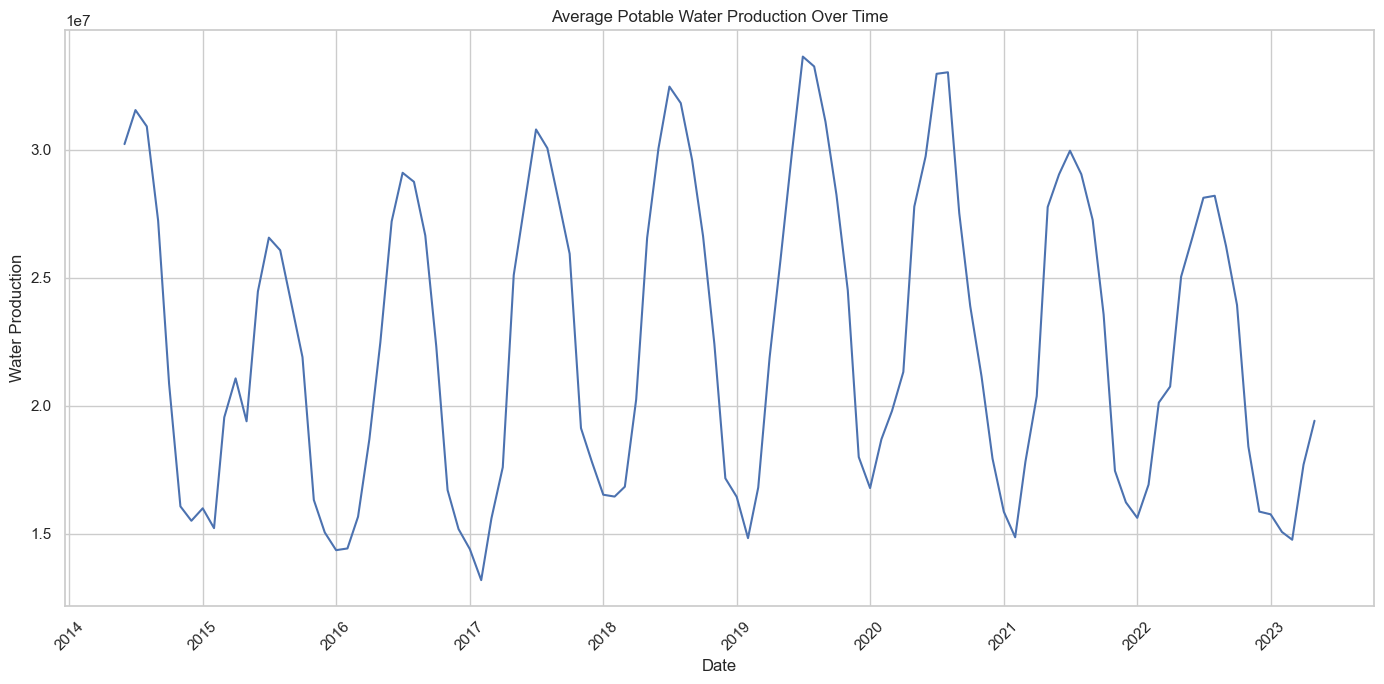

In [231]:
# Convert month_year to datetime if needed
ddf['month_year'] = dd.to_datetime(ddf['month_year'])

# Time series of water production - using Dask
time_series = ddf.groupby('month_year')['reported_final_total_potable_water_production'].mean().compute()
time_series = time_series.sort_index()

plt.figure(figsize=(14, 7))
plt.plot(time_series.index, time_series.values)
plt.title('Average Potable Water Production Over Time')
plt.xlabel('Date')
plt.ylabel('Water Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./images/water_production_time_series.svg', format='svg', dpi=300)
plt.show()
plt.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


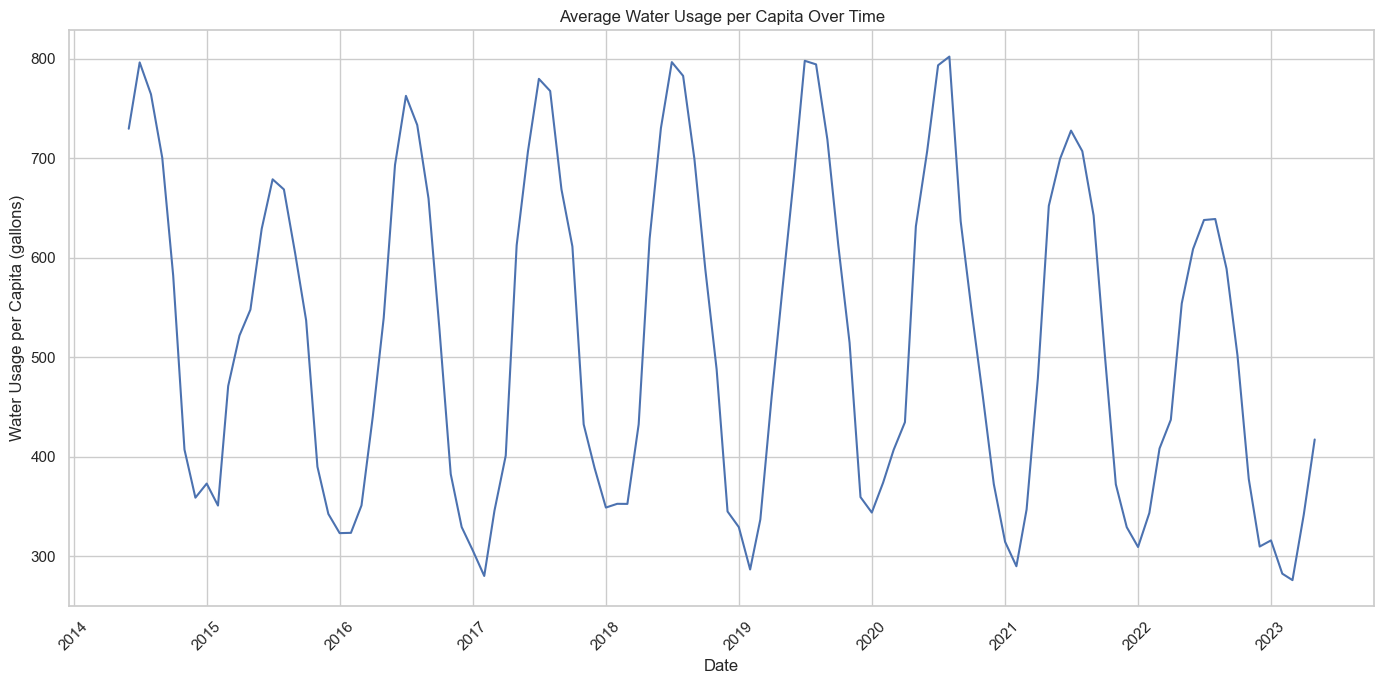

In [232]:
# Water usage per capita over time
capita_series = ddf.groupby('month_year')['water_usage_per_capita'].mean().compute()
capita_series = capita_series.sort_index()

plt.figure(figsize=(14, 7))
plt.plot(capita_series.index, capita_series.values)
plt.title('Average Water Usage per Capita Over Time')
plt.xlabel('Date')
plt.ylabel('Water Usage per Capita (gallons)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./images/water_usage_per_capita_time_series.svg', dpi=300)
plt.show()
plt.close()

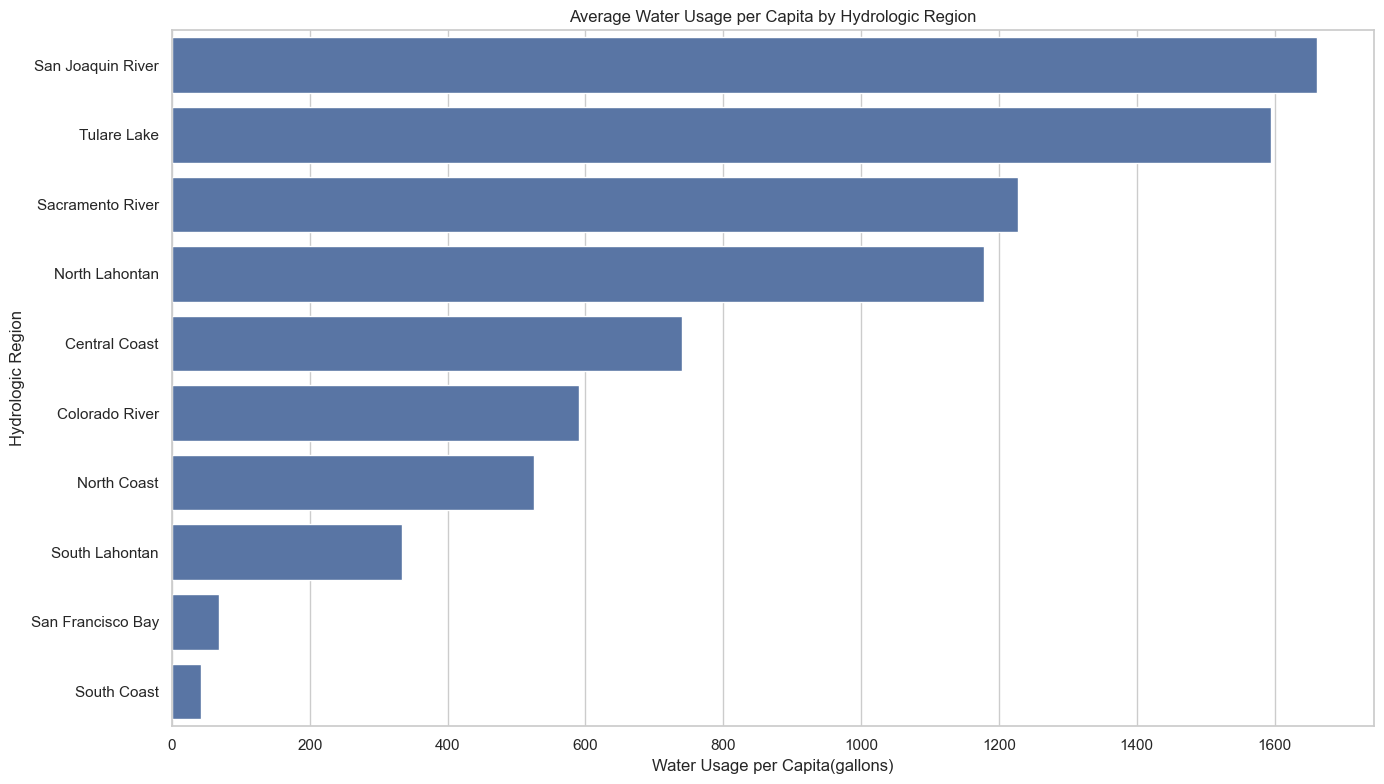

In [233]:
# Water usage by hydrologic region
region_usage = ddf.groupby('hydrologic_region')['water_usage_per_capita'].mean().compute()
region_usage = region_usage.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=region_usage.values, y=region_usage.index)
plt.title('Average Water Usage per Capita by Hydrologic Region')
plt.xlabel('Water Usage per Capita(gallons)')
plt.ylabel('Hydrologic Region')
plt.tight_layout()
plt.savefig('./images/region_water_usage.svg', dpi=300)
plt.show()
plt.close()

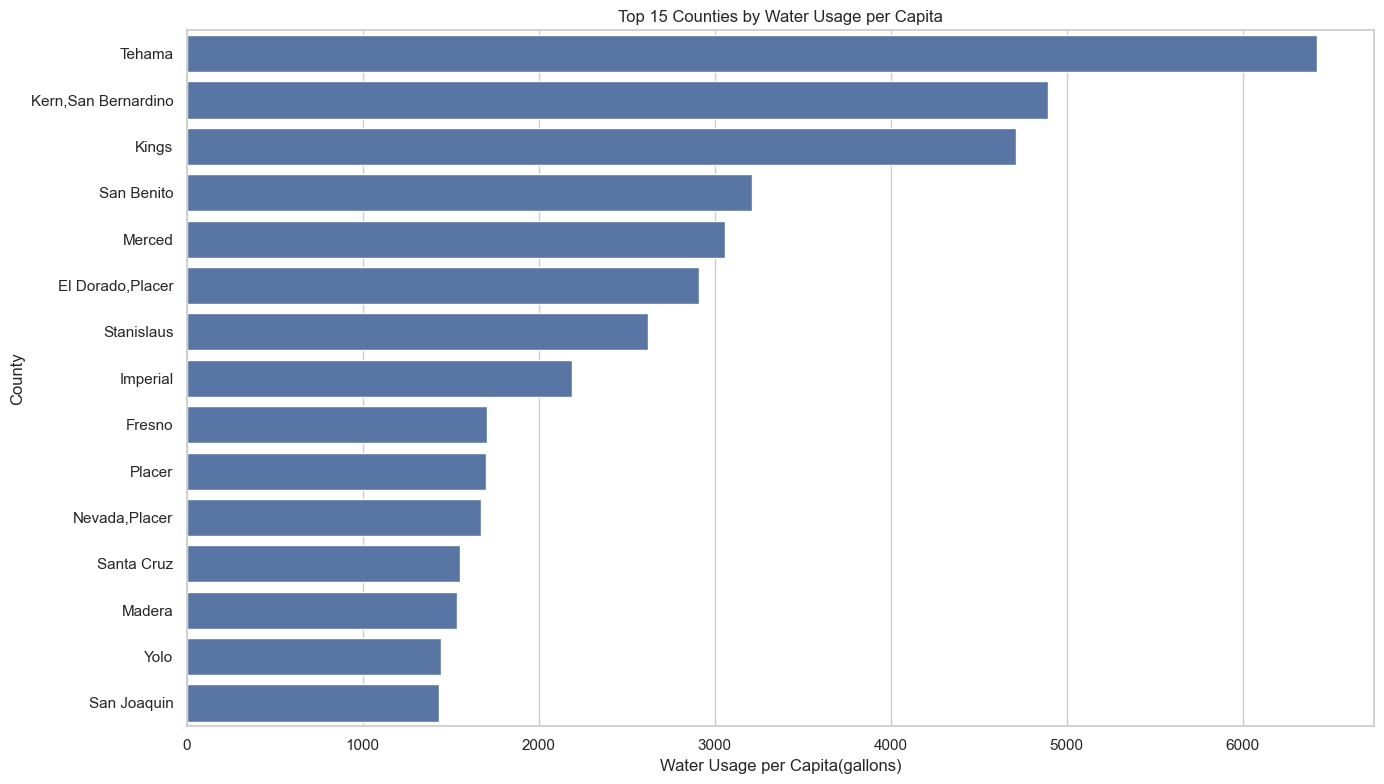

In [234]:
# Top counties by water usage
county_usage = ddf.groupby('county')['water_usage_per_capita'].mean().compute()
top_counties = county_usage.sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_counties.values, y=top_counties.index)
plt.title('Top 15 Counties by Water Usage per Capita')
plt.xlabel('Water Usage per Capita(gallons)')
plt.ylabel('County')
plt.tight_layout()
plt.savefig('./images/top_counties_water_usage.svg', dpi=300)
plt.show()
plt.close()

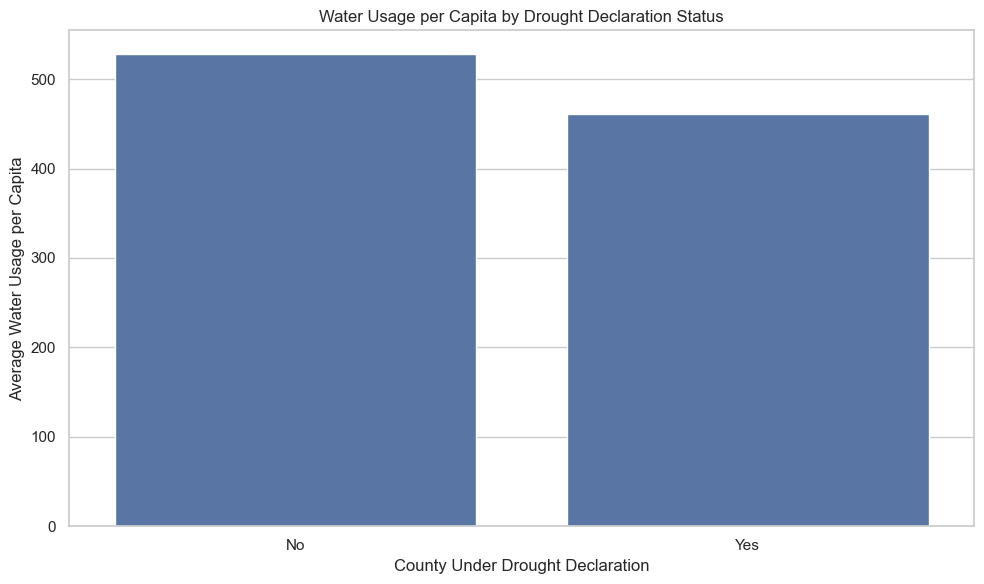

In [235]:
# Impact of drought on water usage
drought_impact = ddf.groupby('county_under_drought_declaration')['water_usage_per_capita'].mean().compute()

plt.figure(figsize=(10, 6))
sns.barplot(x=drought_impact.index, y=drought_impact.values)
plt.title('Water Usage per Capita by Drought Declaration Status')
plt.xlabel('County Under Drought Declaration')
plt.ylabel('Average Water Usage per Capita')
plt.tight_layout()
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('./images/drought_impact.svg', dpi=300)
plt.show()
plt.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


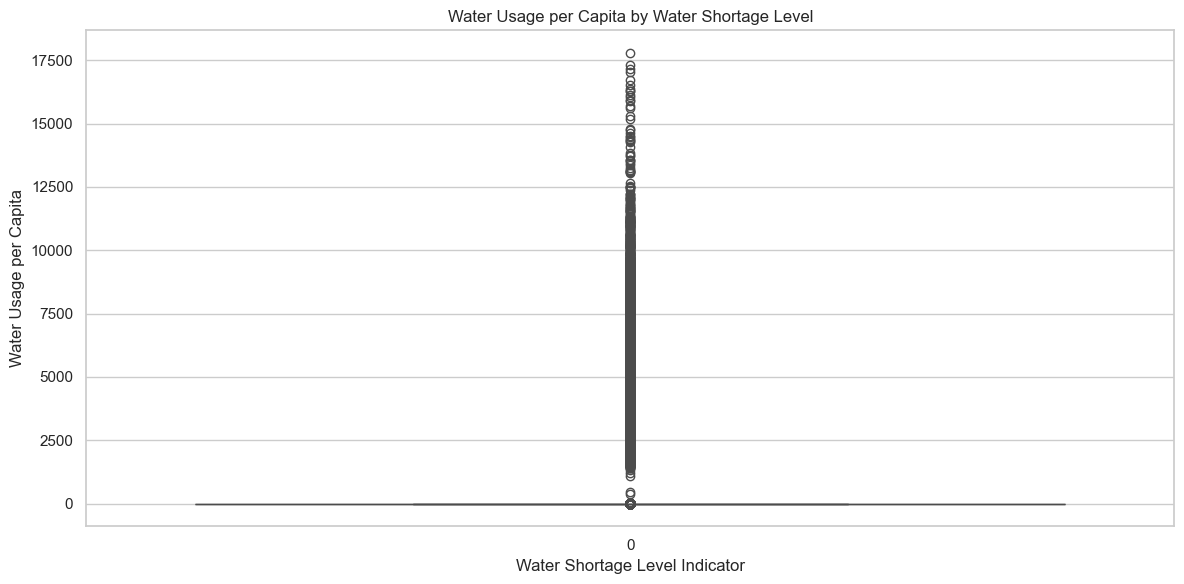

In [236]:
# Water shortage levels and water usage
shortage_levels = ddf[~ddf['water_shortage_level_indicator'].isnull()].compute()
shortage_levels['water_shortage_level_indicator'] = shortage_levels['water_shortage_level_indicator'].astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(x='water_shortage_level_indicator', y='water_usage_per_capita', data=shortage_levels)
plt.title('Water Usage per Capita by Water Shortage Level')
plt.xlabel('Water Shortage Level Indicator')
plt.ylabel('Water Usage per Capita')
plt.tight_layout()
plt.savefig('./images/shortage_levels_usage.svg', dpi=300)
plt.show()
plt.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


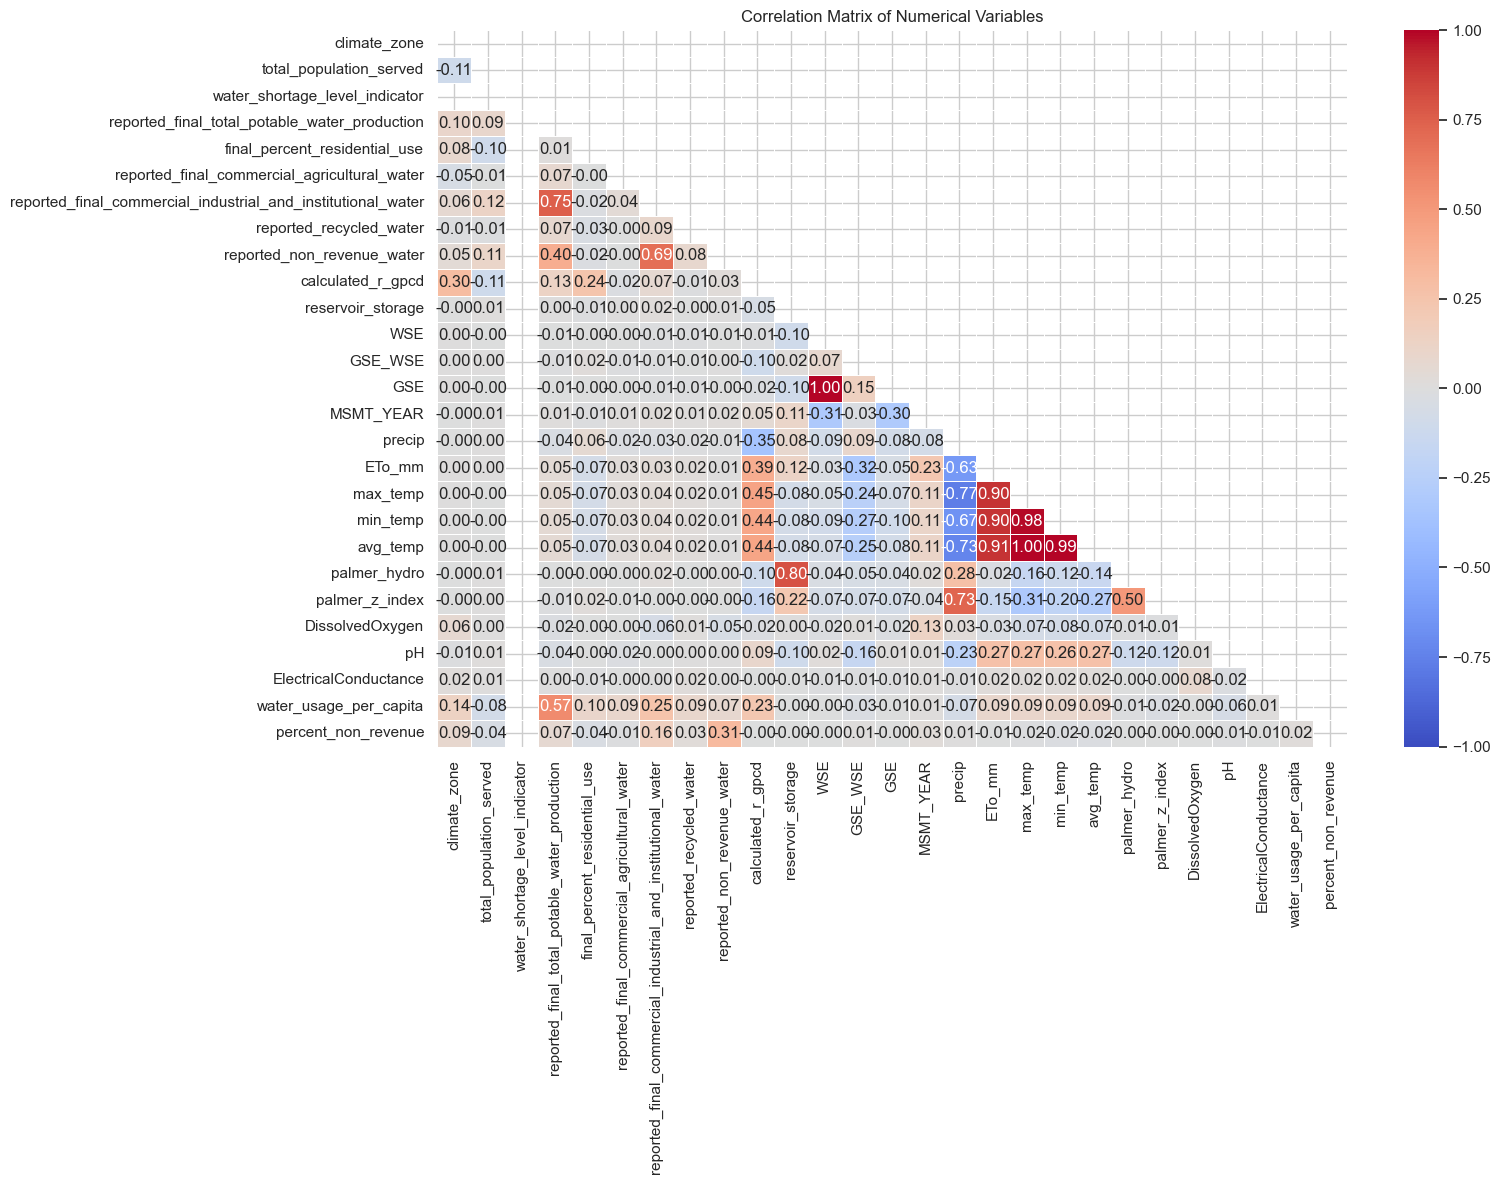

In [237]:
# For correlation analysis, we need to compute a sample
# This is because correlation matrices require the full dataset in memory
# You can increase the sample size as your memory allows
correlation_sample = ddf.sample(frac=1).compute()

plt.figure(figsize=(16, 12))
numerical_cols = correlation_sample.select_dtypes(include=['number']).columns
correlation = correlation_sample[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('./images/correlation_heatmap.svg', dpi=300)
plt.show()
plt.close()

In [238]:
# Function to process data in chunks
def analyze_by_region(df_chunk):
    result = df_chunk.groupby('hydrologic_region').agg({
        'water_usage_per_capita': 'mean',
        'reported_final_total_potable_water_production': 'sum',
        'total_population_served': 'sum',
        'percent_non_revenue': 'mean'
    })
    return result

# Apply the function in parallel using Dask
region_analysis = ddf.map_partitions(analyze_by_region).compute()
print("Regional Analysis Results:")
print(region_analysis)

Regional Analysis Results:
                   water_usage_per_capita  \
hydrologic_region                           
Central Coast                  739.732585   
Colorado River                 590.774517   
North Coast                    525.530940   
North Lahontan                1178.814406   
Sacramento River              1228.389875   
San Francisco Bay               68.506131   
San Joaquin River             1661.248987   
South Coast                     41.420302   
South Lahontan                 333.418661   
Tulare Lake                   1594.325818   

                   reported_final_total_potable_water_production  \
hydrologic_region                                                  
Central Coast                                       6.992967e+10   
Colorado River                                      3.063056e+10   
North Coast                                         5.859138e+10   
North Lahontan                                      1.459940e+10   
Sacramento River        

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


In [239]:
# Time series analysis with Dask
def time_series_analysis(df_chunk):
    df_chunk['month_year'] = pd.to_datetime(df_chunk['month_year'])
    result = df_chunk.groupby('month_year').agg({
        'water_usage_per_capita': 'mean',
        'reported_final_total_potable_water_production': 'sum',
        'percent_non_revenue': 'mean'
    })
    return result

# Apply in parallel
time_analysis = ddf.map_partitions(time_series_analysis).compute()
time_analysis = time_analysis.sort_index()
print("Time Series Analysis Results:")
print(time_analysis.head())

Time Series Analysis Results:
            water_usage_per_capita  \
month_year                           
2014-06-01              729.689886   
2014-07-01              796.362937   
2014-08-01              764.356395   
2014-09-01              700.497401   
2014-10-01              582.063772   

            reported_final_total_potable_water_production  percent_non_revenue  
month_year                                                                      
2014-06-01                                   1.154544e+10             0.789850  
2014-07-01                                   1.265316e+10             0.790252  
2014-08-01                                   1.245894e+10             0.755183  
2014-09-01                                   1.105631e+10             1.097615  
2014-10-01                                   8.426035e+09             0.795844  


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


### Temporal Trend Analysis


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


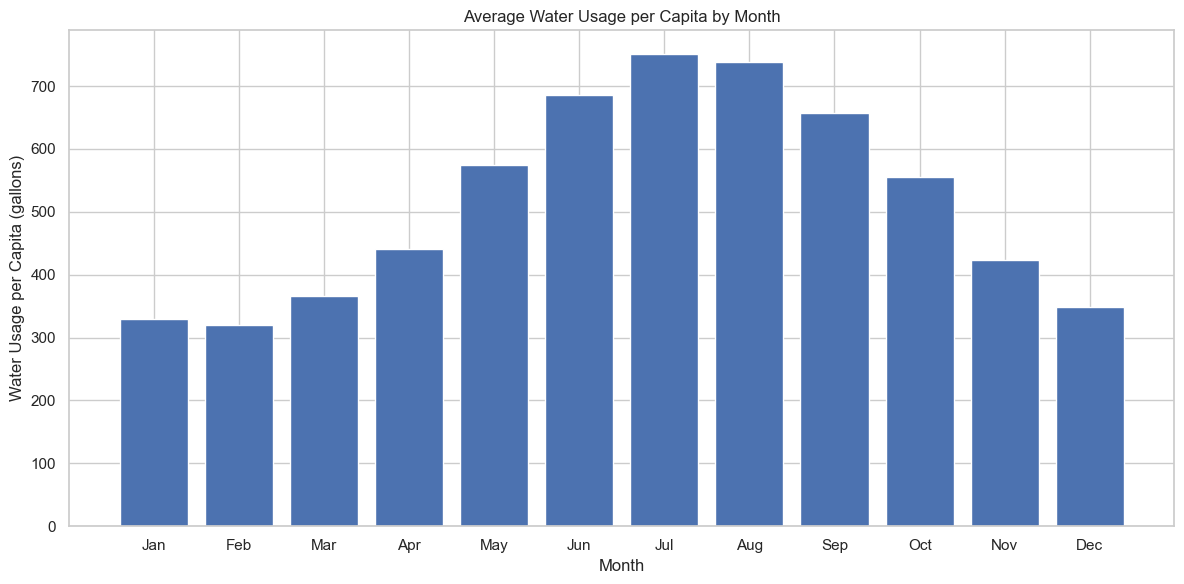

In [240]:
# Convert month_year to datetime if not already done
ddf['month_year'] = dd.to_datetime(ddf['month_year'])

# Extract year and month for additional analysis
ddf['year'] = ddf['month_year'].dt.year
ddf['month'] = ddf['month_year'].dt.month

# Analyze monthly patterns across years
monthly_usage = ddf.groupby('month')['water_usage_per_capita'].mean().compute()
plt.figure(figsize=(12, 6))
plt.bar(monthly_usage.index, monthly_usage.values)
plt.title('Average Water Usage per Capita by Month')
plt.xlabel('Month')
plt.ylabel('Water Usage per Capita (gallons)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.savefig('images/monthly_water_usage.svg', dpi=300)
plt.show()
plt.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


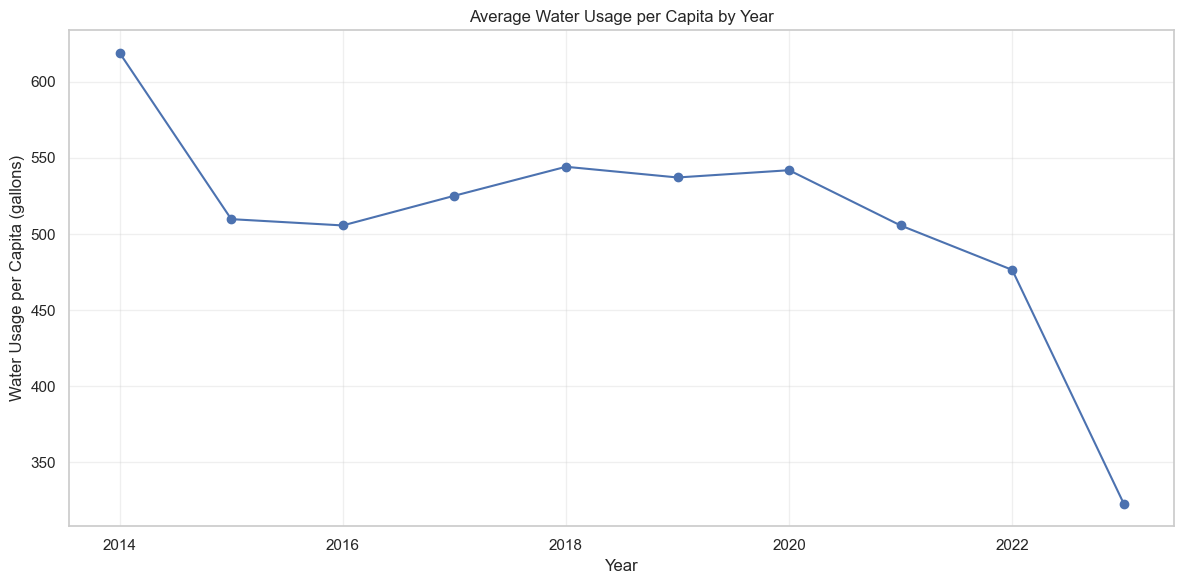

In [241]:
# Analyze yearly trends
yearly_usage = ddf.groupby('year')['water_usage_per_capita'].mean().compute()
plt.figure(figsize=(12, 6))
plt.plot(yearly_usage.index, yearly_usage.values, marker='o')
plt.title('Average Water Usage per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Water Usage per Capita (gallons)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/yearly_water_usage.svg', dpi=300)
plt.show()
plt.close()

### Drought Impact Deep Dive


<Figure size 1400x800 with 0 Axes>

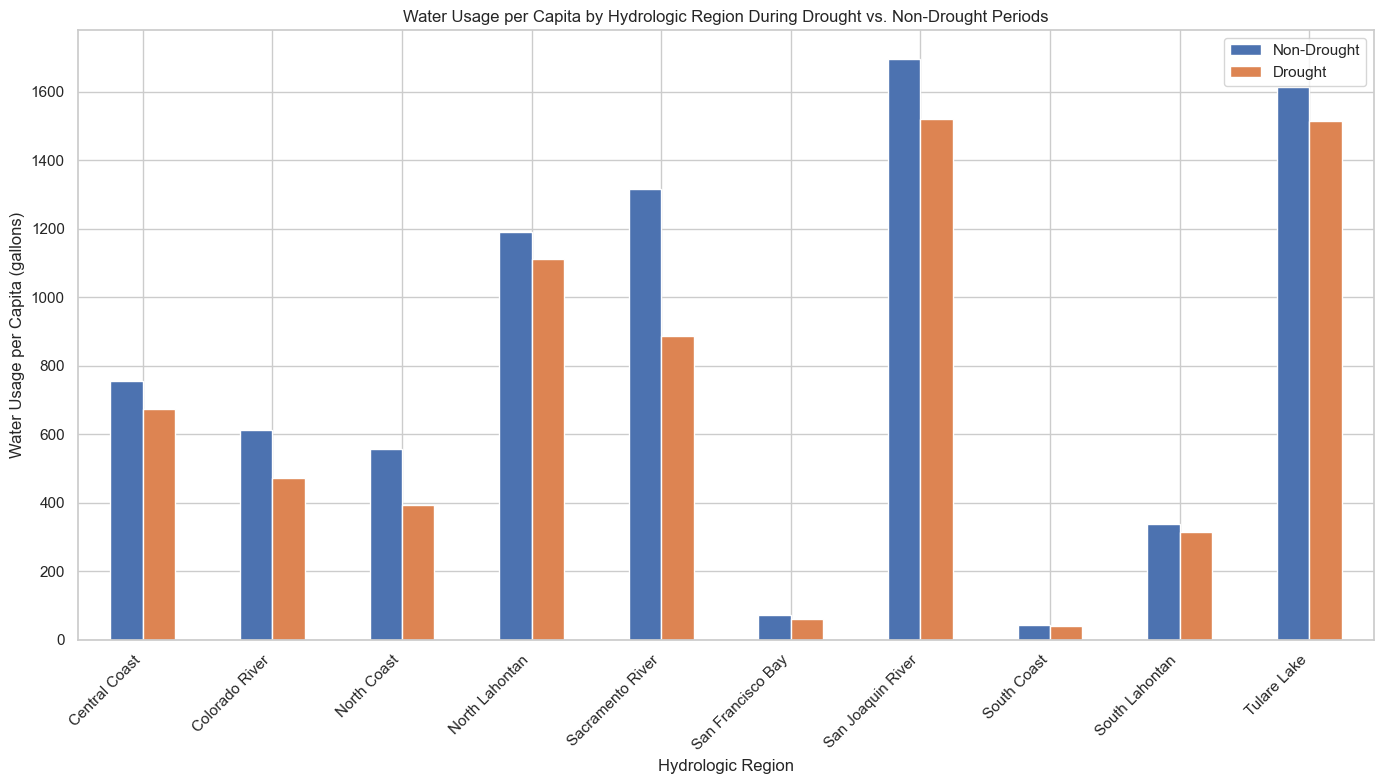

In [ ]:
# Compare water usage during drought vs non-drought periods by region
drought_region = ddf.groupby(['hydrologic_region', 'county_under_drought_declaration'])['water_usage_per_capita'].mean().compute().reset_index()
drought_region_pivot = drought_region.pivot(index='hydrologic_region', columns='county_under_drought_declaration', values='water_usage_per_capita')

plt.figure(figsize=(14, 8))
drought_region_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Water Usage per Capita by Hydrologic Region During Drought vs. Non-Drought Periods')
plt.xlabel('Hydrologic Region')
plt.ylabel('Water Usage per Capita (gallons)')
plt.legend(['Non-Drought', 'Drought'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/drought_region_comparison.svg', dpi=300)
plt.show()
plt.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


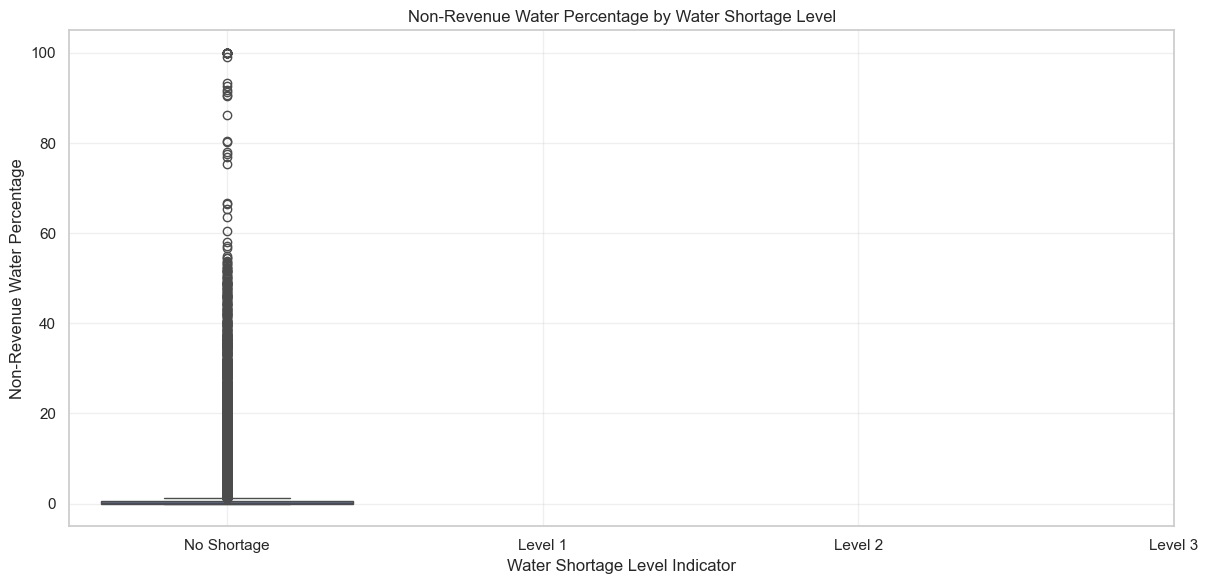

In [244]:
# Analyze water shortage levels impact on water conservation
shortage_conservation = ddf.dropna(subset=['water_shortage_level_indicator']).compute()
shortage_conservation['water_shortage_level_indicator'] = shortage_conservation['water_shortage_level_indicator'].astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(x='water_shortage_level_indicator', y='percent_non_revenue', data=shortage_conservation)
plt.title('Non-Revenue Water Percentage by Water Shortage Level')
plt.xlabel('Water Shortage Level Indicator')
plt.ylabel('Non-Revenue Water Percentage')
plt.tight_layout()
plt.xticks([0, 1, 2, 3], ['No Shortage', 'Level 1', 'Level 2', 'Level 3'])
plt.grid(True, alpha=0.3)
plt.savefig('images/shortage_non_revenue.svg', dpi=300)
plt.show()
plt.close()

### Population and Water Usage Analysis


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


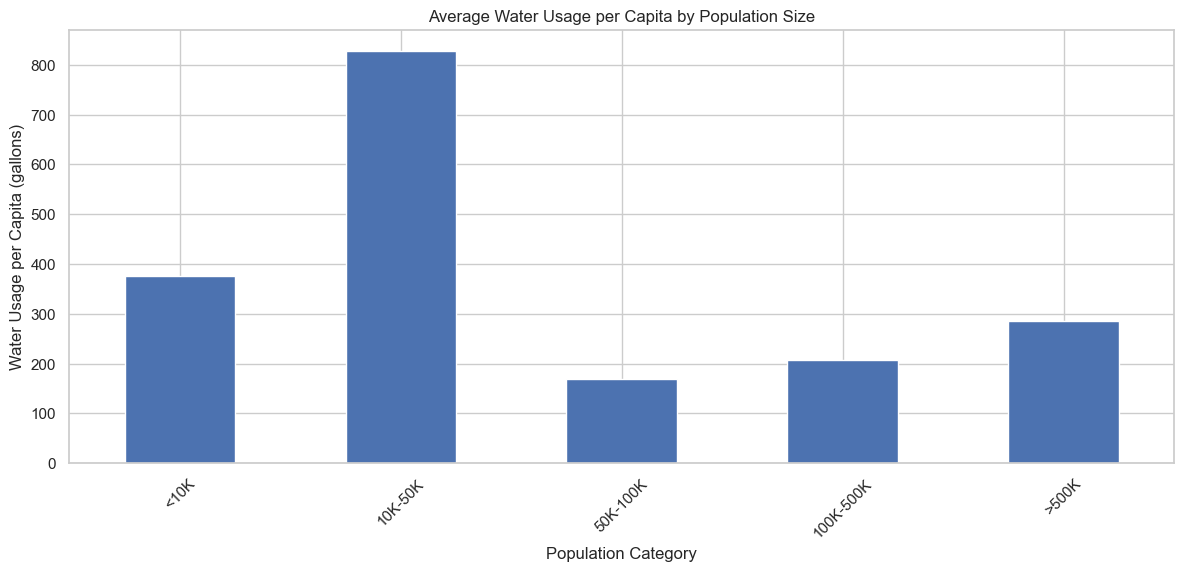

In [245]:
# Group suppliers by population size
population_sample = ddf.compute()
population_sample['population_category'] = pd.cut(
    population_sample['total_population_served'], 
    bins=[0, 10000, 50000, 100000, 500000, float('inf')],
    labels=['<10K', '10K-50K', '50K-100K', '100K-500K', '>500K']
)

# Analyze water usage by population category
pop_usage = population_sample.groupby('population_category')['water_usage_per_capita'].mean()
plt.figure(figsize=(12, 6))
pop_usage.plot(kind='bar')
plt.title('Average Water Usage per Capita by Population Size')
plt.xlabel('Population Category')
plt.ylabel('Water Usage per Capita (gallons)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('images/population_water_usage.svg', dpi=300)
plt.show()
plt.close()

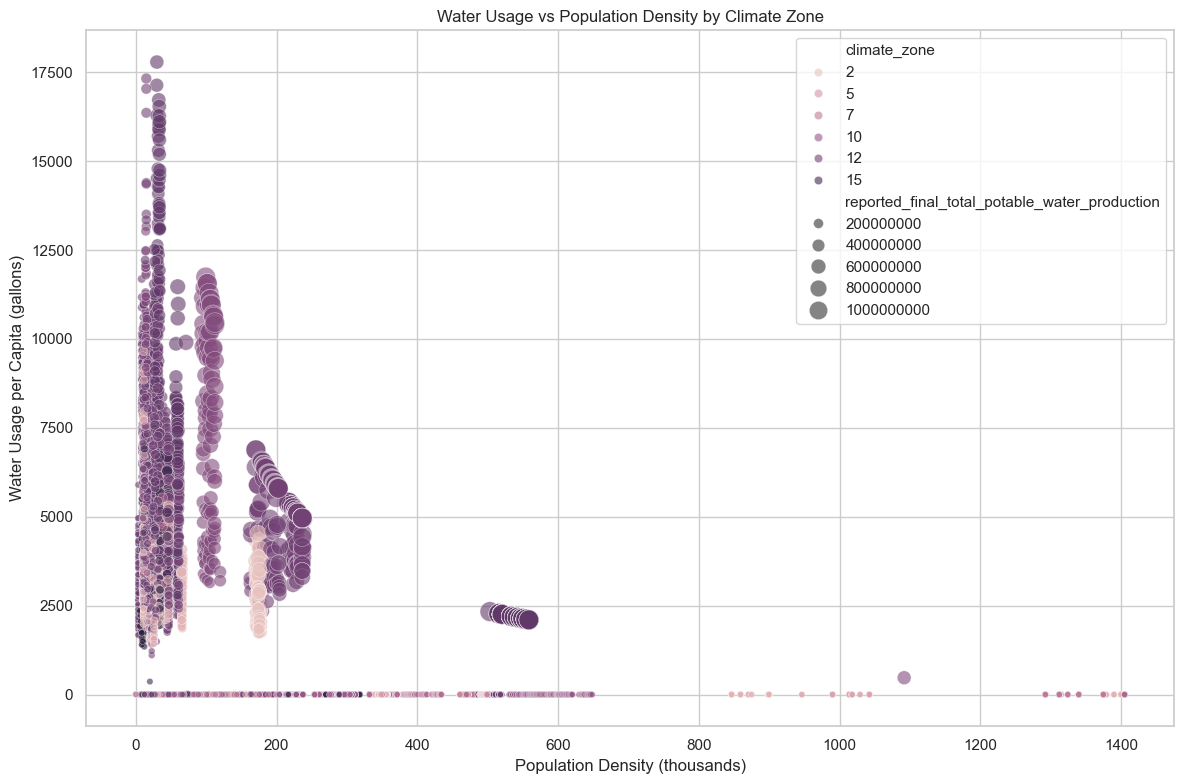

In [246]:
# Scatter plot with population density
population_sample['population_density'] = population_sample['total_population_served'] / 1000  # Simplified proxy for density
plt.figure(figsize=(12, 8))
sns.scatterplot(x='population_density', y='water_usage_per_capita', 
                hue='climate_zone', size='reported_final_total_potable_water_production',
                sizes=(20, 200), alpha=0.6, data=population_sample)
plt.title('Water Usage vs Population Density by Climate Zone')
plt.xlabel('Population Density (thousands)')
plt.ylabel('Water Usage per Capita (gallons)')
plt.tight_layout()
plt.savefig('images/population_density_usage.svg', dpi=300)
plt.show()
plt.close()

### Water Composition Analysis


<Figure size 1400x1000 with 0 Axes>

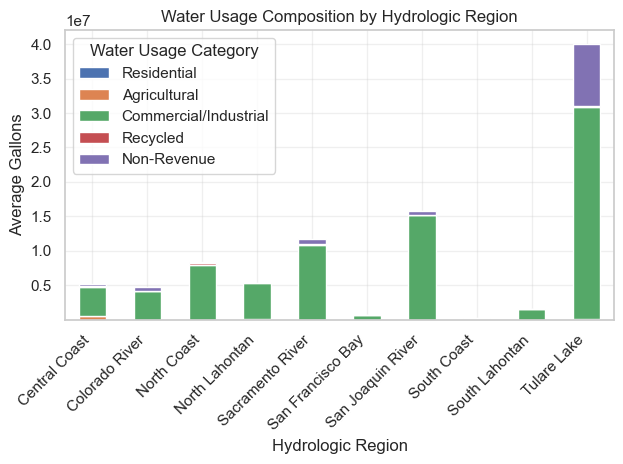

In [247]:
# Calculate average percentages for different water usage categories by region
water_composition_by_region = ddf.groupby('hydrologic_region')[
    ['final_percent_residential_use', 
     'reported_final_commercial_agricultural_water',
     'reported_final_commercial_industrial_and_institutional_water',
     'reported_recycled_water',
     'reported_non_revenue_water']
].mean().compute()

# Create a stacked bar chart
plt.figure(figsize=(14, 10))
water_composition_by_region.plot(kind='bar', stacked=True)
plt.title('Water Usage Composition by Hydrologic Region')
plt.xlabel('Hydrologic Region')
plt.ylabel('Average Gallons')
plt.legend(title='Water Usage Category', 
           labels=['Residential', 'Agricultural', 'Commercial/Industrial', 'Recycled', 'Non-Revenue'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.savefig('images/water_composition_by_region.svg', dpi=300)
plt.show()
plt.close()

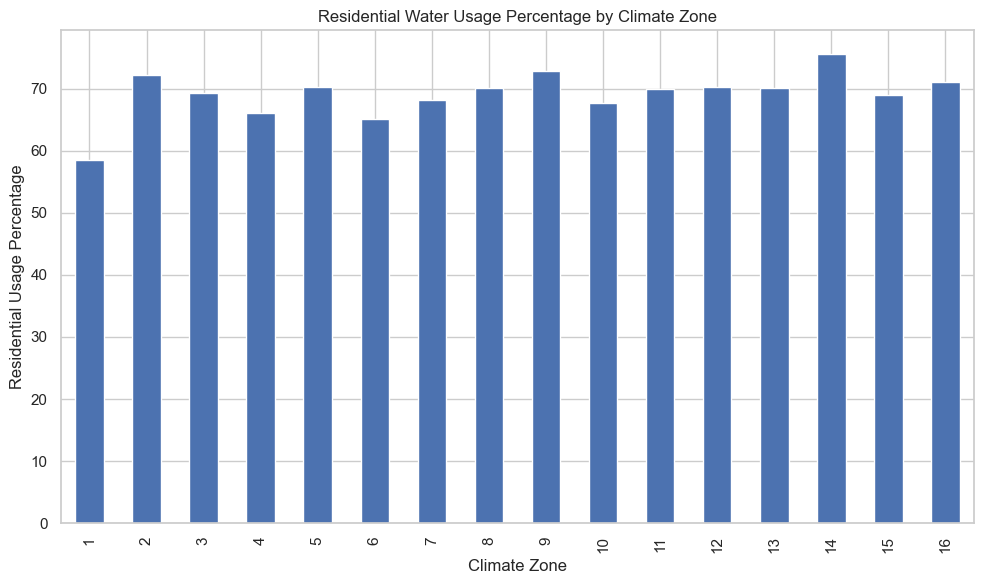

In [248]:
# Analyze residential water usage by climate zone(indicates the minimum winter temperature for a region)
residential_by_climate = ddf.groupby('climate_zone')['final_percent_residential_use'].mean().compute()
plt.figure(figsize=(10, 6))
residential_by_climate.plot(kind='bar')
plt.title('Residential Water Usage Percentage by Climate Zone')
plt.xlabel('Climate Zone')
plt.ylabel('Residential Usage Percentage')
plt.tight_layout()
plt.savefig('images/residential_by_climate.svg', dpi=300)
plt.show()
plt.close()

### Reservoir and Groundwater Analysis

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


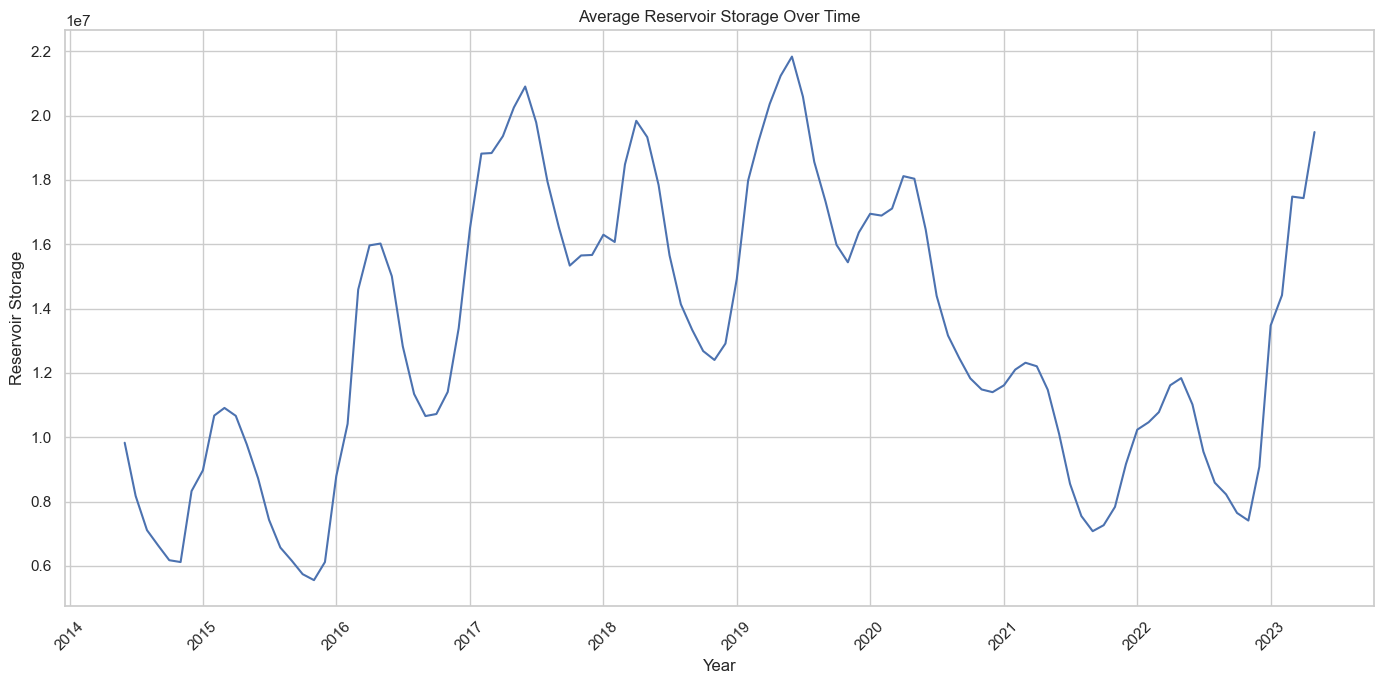

In [249]:
# Analyze reservoir storage trends over time
reservoir_time = ddf.groupby('month_year')['reservoir_storage'].mean().compute()
reservoir_time = reservoir_time.sort_index()

plt.figure(figsize=(14, 7))
plt.plot(reservoir_time.index, reservoir_time.values)
plt.title('Average Reservoir Storage Over Time')
plt.xlabel('Year')
plt.ylabel('Reservoir Storage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/reservoir_time_series.svg', dpi=300)
plt.show()
plt.close()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


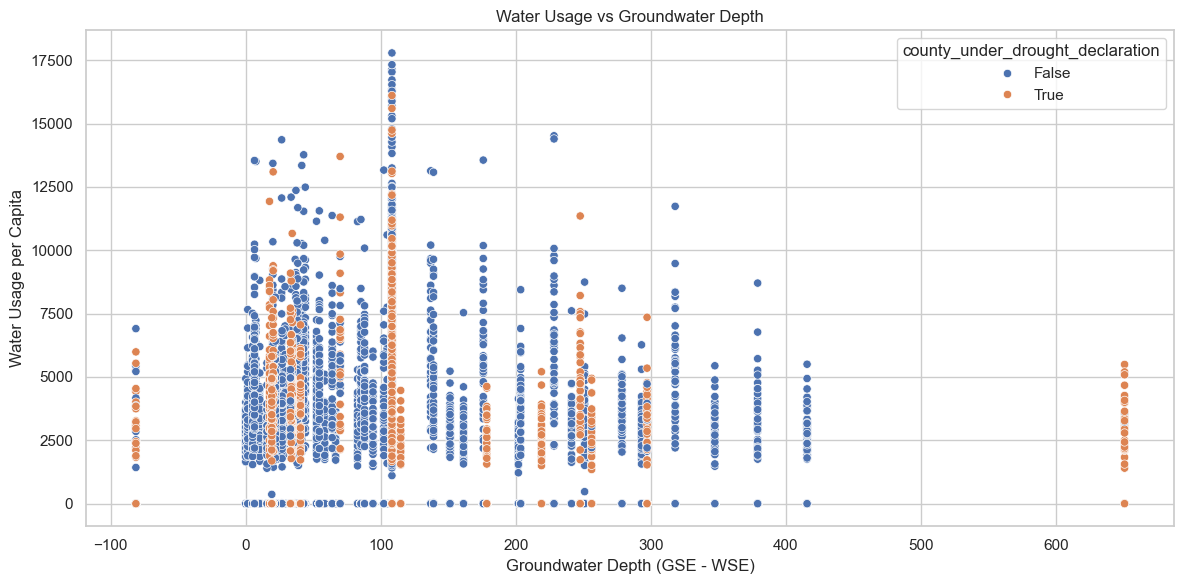

In [250]:
# Analyze groundwater levels
groundwater = ddf.dropna(subset=['GSE', 'WSE']).compute()
groundwater['groundwater_depth'] = groundwater['GSE'] - groundwater['WSE']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='groundwater_depth', y='water_usage_per_capita', 
                hue='county_under_drought_declaration', data=groundwater)
plt.title('Water Usage vs Groundwater Depth')
plt.xlabel('Groundwater Depth (GSE - WSE)')
plt.ylabel('Water Usage per Capita')
plt.tight_layout()
plt.savefig('images/groundwater_usage.svg', dpi=300)
plt.show()
plt.close()

### Climate Impact Analysis

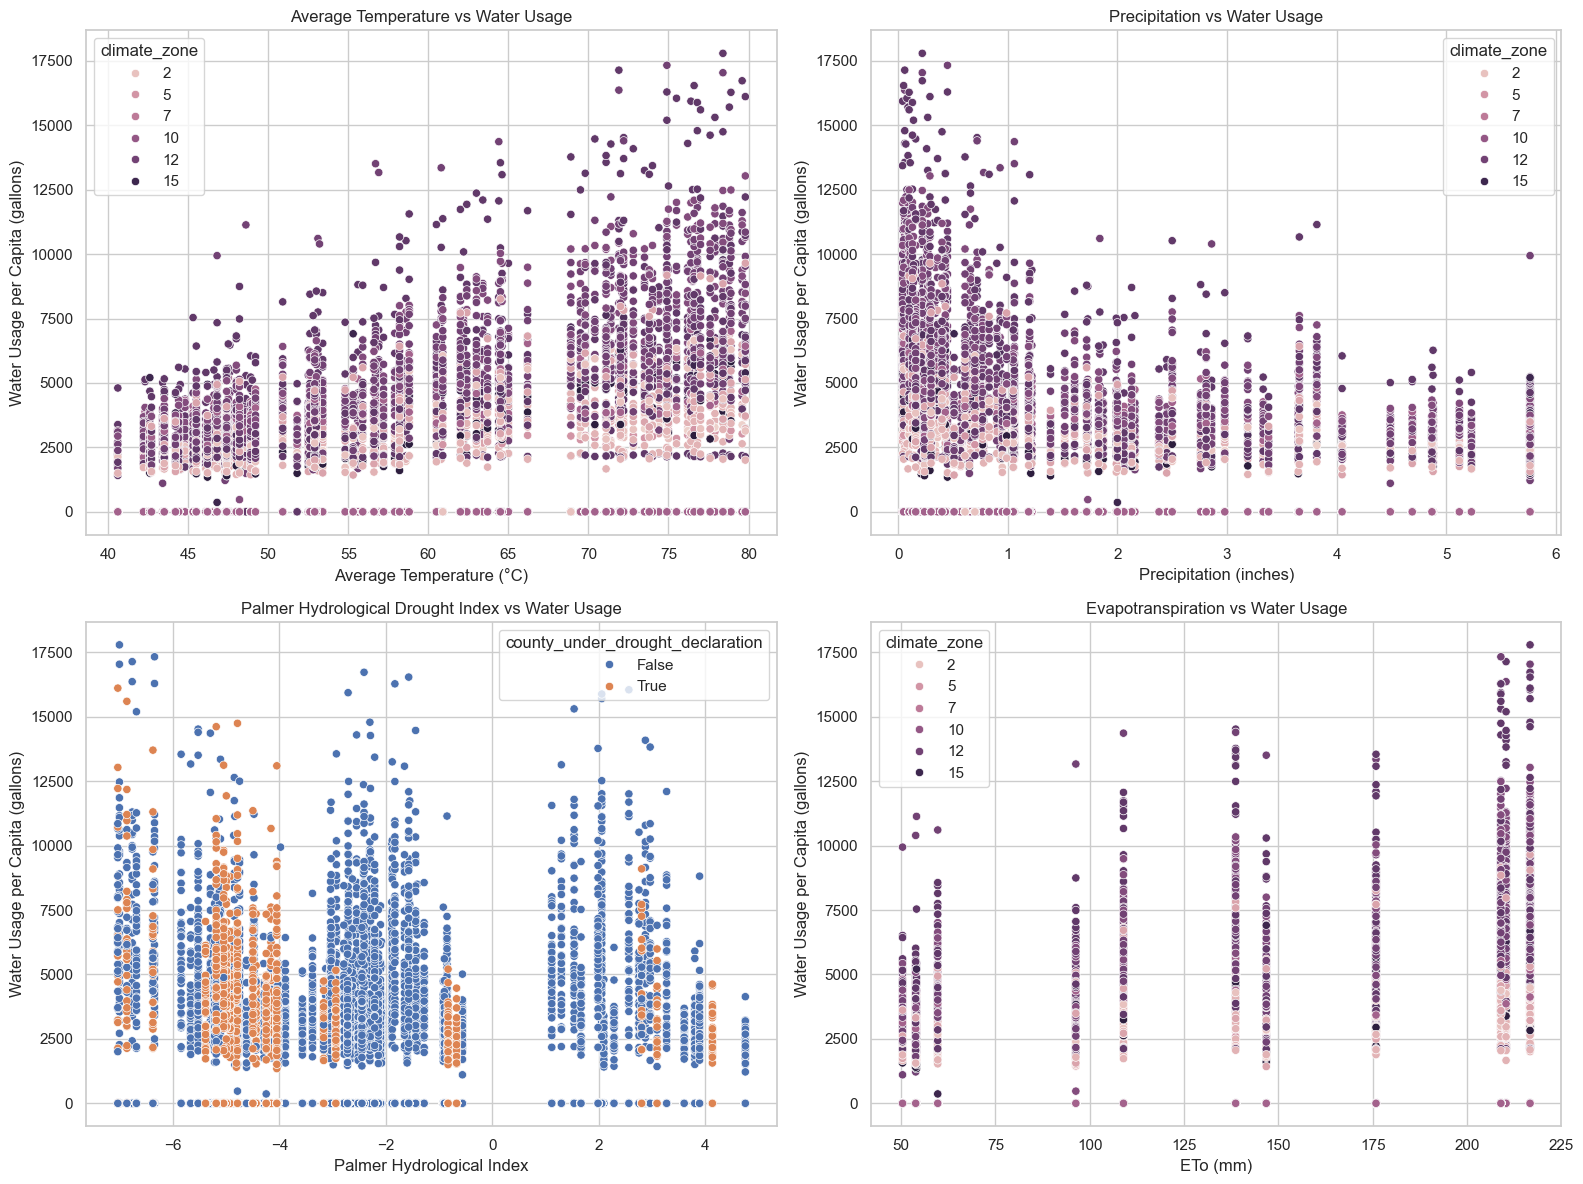

In [251]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Temperature vs Water Usage
sns.scatterplot(x='avg_temp', y='water_usage_per_capita', 
                hue='climate_zone', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Average Temperature vs Water Usage')
axes[0, 0].set_xlabel('Average Temperature (°C)')
axes[0, 0].set_ylabel('Water Usage per Capita (gallons)')

# Precipitation vs Water Usage
sns.scatterplot(x='precip', y='water_usage_per_capita', 
                hue='climate_zone', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Precipitation vs Water Usage')
axes[0, 1].set_xlabel('Precipitation (inches)')
axes[0, 1].set_ylabel('Water Usage per Capita (gallons)')

# Palmer Hydro Index vs Water Usage
sns.scatterplot(x='palmer_hydro', y='water_usage_per_capita', 
                hue='county_under_drought_declaration', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Palmer Hydrological Drought Index vs Water Usage')
axes[1, 0].set_xlabel('Palmer Hydrological Index')
axes[1, 0].set_ylabel('Water Usage per Capita (gallons)')

# ETo (Evapotranspiration) vs Water Usage
sns.scatterplot(x='ETo_mm', y='water_usage_per_capita', 
                hue='climate_zone', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Evapotranspiration vs Water Usage')
axes[1, 1].set_xlabel('ETo (mm)')
axes[1, 1].set_ylabel('Water Usage per Capita (gallons)')

plt.tight_layout()
plt.savefig('images/climate_water_usage_relationships.svg', dpi=300)
plt.show()
plt.close()

### Water Quality Analysis

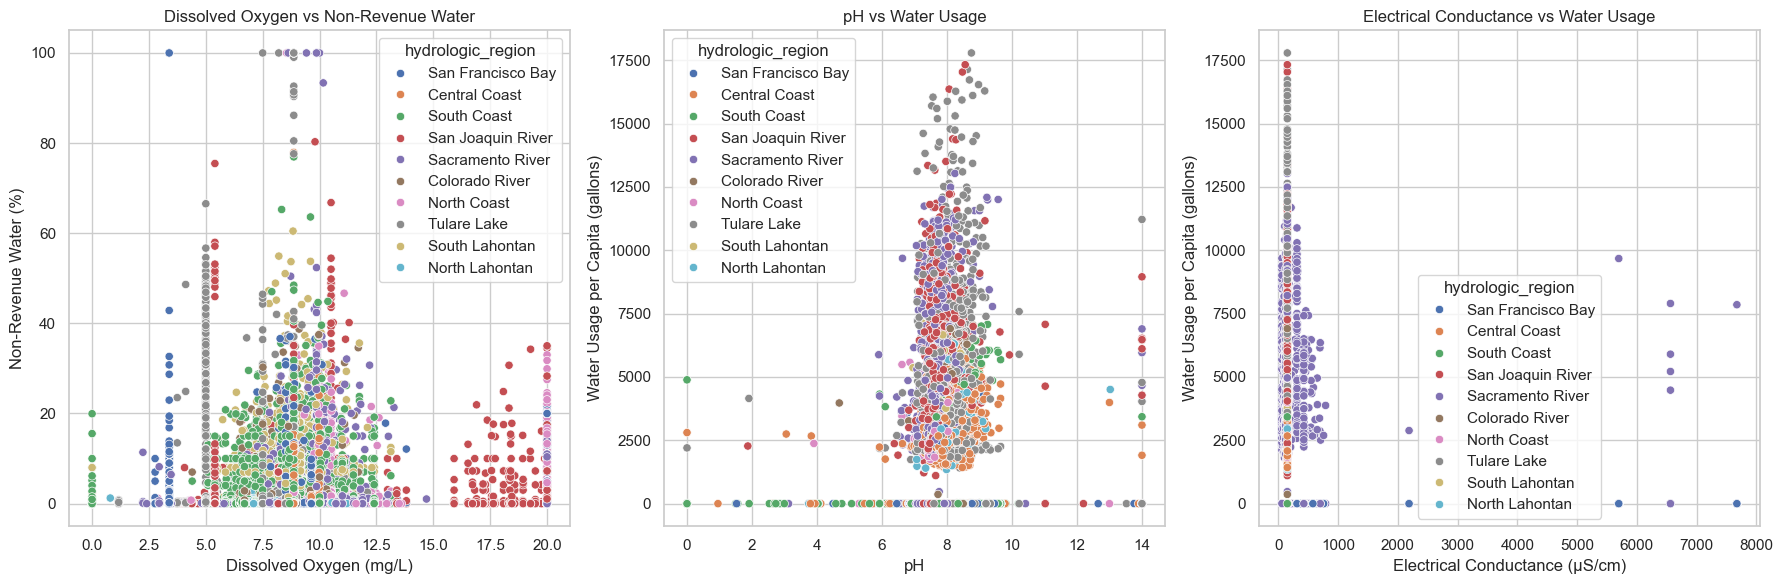

In [252]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Dissolved Oxygen vs Non-Revenue Water
sns.scatterplot(x='DissolvedOxygen', y='percent_non_revenue', 
                hue='hydrologic_region', data=df, ax=axes[0])
axes[0].set_title('Dissolved Oxygen vs Non-Revenue Water')
axes[0].set_xlabel('Dissolved Oxygen (mg/L)')
axes[0].set_ylabel('Non-Revenue Water (%)')

# pH vs Water Usage
sns.scatterplot(x='pH', y='water_usage_per_capita', 
                hue='hydrologic_region', data=df, ax=axes[1])
axes[1].set_title('pH vs Water Usage')
axes[1].set_xlabel('pH')
axes[1].set_ylabel('Water Usage per Capita (gallons)')

# Electrical Conductance vs Water Usage
sns.scatterplot(x='ElectricalConductance', y='water_usage_per_capita', 
                hue='hydrologic_region', data=df, ax=axes[2])
axes[2].set_title('Electrical Conductance vs Water Usage')
axes[2].set_xlabel('Electrical Conductance (μS/cm)')
axes[2].set_ylabel('Water Usage per Capita (gallons)')

plt.tight_layout()
plt.savefig('images/water_quality_analysis.svg', dpi=300)
plt.show()
plt.close()

### Seasonal Climate Patterns

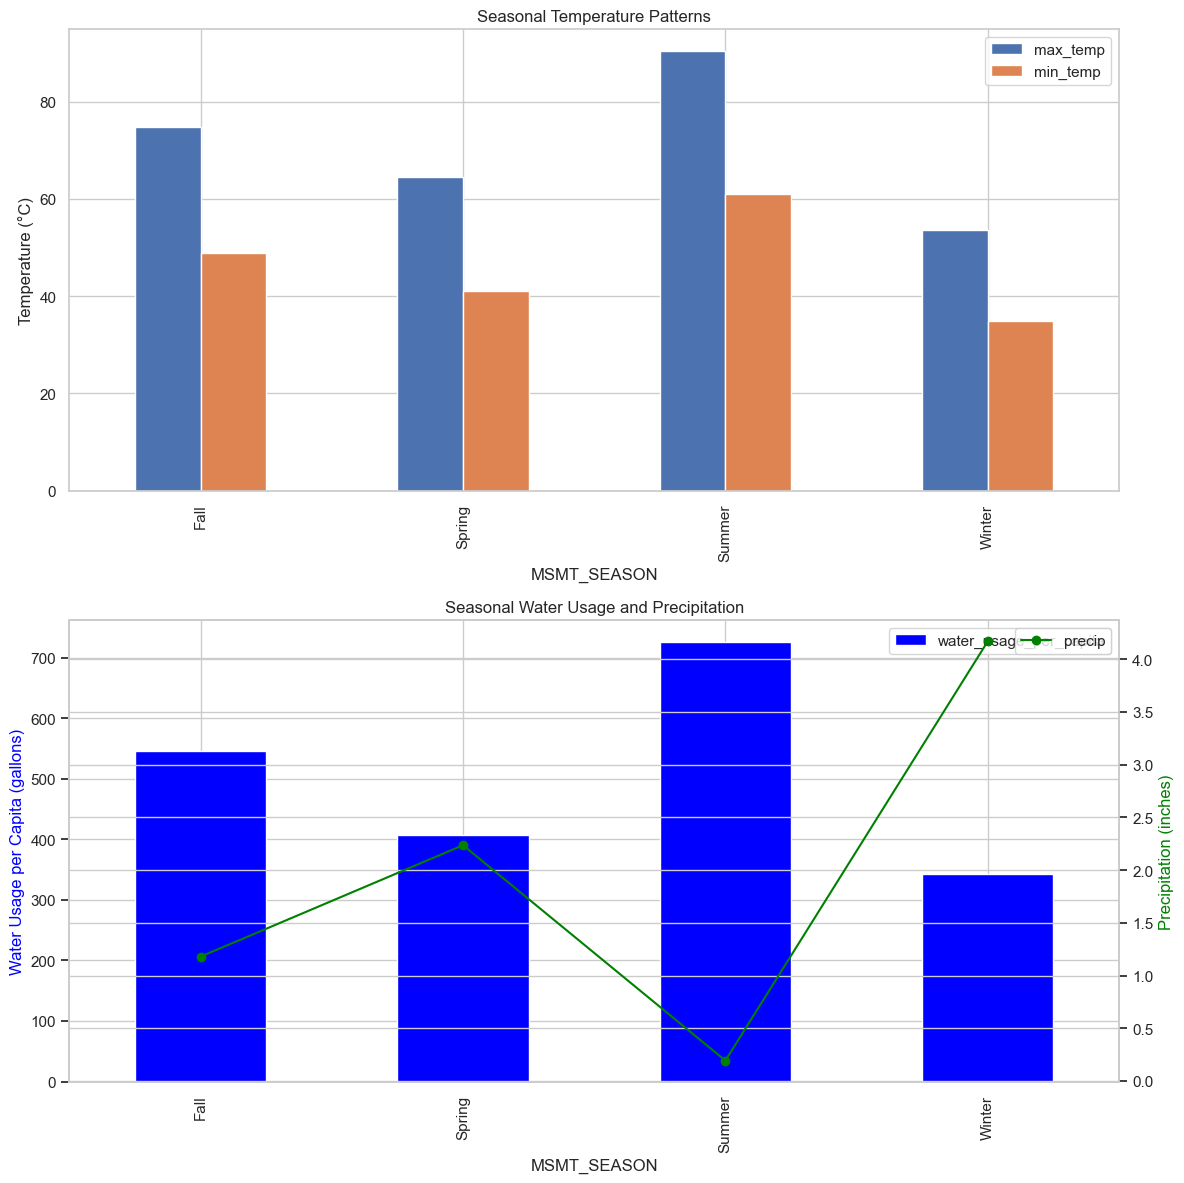

In [253]:
# Convert month_year to datetime for proper sorting
df['month_year'] = pd.to_datetime(df['month_year'])

# Group by season and calculate averages
seasonal_climate = df.groupby('MSMT_SEASON')[
    ['precip', 'ETo_mm', 'max_temp', 'min_temp', 'water_usage_per_capita']
].mean().reset_index()

# Plot seasonal patterns
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Temperature by season
seasonal_climate.plot(x='MSMT_SEASON', y=['max_temp', 'min_temp'], 
                     kind='bar', ax=axes[0])
axes[0].set_title('Seasonal Temperature Patterns')
axes[0].set_ylabel('Temperature (°C)')

# Water usage and precipitation by season
ax1 = axes[1]
ax2 = ax1.twinx()
seasonal_climate.plot(x='MSMT_SEASON', y='water_usage_per_capita', 
                     kind='bar', color='blue', ax=ax1)
seasonal_climate.plot(x='MSMT_SEASON', y='precip', kind='line', 
                     marker='o', color='green', ax=ax2)
ax1.set_title('Seasonal Water Usage and Precipitation')
ax1.set_ylabel('Water Usage per Capita (gallons)', color='blue')
ax2.set_ylabel('Precipitation (inches)', color='green')

plt.tight_layout()
plt.savefig('images/seasonal_climate_patterns.svg', dpi=300)
plt.show()
plt.close()


### Drought Index Analysis

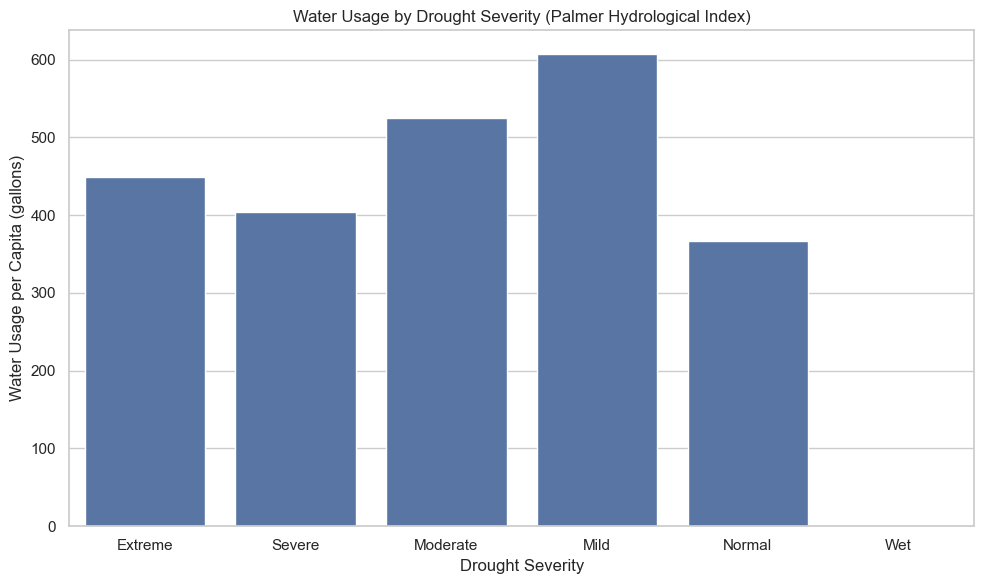

In [254]:
# Create bins for Palmer Hydrological Index
df['drought_severity'] = pd.cut(
    df['palmer_hydro'], 
    bins=[-5, -4, -3, -2, -1, 0, 1],
    labels=['Extreme', 'Severe', 'Moderate', 'Mild', 'Normal', 'Wet']
)

# Analyze water usage by drought severity
drought_usage = df.groupby('drought_severity')['water_usage_per_capita'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='drought_severity', y='water_usage_per_capita', data=drought_usage)
plt.title('Water Usage by Drought Severity (Palmer Hydrological Index)')
plt.xlabel('Drought Severity')
plt.ylabel('Water Usage per Capita (gallons)')
plt.tight_layout()
plt.savefig('images/drought_severity_usage.svg', dpi=300)
plt.show()
plt.close()

### Mulivariate Analysis

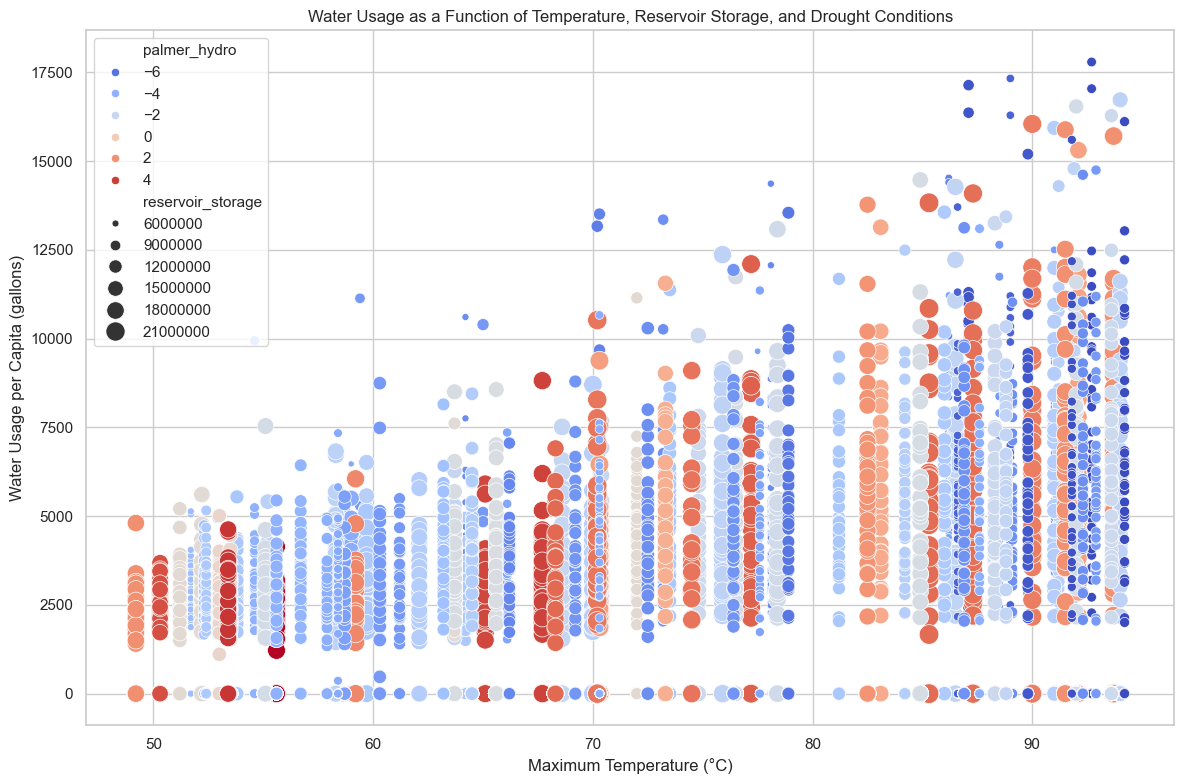

In [260]:
# Create a pairplot for key variables
key_vars = ['water_usage_per_capita', 'precip', 'max_temp', 
            'palmer_hydro', 'reservoir_storage']
sns.pairplot(df[key_vars + ['climate_zone']], hue='climate_zone')
plt.suptitle('Relationships Between Key Water and Climate Variables', y=1.02)
plt.savefig('images/climate_water_pairplot.png')
plt.close()

# Create a more advanced visualization showing multiple relationships
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='max_temp', 
    y='water_usage_per_capita',
    size='reservoir_storage',  # Size points by reservoir storage
    hue='palmer_hydro',        # Color points by drought index
    palette='coolwarm',        # Blue-red palette for drought index
    sizes=(20, 200),           # Range of point sizes
    data=df
)
plt.title('Water Usage as a Function of Temperature, Reservoir Storage, and Drought Conditions')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Water Usage per Capita (gallons)')
plt.tight_layout()
plt.savefig('images/multivariate_climate_analysis.svg', dpi=300)
plt.show()
plt.close()

### Regional Climate Differences

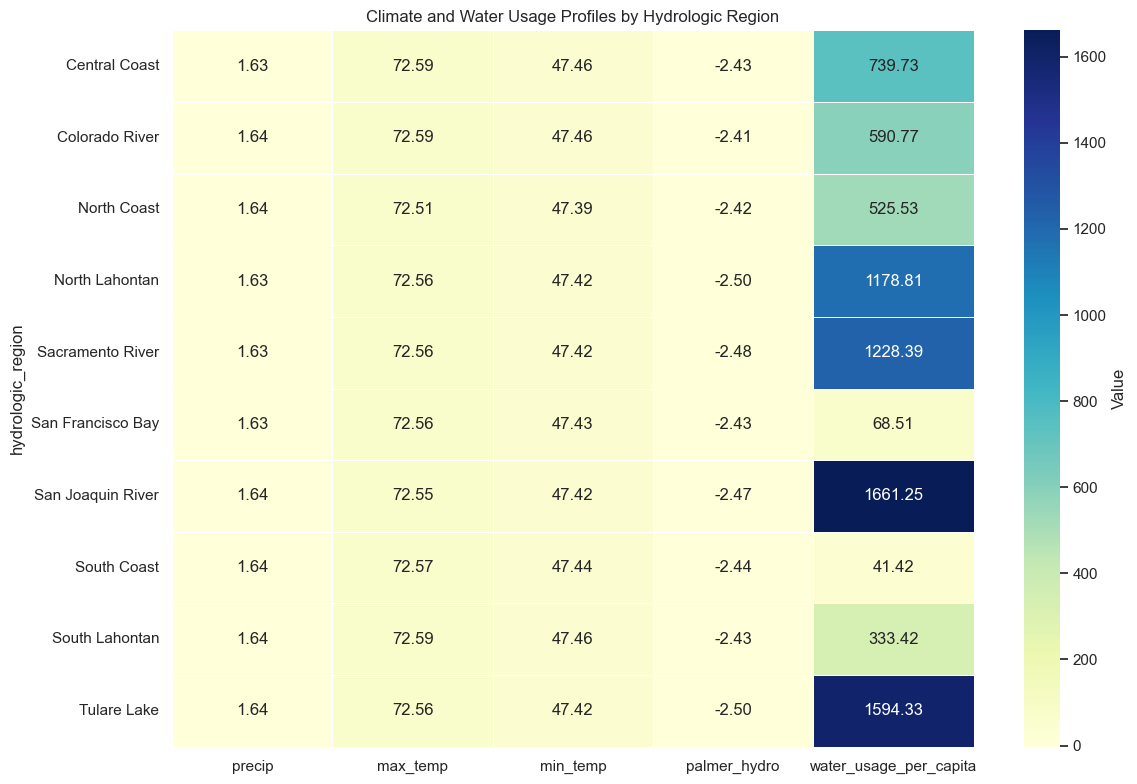

In [261]:
# Regional climate profiles
regional_climate = df.groupby('hydrologic_region')[
    ['precip', 'max_temp', 'min_temp', 'palmer_hydro', 'water_usage_per_capita']
].mean().reset_index()

# Create a heatmap of regional climate characteristics
plt.figure(figsize=(12, 8))
regional_pivot = regional_climate.set_index('hydrologic_region')
sns.heatmap(
    regional_pivot, 
    cmap='YlGnBu', 
    annot=True, 
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Value'}
)
plt.title('Climate and Water Usage Profiles by Hydrologic Region')
plt.tight_layout()
plt.savefig('images/regional_climate_profiles.svg', dpi=300)
plt.show()
plt.close()

### Water Quality Impact

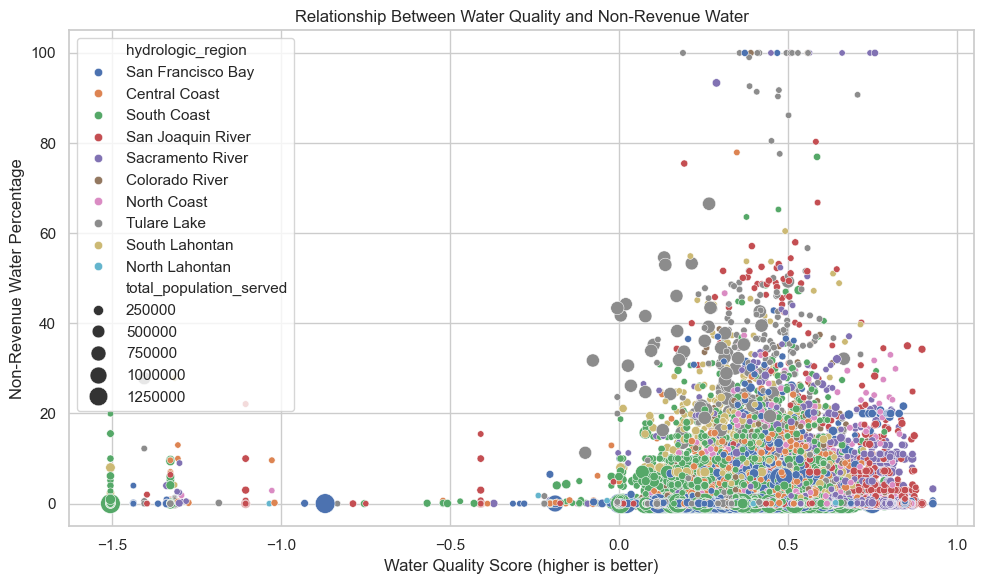

In [262]:
# Create a composite water quality score
df['water_quality_score'] = (
    (df['DissolvedOxygen'] / df['DissolvedOxygen'].max()) * 0.4 +
    (1 - abs(df['pH'] - 7) / 1) * 0.3 +  # Optimal pH is around 7
    (1 - df['ElectricalConductance'] / df['ElectricalConductance'].max()) * 0.3
)

# Analyze relationship between water quality and conservation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='water_quality_score', 
    y='percent_non_revenue',
    hue='hydrologic_region',
    size='total_population_served',
    sizes=(20, 200),
    data=df
)
plt.title('Relationship Between Water Quality and Non-Revenue Water')
plt.xlabel('Water Quality Score (higher is better)')
plt.ylabel('Non-Revenue Water Percentage')
plt.tight_layout()
plt.savefig('images/water_quality_conservation.svg', dpi=300)
plt.show()
plt.close()

### Supplier Efficiency Analysis

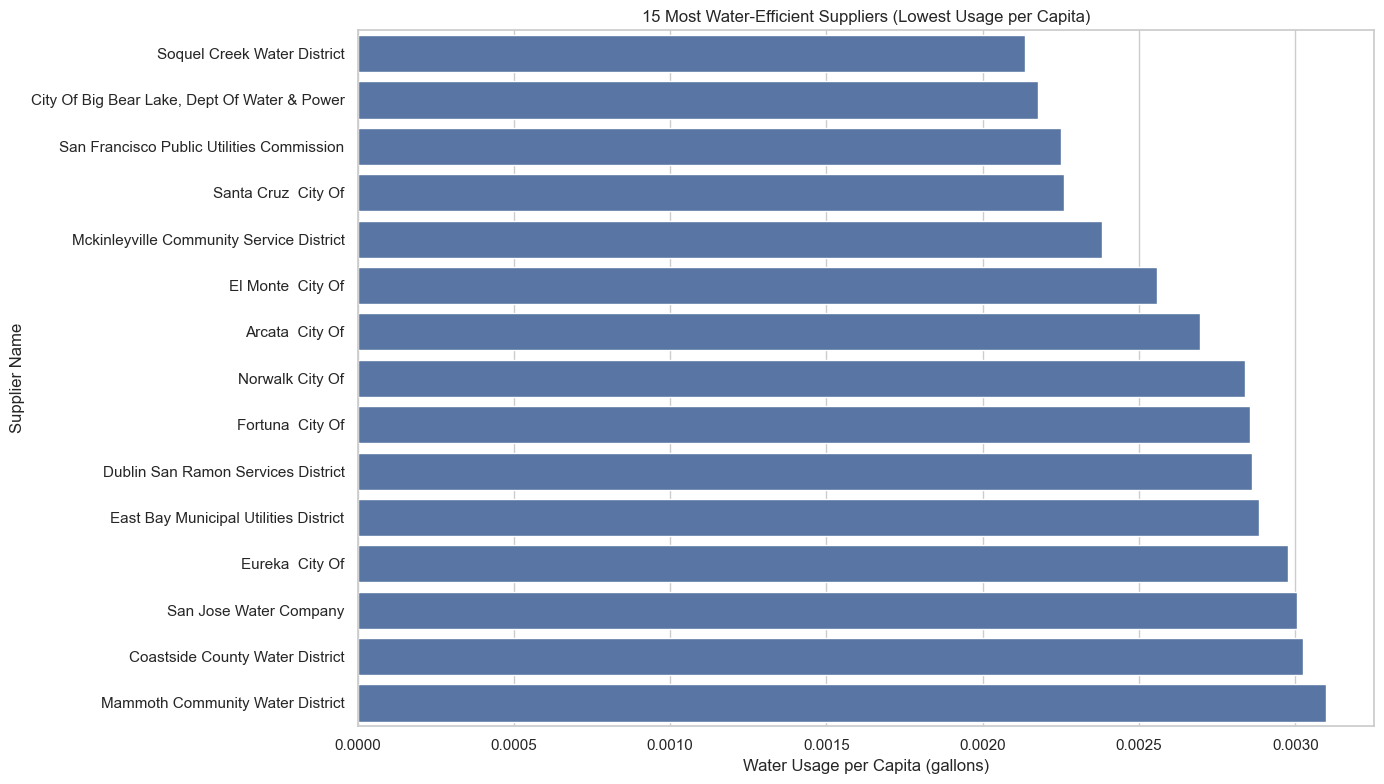

In [263]:
# Calculate efficiency metrics
efficiency_metrics = ddf.groupby('supplier_name').agg({
    'water_usage_per_capita': 'mean',
    'percent_non_revenue': 'mean',
    'reported_recycled_water': 'mean',
    'total_population_served': 'mean'
}).compute()

# Sort by efficiency (lower water usage per capita is more efficient)
most_efficient = efficiency_metrics.sort_values('water_usage_per_capita').head(15)
least_efficient = efficiency_metrics.sort_values('water_usage_per_capita', ascending=False).head(15)

# Plot most efficient suppliers
plt.figure(figsize=(14, 8))
sns.barplot(x='water_usage_per_capita', y=most_efficient.index, data=most_efficient.reset_index())
plt.title('15 Most Water-Efficient Suppliers (Lowest Usage per Capita)')
plt.xlabel('Water Usage per Capita (gallons)')
plt.ylabel('Supplier Name')
plt.tight_layout()
plt.savefig('images/most_efficient_suppliers.svg', dpi=300)
plt.show()
plt.close()

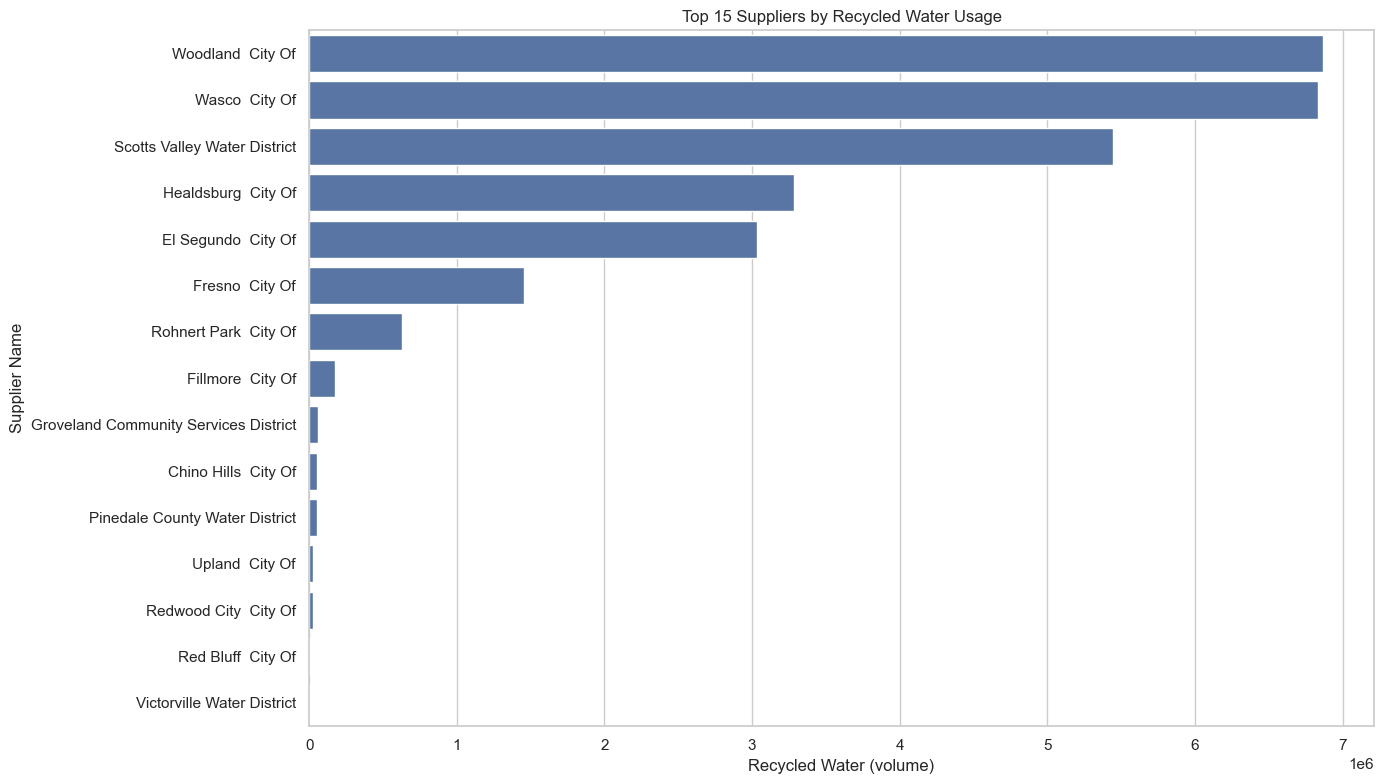

In [264]:
# Plot suppliers by recycled water percentage
recycling_leaders = efficiency_metrics.sort_values('reported_recycled_water', ascending=False).head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x='reported_recycled_water', y=recycling_leaders.index, data=recycling_leaders.reset_index())
plt.title('Top 15 Suppliers by Recycled Water Usage')
plt.xlabel('Recycled Water (volume)')
plt.ylabel('Supplier Name')
plt.tight_layout()
plt.savefig('images/top_recycling_suppliers.svg', dpi=300)
plt.show()
plt.close()

### Seasonal Pattern Analysis


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


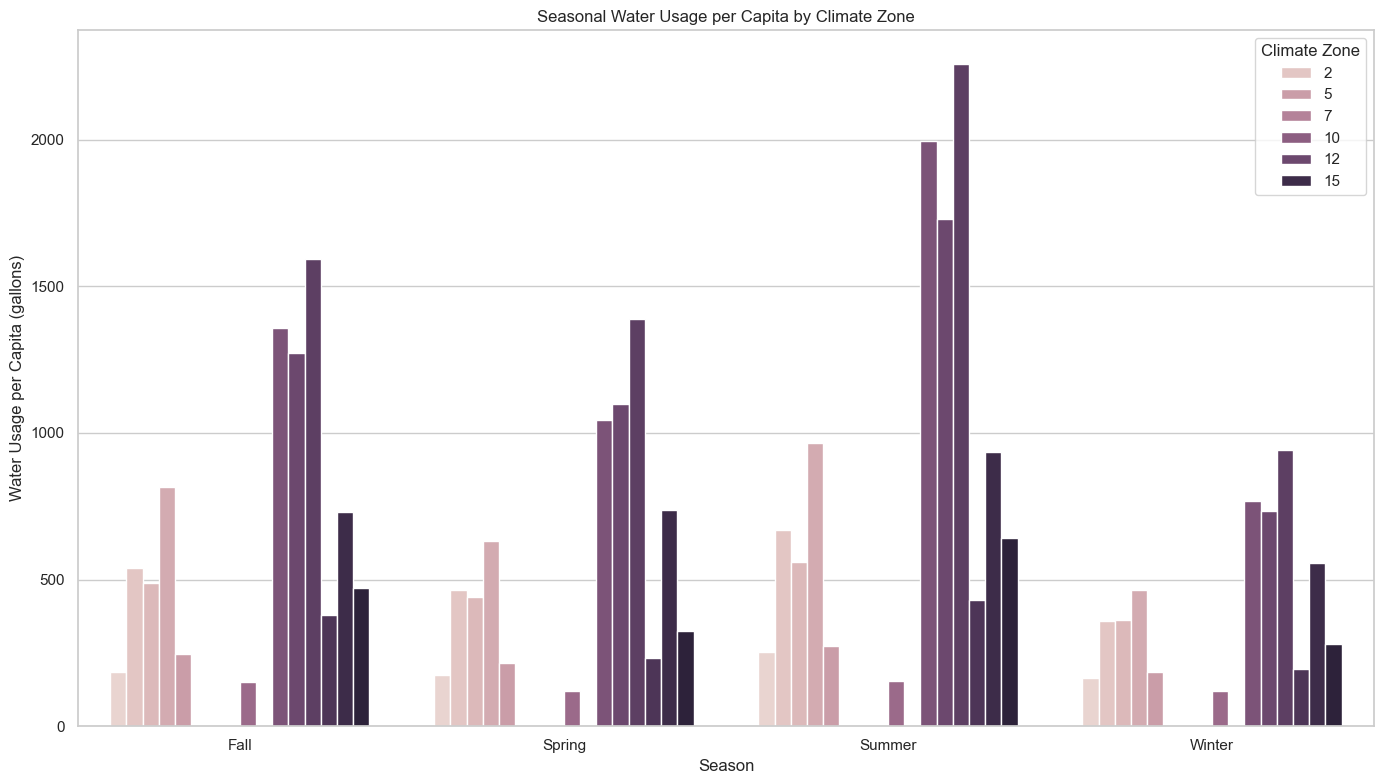

In [265]:
# Create season from month
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

seasonal_sample = ddf.compute()
seasonal_sample['season'] = seasonal_sample['month'].map(month_to_season)

# Analyze seasonal patterns by climate zone
seasonal_climate = seasonal_sample.groupby(['season', 'climate_zone'])['water_usage_per_capita'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='water_usage_per_capita', hue='climate_zone', data=seasonal_climate)
plt.title('Seasonal Water Usage per Capita by Climate Zone')
plt.xlabel('Season')
plt.ylabel('Water Usage per Capita (gallons)')
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.savefig('images/seasonal_climate_usage.svg', dpi=300)
plt.show()
plt.close()

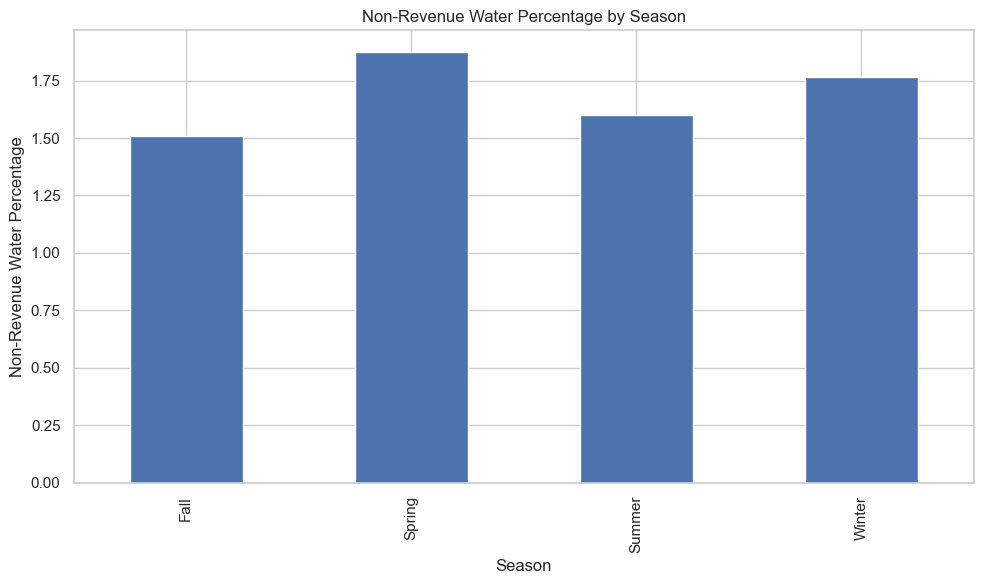

In [266]:
# Analyze seasonal patterns in non-revenue water
seasonal_non_revenue = seasonal_sample.groupby('season')['percent_non_revenue'].mean()
plt.figure(figsize=(10, 6))
seasonal_non_revenue.plot(kind='bar')
plt.title('Non-Revenue Water Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Non-Revenue Water Percentage')
plt.tight_layout()
plt.savefig('images/seasonal_non_revenue.svg', dpi=300)
plt.show()
plt.close()

### Geographic Analysis


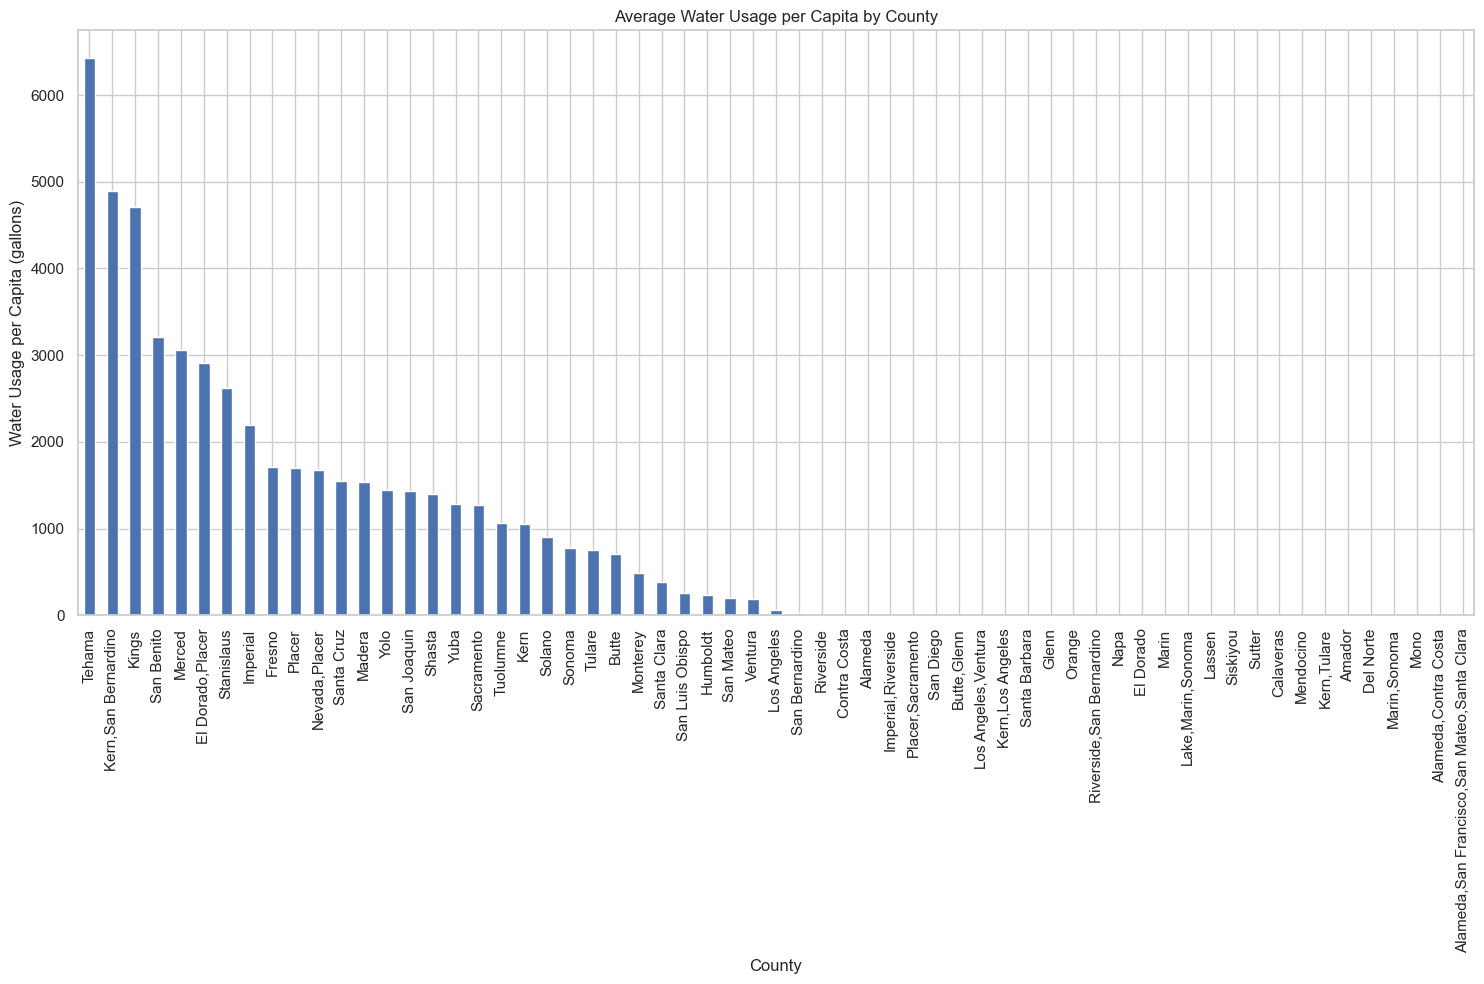

In [267]:
# County-level analysis
county_metrics = ddf.groupby('county').agg({
    'water_usage_per_capita': 'mean',
    'percent_non_revenue': 'mean',
    'reported_recycled_water': 'mean',
    'reservoir_storage': 'mean',
    'total_population_served': 'sum'
}).compute()

# Plot county water usage on a map (simplified version without actual map)
plt.figure(figsize=(15, 10))
county_metrics.sort_values('water_usage_per_capita', ascending=False)['water_usage_per_capita'].plot(kind='bar')
plt.title('Average Water Usage per Capita by County')
plt.xlabel('County')
plt.ylabel('Water Usage per Capita (gallons)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/county_water_usage.svg', dpi=300)
plt.show()
plt.close()

### Advanced Statistical Analysis


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


ANOVA results for climate zones: F-statistic = 335.318118112152, p-value = 0.0


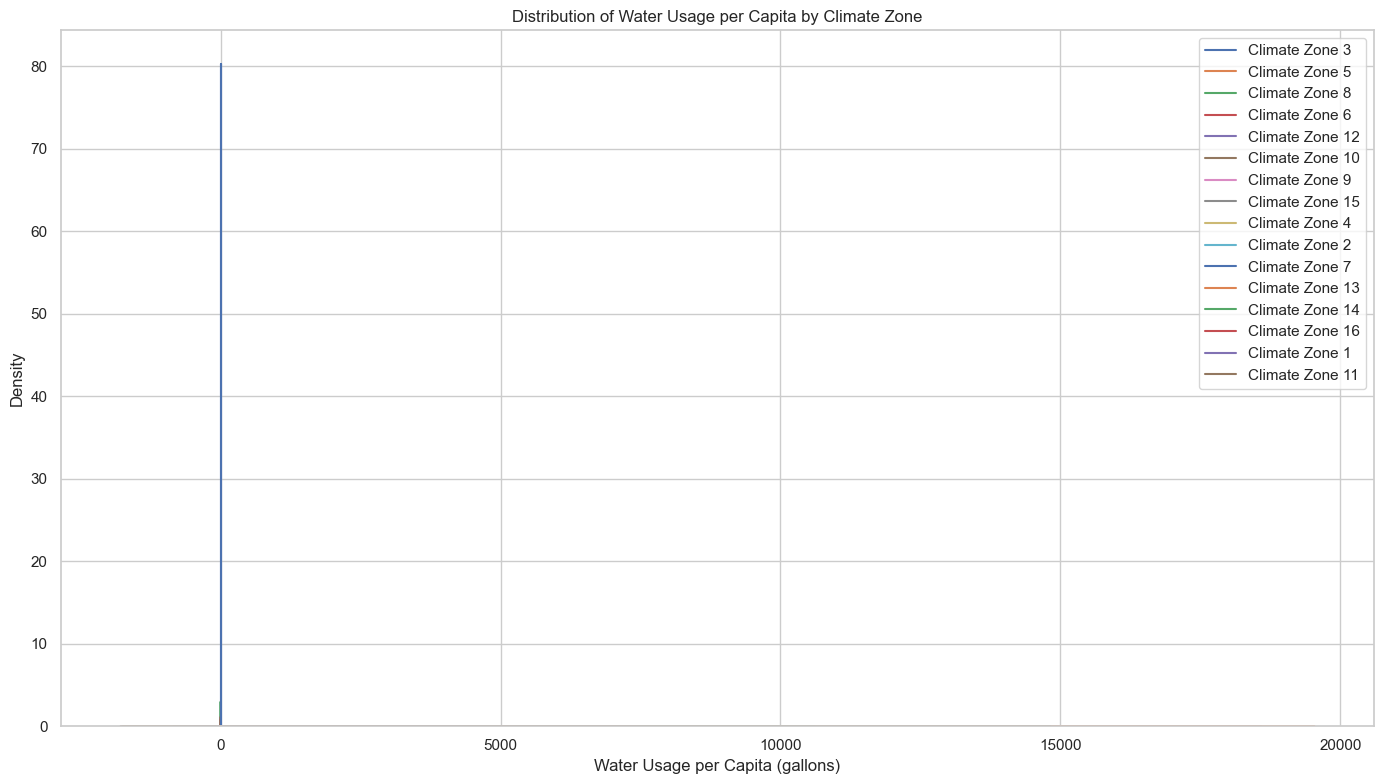

In [268]:
# Perform ANOVA to test for significant differences between climate zones
from scipy import stats

# Compute sample for ANOVA
anova_sample = ddf.compute()
climate_groups = [group['water_usage_per_capita'].values for name, group in anova_sample.groupby('climate_zone')]
f_stat, p_value = stats.f_oneway(*climate_groups)

print(f"ANOVA results for climate zones: F-statistic = {f_stat}, p-value = {p_value}")

# Create a distribution plot for water usage by climate zone
plt.figure(figsize=(14, 8))
for climate in anova_sample['climate_zone'].unique():
    subset = anova_sample[anova_sample['climate_zone'] == climate]['water_usage_per_capita']
    sns.kdeplot(subset, label=f'Climate Zone {climate}')
plt.title('Distribution of Water Usage per Capita by Climate Zone')
plt.xlabel('Water Usage per Capita (gallons)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('images/water_usage_distribution_by_climate.svg', dpi=300)
plt.show()
plt.close()

### Time Series Decomposition


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


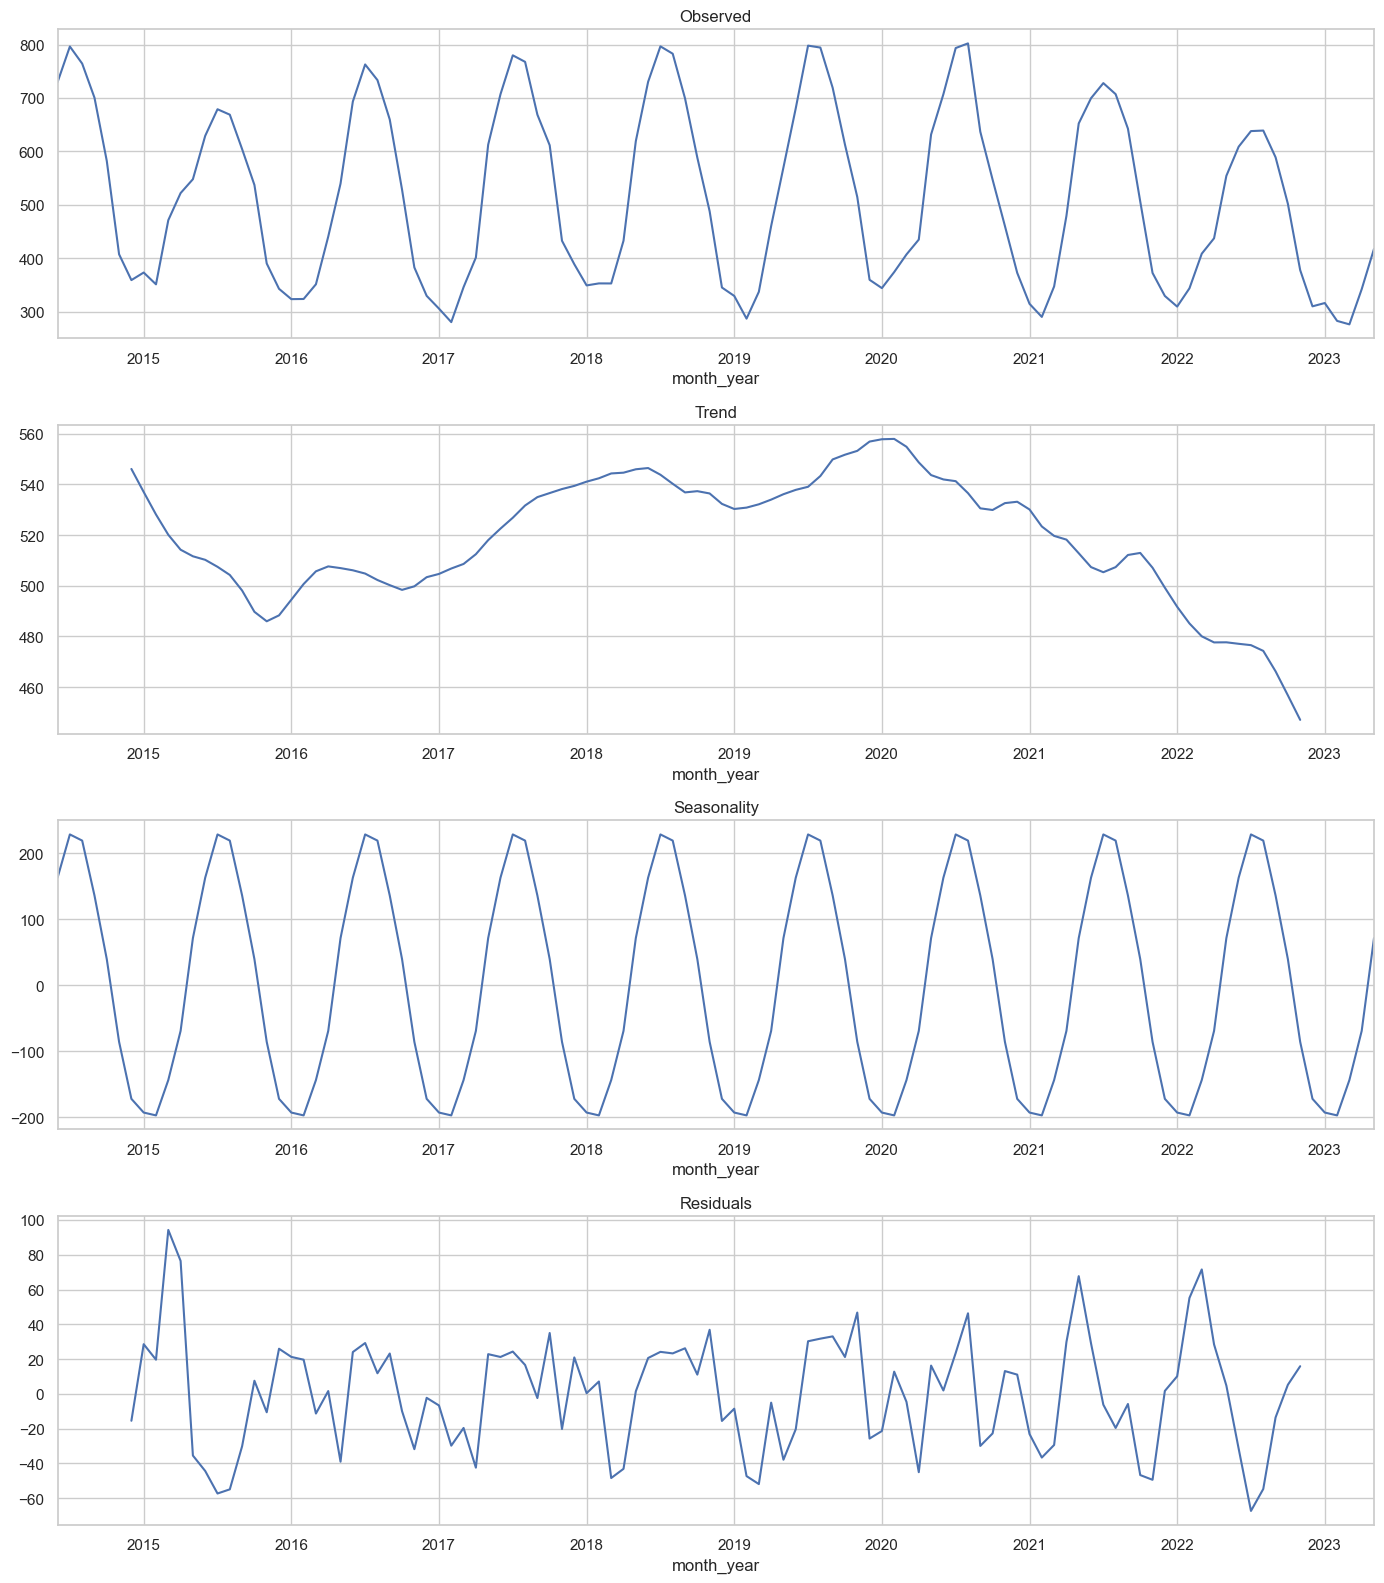

In [269]:
!pip install statsmodels
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare time series data
ts_data = ddf.groupby('month_year')['water_usage_per_capita'].mean().compute()
ts_data = ts_data.sort_index()

# Fill any missing values for decomposition
ts_data = ts_data.fillna(ts_data.mean())

# Perform decomposition (assuming monthly data with yearly seasonality)
decomposition = seasonal_decompose(ts_data, model='additive', period=12)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed') # original data
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend') # long-term movement
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality') # repeating patterns
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residuals') # all other unusal patterns
plt.tight_layout()
plt.savefig('images/time_series_decomposition.svg', dpi=300)
plt.show()
plt.close()

## Predictive Modeling

### Setting up environment

In [270]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [271]:
# Compute a sample for feature selection and initial modeling
# We were using a sample of the data to avoid memory issues
model_data = ddf.sample(frac=1).compute()

# Add new climate and water quality features
climate_features = [
    'precip', 'ETo_mm', 'max_temp', 'min_temp', 'avg_temp',
    'palmer_hydro', 'palmer_z_index'
]

water_quality_features = [
    'DissolvedOxygen', 'pH', 'ElectricalConductance'
]

# Original features
original_features = [
    'climate_zone', 'total_population_served', 'county_under_drought_declaration',
    'water_shortage_level_indicator', 'year', 'month', 'reservoir_storage', 
    'reported_recycled_water', 'percent_non_revenue', 'hydrologic_region'
]

# Combine all features
features = original_features + climate_features + water_quality_features

# Target variable
target = 'water_usage_per_capita'

# Convert boolean to integer
model_data['county_under_drought_declaration'] = model_data['county_under_drought_declaration'].astype(int)

# Split data into features and target
X = model_data[features]
y = model_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (33975, 20)
Testing set size: (8494, 20)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


### Feature Engineering

In [272]:
# Identify categorical and numerical features
categorical_features = ['climate_zone', 'hydrologic_region', 'county_under_drought_declaration']
numerical_features = [col for col in features if col not in categorical_features]

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')), # fill missing with median
            ('scaler', StandardScaler()) # standardize numerical features
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')), # fill missing with most frequent
            ('onehot', OneHotEncoder(handle_unknown='ignore')) # ignore unknown categories
        ]), categorical_features)
    ])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")

Processed training data shape: (33975, 45)


### Building Multiple Regression Models

Here we tried to build multiple models with different architectures and see which one performs best on the test set. We gave them all the same data and the same hyperparameters, so the only difference is the architecture. We choose the best among them.

In [273]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_processed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'R²': r2}
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Create a comparison dataframe
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Identify the best model based on R²
best_model_name = results_df['R²'].idxmax()
print(f"\nBest model: {best_model_name} with R² of {results_df.loc[best_model_name, 'R²']:.4f}")

Training Linear Regression...
Linear Regression - RMSE: 1529.75, R²: 0.1674
Training Ridge Regression...
Ridge Regression - RMSE: 1529.71, R²: 0.1674
Training Lasso Regression...
Lasso Regression - RMSE: 1529.69, R²: 0.1675
Training Random Forest...
Random Forest - RMSE: 433.16, R²: 0.9332
Training Gradient Boosting...
Gradient Boosting - RMSE: 1113.62, R²: 0.5588
Training XGBoost...
XGBoost - RMSE: 498.86, R²: 0.9115

Model Comparison:
                          RMSE        R²
Linear Regression  1529.751727  0.167402
Ridge Regression   1529.714968  0.167442
Lasso Regression   1529.691036  0.167468
Random Forest       433.161638  0.933243
Gradient Boosting  1113.615959  0.558770
XGBoost             498.858373  0.911458

Best model: Random Forest with R² of 0.9332


Random Forest always does good, we could just comment every other model

### Feature Importance Analysis

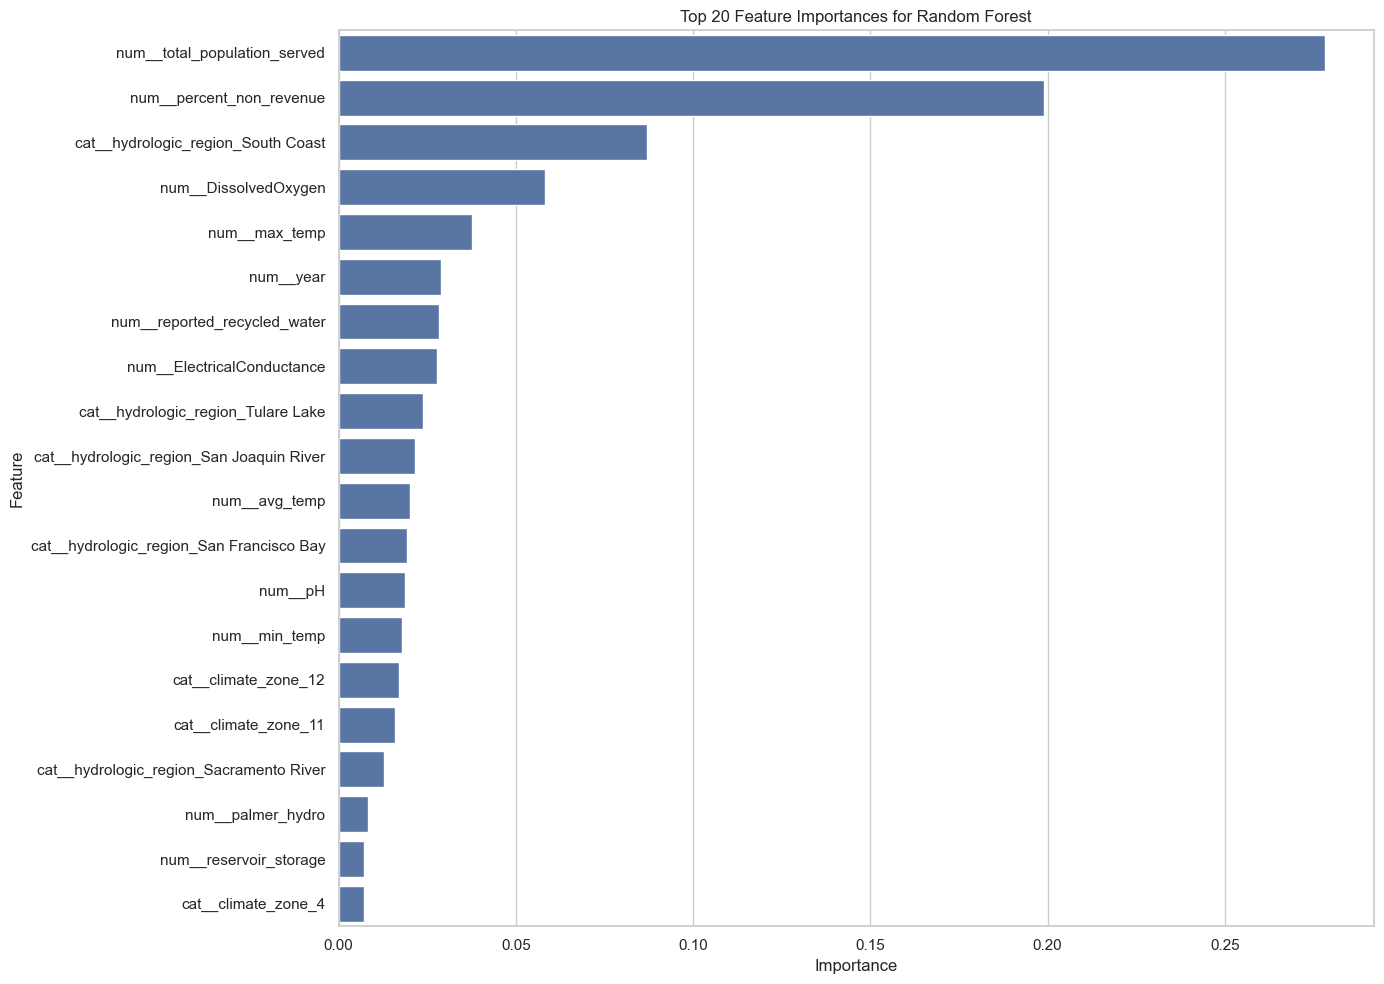

Top 10 most important features:
                                     Feature  Importance
0               num__total_population_served    0.278129
6                   num__percent_non_revenue    0.198862
40        cat__hydrologic_region_South Coast    0.087136
14                      num__DissolvedOxygen    0.058104
9                              num__max_temp    0.037591
2                                  num__year    0.028941
5               num__reported_recycled_water    0.028259
16                num__ElectricalConductance    0.027754
42        cat__hydrologic_region_Tulare Lake    0.023848
39  cat__hydrologic_region_San Joaquin River    0.021533


In [274]:
# Feature importance analysis for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    best_model = models[best_model_name]
    
    # For tree-based models, feature importance is available directly
    importances = best_model.feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    
    # Create a dataframe for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False).head(20)  # Show top 20 instead of 15
    
    # Plot
    plt.figure(figsize=(14, 10))  # Larger figure for more features
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Top 20 Feature Importances for {best_model_name}')
    plt.tight_layout()
    plt.savefig('images/feature_importance.svg', dpi=300)
    plt.show()
    plt.close()
    
    print("Top 10 most important features:")
    print(importance_df.head(10))

In [275]:
# Group feature importance by category
# Extract the original feature name from the transformed feature names
def extract_original_feature(feature_name):
    if feature_name.startswith('num__'):
        return feature_name[5:]
    elif feature_name.startswith('cat__'):
        # Extract the feature name before the category value
        parts = feature_name[5:].split('_')
        if len(parts) > 1:
            return parts[0]
        return feature_name[5:]
    return feature_name

importance_df['Original_Feature'] = importance_df['Feature'].apply(extract_original_feature)

# Group by original feature and sum importance
grouped_importance = importance_df.groupby('Original_Feature')['Importance'].sum().reset_index()
grouped_importance = grouped_importance.sort_values('Importance', ascending=False)

# Categorize features
def categorize_feature(feature):
    if feature in climate_features:
        return 'Climate'
    elif feature in water_quality_features:
        return 'Water Quality'
    else:
        return 'Original'

grouped_importance['Category'] = grouped_importance['Original_Feature'].apply(categorize_feature)

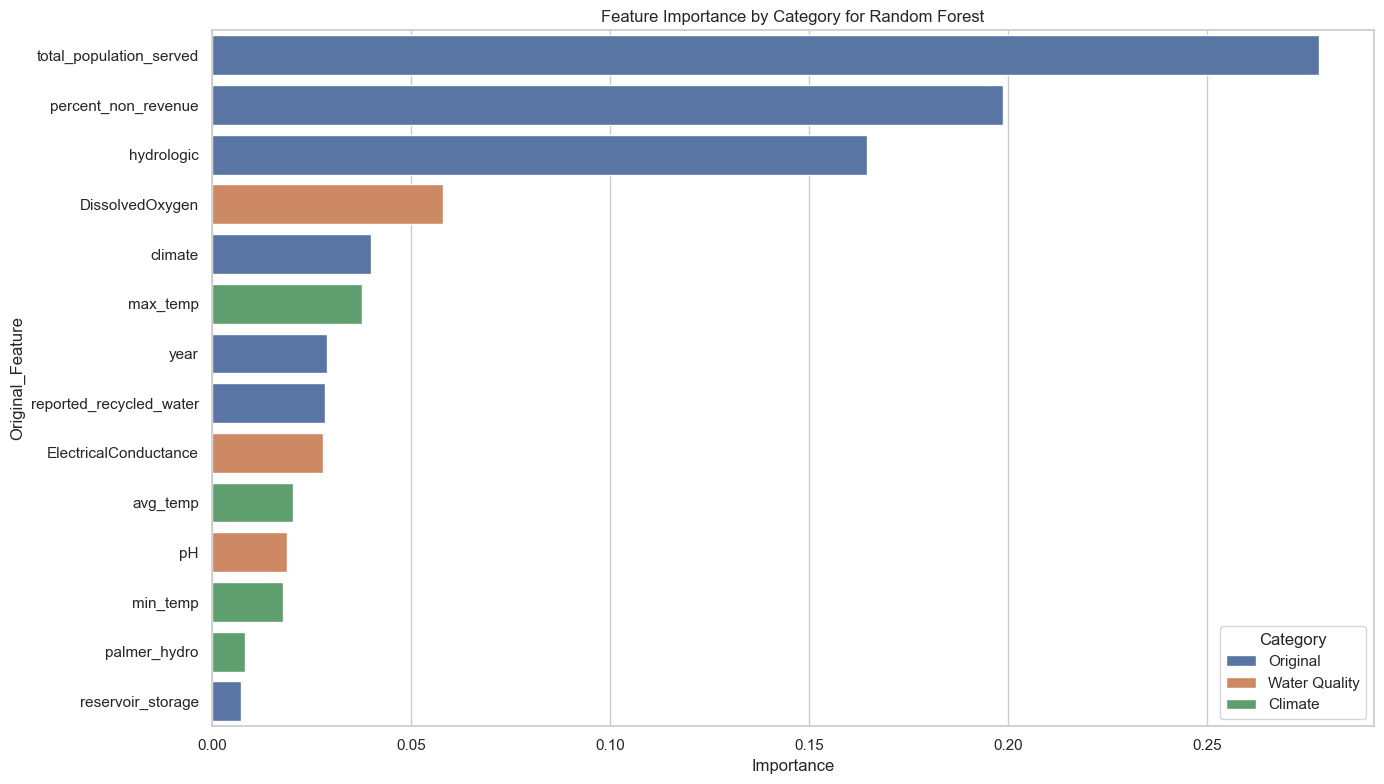

In [276]:
# Plot grouped importance by category
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Original_Feature', hue='Category', data=grouped_importance)
plt.title(f'Feature Importance by Category for {best_model_name}')
plt.tight_layout()
plt.savefig('images/feature_importance_by_category.svg', dpi=300)
plt.show()
plt.close()

### Hyperparameter Tuning

Commented out because model trained and saved already

In [ ]:
'''
# Define hyperparameter grid for the best model
if best_model_name == 'Random Forest': # this is the best model
    param_grid = { # we go through all the combinations of these parameters (4*3*3*3=108)
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestRegressor(random_state=42)
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    model = GradientBoostingRegressor(random_state=42)
    
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    model = xgb.XGBRegressor(random_state=42)
    
else:  # Linear models
    if best_model_name == 'Ridge Regression':
        param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
        model = Ridge()
    elif best_model_name == 'Lasso Regression':
        param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
        model = Lasso()
    else:  # Linear Regression
        param_grid = {}
        model = LinearRegression()

# Perform grid search if we have parameters to tune
if param_grid:
    print(f"Tuning hyperparameters for {best_model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_processed, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Evaluate the tuned model
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_processed)
    
    tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
    tuned_r2 = r2_score(y_test, y_pred_tuned)
    
    print(f"Tuned {best_model_name} - RMSE: {tuned_rmse:.2f}, R²: {tuned_r2:.4f}")
    
    # Compare with original model
    original_rmse = results[best_model_name]['RMSE']
    original_r2 = results[best_model_name]['R²']
    
    print(f"Improvement - RMSE: {original_rmse - tuned_rmse:.2f}, R²: {tuned_r2 - original_r2:.4f}")
    
    # Update the best model
    models[best_model_name] = tuned_model
'''

Tuning hyperparameters for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - RMSE: 433.30, R²: 0.9332
Improvement - RMSE: -0.14, R²: -0.0000


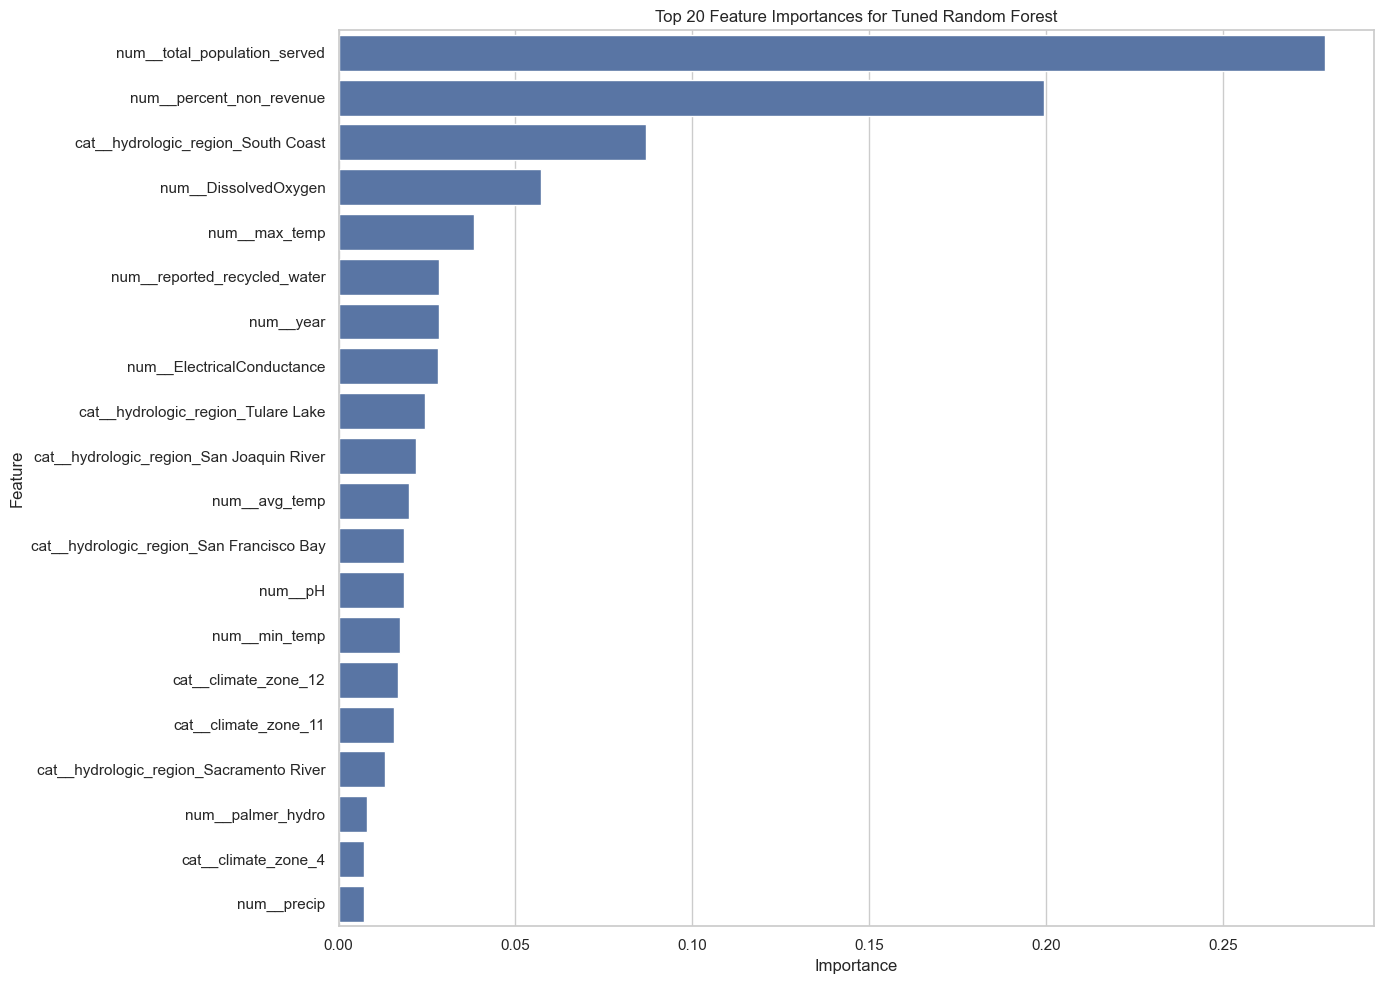

In [279]:
# Feature importance of the final tuned model
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    final_model = models[best_model_name]
    
    # Get feature importances
    final_importances = final_model.feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    
    # Create a dataframe
    final_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': final_importances
    })
    
    # Sort by importance
    final_importance_df = final_importance_df.sort_values('Importance', ascending=False).head(20)
    
    # Plot
    plt.figure(figsize=(14, 10))
    sns.barplot(x='Importance', y='Feature', data=final_importance_df)
    plt.title(f'Top 20 Feature Importances for Tuned {best_model_name}')
    plt.tight_layout()
    plt.savefig('images/tuned_feature_importance.svg', dpi=300)
    plt.show()
    plt.close()

## Model Evaluation and Analysis

### Analyze Drought Impact on Analysis

In [280]:
# Create a new feature set with varying drought conditions
# Start with a copy of a single data point
drought_analysis = X_test.iloc[0:1].copy()
drought_analysis = pd.concat([drought_analysis] * 2, ignore_index=True)

# Set different drought conditions
drought_analysis['county_under_drought_declaration'] = [0, 1]  # No drought, drought

# Process the data
drought_analysis_processed = preprocessor.transform(drought_analysis)

# Make predictions
drought_predictions = best_model.predict(drought_analysis_processed)

# Display results
print("\nDrought Impact Analysis:")
print(f"Predicted water usage without drought: {drought_predictions[0]:.2f} gallons per capita")
print(f"Predicted water usage with drought: {drought_predictions[1]:.2f} gallons per capita")
print(f"Difference: {drought_predictions[1] - drought_predictions[0]:.2f} gallons per capita")


Drought Impact Analysis:
Predicted water usage without drought: 98.78 gallons per capita
Predicted water usage with drought: 99.02 gallons per capita
Difference: 0.24 gallons per capita


### Seasonal Prediction Analysis

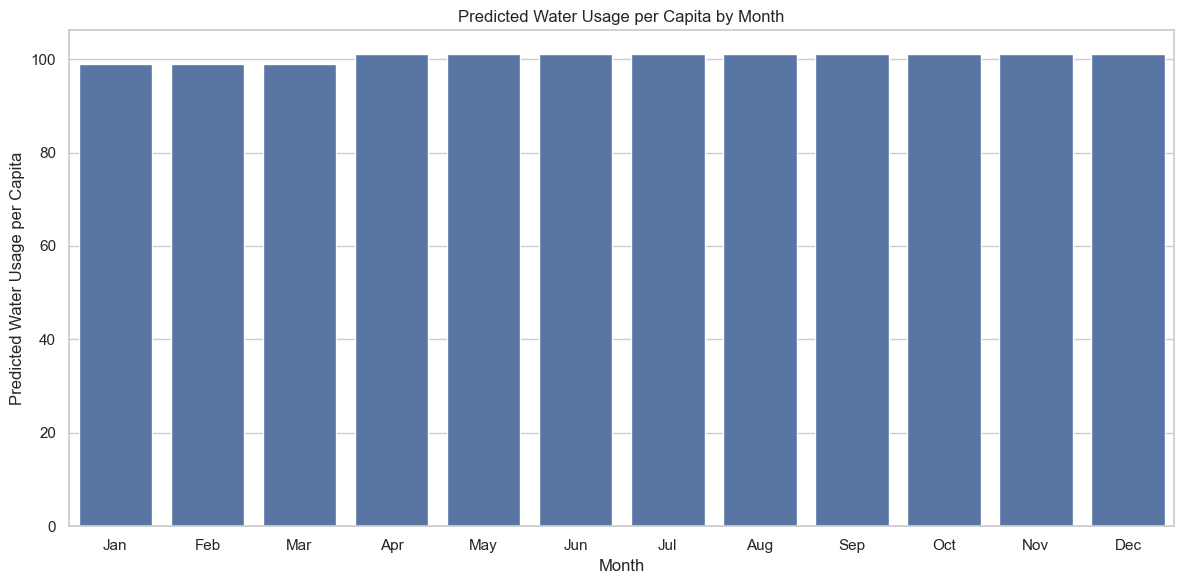


Seasonal Analysis:
Highest predicted usage: Month 8 (101.09 gallons)
Lowest predicted usage: Month 2 (99.02 gallons)


In [281]:
# Create a dataset with different months
seasonal_analysis = X_test.iloc[0:1].copy()
seasonal_analysis = pd.concat([seasonal_analysis] * 12, ignore_index=True)

# Set different months (1-12)
seasonal_analysis['month'] = range(1, 13)

# Process the data
seasonal_analysis_processed = preprocessor.transform(seasonal_analysis)

# Make predictions
seasonal_predictions = best_model.predict(seasonal_analysis_processed)

# Create a dataframe for visualization
seasonal_df = pd.DataFrame({
    'Month': range(1, 13),
    'Predicted Usage': seasonal_predictions
})

# Plot seasonal predictions
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Predicted Usage', data=seasonal_df)
plt.title('Predicted Water Usage per Capita by Month')
plt.xlabel('Month')
plt.ylabel('Predicted Water Usage per Capita')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.savefig('images/seasonal_predictions.svg', dpi=300)
plt.show()
plt.close()

print("\nSeasonal Analysis:")
print(f"Highest predicted usage: Month {seasonal_df['Predicted Usage'].idxmax() + 1} ({seasonal_df['Predicted Usage'].max():.2f} gallons)")
print(f"Lowest predicted usage: Month {seasonal_df['Predicted Usage'].idxmin() + 1} ({seasonal_df['Predicted Usage'].min():.2f} gallons)")

### Population Impact Analysis

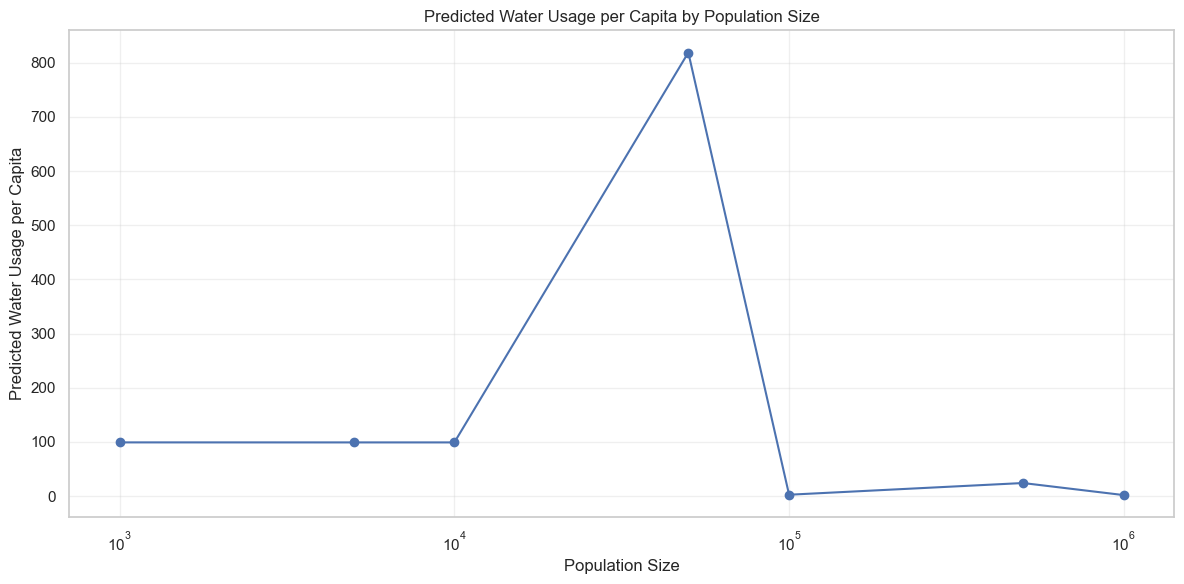


Population Impact Analysis:
   Population  Predicted Usage
0        1000        99.067779
1        5000        99.022852
2       10000        99.022826
3       50000       818.843063
4      100000         2.441914
5      500000        24.034258
6     1000000         1.748610


In [282]:
# Create a dataset with different population sizes
population_analysis = X_test.iloc[0:1].copy()
population_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
population_analysis = pd.concat([population_analysis] * len(population_sizes), ignore_index=True)

# Set different population sizes
population_analysis['total_population_served'] = population_sizes

# Process the data
population_analysis_processed = preprocessor.transform(population_analysis)

# Make predictions
population_predictions = best_model.predict(population_analysis_processed)

# Create a dataframe for visualization
population_df = pd.DataFrame({
    'Population': population_sizes,
    'Predicted Usage': population_predictions
})

# Plot population impact
plt.figure(figsize=(12, 6))
plt.plot(population_df['Population'], population_df['Predicted Usage'], marker='o')
plt.title('Predicted Water Usage per Capita by Population Size')
plt.xlabel('Population Size')
plt.ylabel('Predicted Water Usage per Capita')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/population_impact.svg', dpi=300)
plt.show()
plt.close()

print("\nPopulation Impact Analysis:")
print(population_df)

### Save Model for future use

In [ ]:
'''
import joblib

# Save the preprocessor and model
joblib.dump(preprocessor, 'water_usage_preprocessor.pkl')
joblib.dump(best_model, 'water_usage_model.pkl')

# Save feature names for reference
with open('model_features.txt', 'w') as f:
    f.write('\n'.join(features))

print("\nModel and preprocessor saved successfully!")
'''


Model and preprocessor saved successfully!


In [286]:
import joblib

# Load the preprocessor
preprocessor = joblib.load('water_usage_preprocessor.pkl')

# Load the model
model = joblib.load('water_usage_model.pkl')

# Load feature names (optional)
with open('model_features.txt', 'r') as f:
    features = f.read().splitlines()

print("Model and preprocessor loaded successfully!")

Model and preprocessor loaded successfully!


## Anamoly detection

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

# Load your data
# Assuming ddf is your Dask DataFrame
sample_df = ddf.compute()  # For anomaly detection, we'll use the full dataset

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py:1537: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)


In [311]:
# Select relevant features for anomaly detection
anomaly_features = [
    'water_usage_per_capita', 'reported_final_total_potable_water_production', 
    'percent_non_revenue', 'reservoir_storage',
    # Climate features
    'precip', 'max_temp', 'avg_temp', 'palmer_hydro',
    # Water quality features
    'DissolvedOxygen', 'pH', 'ElectricalConductance',
    # Add climate_zone for grouping
    'climate_zone'
]

# Drop rows with missing values in these features
anomaly_data = sample_df[anomaly_features].dropna()


# Drop rows with missing values in these features
anomaly_data = sample_df[anomaly_features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anomaly_data)

In [314]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.03, random_state=42)  # Assuming 3% anomalies
anomaly_labels = model.fit_predict(scaled_data)

# Add anomaly labels to the original data
anomaly_data['anomaly'] = anomaly_labels
anomaly_data['anomaly_score'] = model.decision_function(scaled_data)
anomaly_data['is_anomaly'] = anomaly_data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

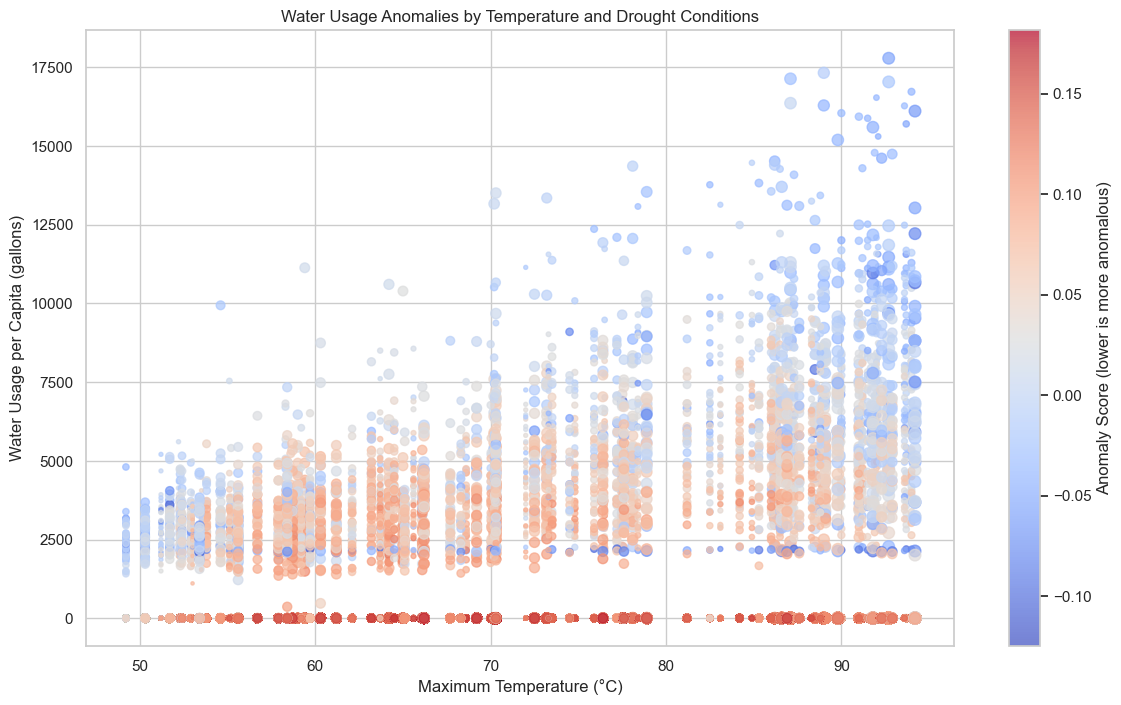

In [313]:
# Create a multi-dimensional visualization of anomalies
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    anomaly_data['max_temp'], 
    anomaly_data['water_usage_per_capita'],
    c=anomaly_data['anomaly_score'],
    cmap='coolwarm',
    alpha=0.7,
    s=anomaly_data['palmer_hydro'].abs() * 10  # Size points by drought severity
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Anomaly Score (lower is more anomalous)')

# Add labels and title
plt.title('Water Usage Anomalies by Temperature and Drought Conditions')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Water Usage per Capita (gallons)')

# Add annotations for extreme anomalies
extreme_anomalies = anomaly_data[anomaly_data['anomaly_score'] < -0.2].head(5)
for idx, row in extreme_anomalies.iterrows():
    plt.annotate(f"Score: {row['anomaly_score']:.2f}",
                xy=(row['max_temp'], row['water_usage_per_capita']),
                xytext=(10, 10),
                textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

plt.savefig('images/climate_anomaly_detection.svg', dpi=300)
plt.show()
plt.close()

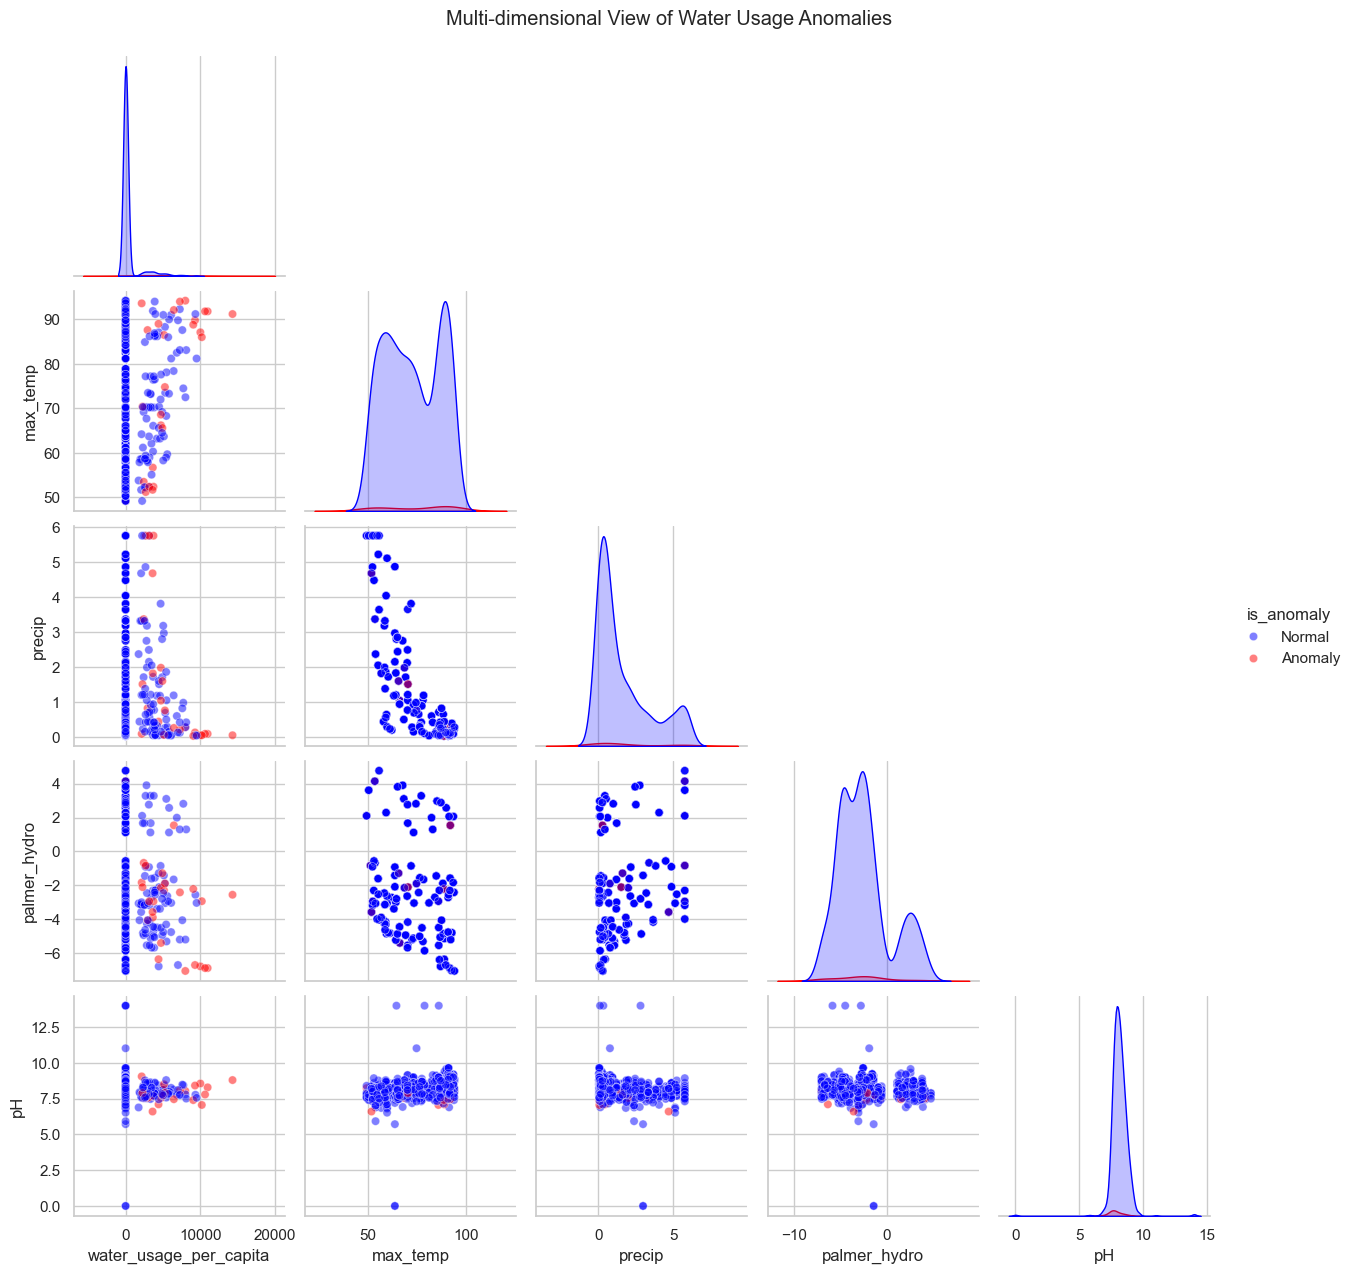

In [303]:
# Create a pairplot for anomalies across multiple dimensions
sns.pairplot(
    anomaly_data.sample(min(1000, len(anomaly_data))),  # Sample to avoid overcrowding
    vars=['water_usage_per_capita', 'max_temp', 'precip', 'palmer_hydro', 'pH'],
    hue='is_anomaly',
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    corner=True,  # Show only the lower triangle
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Multi-dimensional View of Water Usage Anomalies', y=1.02)
plt.savefig('images/multi_dimension_anomalies.svg', dpi=300)
plt.show()
plt.close()

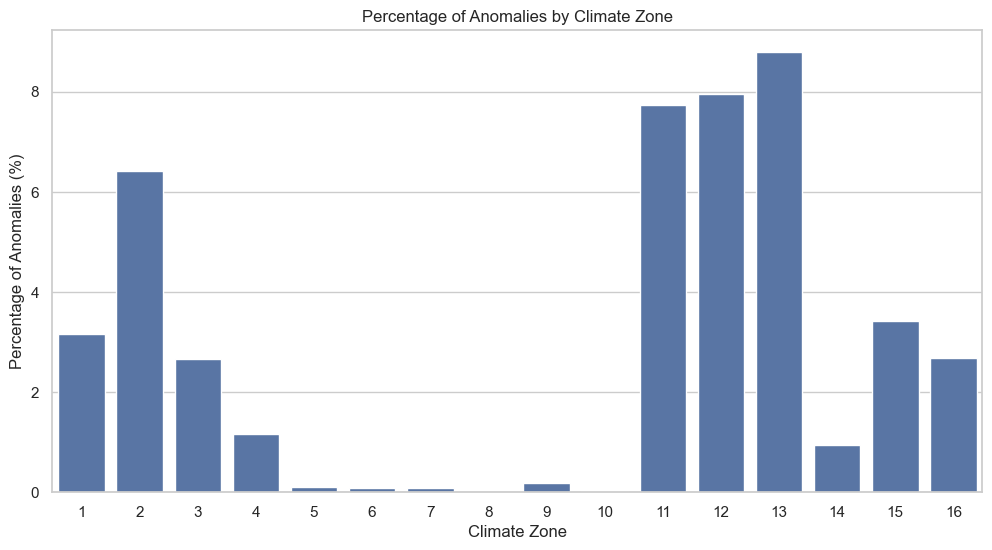

In [315]:
# Analyze anomalies by climate zone
plt.figure(figsize=(12, 6))
anomaly_by_climate = anomaly_data.groupby('climate_zone')['is_anomaly'].apply(
    lambda x: (x == 'Anomaly').mean() * 100  # Calculate percentage of anomalies
).reset_index()
anomaly_by_climate.columns = ['climate_zone', 'anomaly_percentage']

sns.barplot(x='climate_zone', y='anomaly_percentage', data=anomaly_by_climate)
plt.title('Percentage of Anomalies by Climate Zone')
plt.xlabel('Climate Zone')
plt.ylabel('Percentage of Anomalies (%)')
plt.savefig('images/anomaly_by_climate_zone.svg', dpi=300)
plt.show()
plt.close()

In [ ]:
# Identify top anomalies
top_anomalies = anomaly_data[anomaly_data['anomaly'] == -1].sort_values('anomaly_score')

# Merge with original data to get more context
# Use suffixes to avoid column name conflicts
top_anomalies_with_context = pd.merge(
    top_anomalies,
    sample_df[['supplier_name', 'county', 'hydrologic_region', 'month_year', 'climate_zone', 
               'palmer_hydro', 'max_temp', 'precip']],
    left_index=True,
    right_index=True,
    suffixes=('', '_orig')  # Avoid duplicate column names
)

Anomalies saved to water_usage_anomalies.csv


In [317]:
# Calculate how extreme each anomaly is compared to typical values
top_anomalies_with_context['typical_usage'] = sample_df['water_usage_per_capita'].median()
top_anomalies_with_context['percent_deviation'] = ((top_anomalies_with_context['water_usage_per_capita'] - 
                                                  top_anomalies_with_context['typical_usage']) / 
                                                  top_anomalies_with_context['typical_usage'] * 100)

# Create severity categories
def classify_severity(percent_deviation):
    if percent_deviation > 500:
        return 'Critical'
    elif percent_deviation > 200:
        return 'Severe'
    elif percent_deviation > 100:
        return 'Moderate'
    else:
        return 'Minor'

top_anomalies_with_context['severity'] = top_anomalies_with_context['percent_deviation'].apply(classify_severity)

In [318]:
# Save the anomalies for further investigation
top_anomalies_with_context.to_csv('water_usage_anomalies.csv')
print("Anomalies saved to water_usage_anomalies.csv")

Anomalies saved to water_usage_anomalies.csv


In [319]:
print(f"Detected {len(top_anomalies)} anomalies out of {len(anomaly_data)} data points")
print("Top 5 anomalies with climate and water quality context:")
print(top_anomalies_with_context[['supplier_name', 'county', 'month_year', 'water_usage_per_capita', 
                                 'max_temp', 'precip', 'palmer_hydro', 'severity']].head())

Detected 1275 anomalies out of 42469 data points
Top 5 anomalies with climate and water quality context:
                                     supplier_name       county month_year  \
103         California Water Service Company Selma       Fresno 2014-06-01   
103     California-American Water Ventura District      Ventura 2014-08-01   
103             Golden State Water Company Artesia  Los Angeles 2014-10-01   
103                                 Ripon  City Of  San Joaquin 2014-12-01   
103  Western Municipal Water District Of Riverside    Riverside 2015-03-01   

     water_usage_per_capita  max_temp  precip  palmer_hydro  severity  
103             2166.080588      49.2   5.765           2.1  Critical  
103             2166.080588      49.2   5.765           2.1  Critical  
103             2166.080588      49.2   5.765           2.1  Critical  
103             2166.080588      49.2   5.765           2.1  Critical  
103             2166.080588      49.2   5.765           2.1  Criti

## Conservation Policy Impact Analysis

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert month_year to datetime if not already
sample_df['month_year'] = pd.to_datetime(sample_df['month_year'])

In [322]:
# Define a conservation policy implementation date
# You may need to research actual policy implementation dates
conservation_date = pd.to_datetime('2015-04-01')  # Example: California's 2015 mandatory restrictions

# Create a before/after indicator
sample_df['policy_period'] = sample_df['month_year'].apply(
    lambda x: 'After Implementation' if x >= conservation_date else 'Before Implementation'
)

# Aggregate monthly water usage before and after policy
monthly_usage = sample_df.groupby(['month_year', 'policy_period'])['water_usage_per_capita'].mean().reset_index()

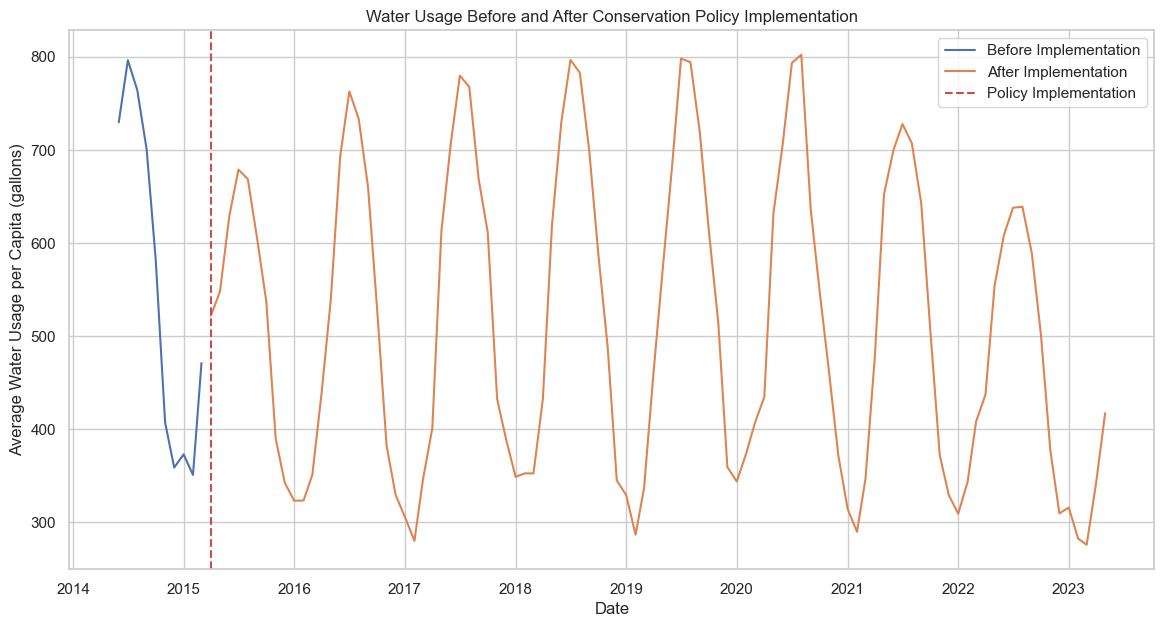

In [323]:
# Plot the time series with the policy implementation date marked
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_usage, x='month_year', y='water_usage_per_capita', hue='policy_period')
plt.axvline(x=conservation_date, color='r', linestyle='--', label='Policy Implementation')
plt.title('Water Usage Before and After Conservation Policy Implementation')
plt.xlabel('Date')
plt.ylabel('Average Water Usage per Capita (gallons)')
plt.legend()
plt.savefig('images/conservation_impact_time_series.svg', dpi=300)
plt.show()
plt.close()

In [324]:
# Define multiple conservation policy implementation dates
conservation_policies = {
    'Emergency Drought Declaration': pd.to_datetime('2014-01-17'),  # Gov. Brown's initial drought declaration
    'Mandatory Restrictions': pd.to_datetime('2015-04-01'),  # 25% mandatory urban water use reduction
    'Extended Emergency Regulations': pd.to_datetime('2016-02-02'),  # Extension of emergency regulations
    'Drought Emergency Ended': pd.to_datetime('2017-04-07'),  # End of drought emergency (except some counties)
    'Water Conservation Legislation': pd.to_datetime('2018-05-31'),  # SB 606 & AB 1668 long-term conservation laws
    'Drought Emergency Renewed': pd.to_datetime('2021-10-19')  # New drought emergency declaration
}

# Create a policy period indicator with multiple phases
sample_df['policy_period'] = 'Pre-Policy'  # Default value

# Assign policy periods based on dates
for policy_name, policy_date in conservation_policies.items():
    # Create a mask for dates after this policy but before the next one
    next_dates = [d for d in conservation_policies.values() if d > policy_date]
    if next_dates:
        next_date = min(next_dates)
        mask = (sample_df['month_year'] >= policy_date) & (sample_df['month_year'] < next_date)
    else:
        mask = sample_df['month_year'] >= policy_date
    
    sample_df.loc[mask, 'policy_period'] = policy_name

In [325]:
# Visualize water usage across multiple policy periods
plt.figure(figsize=(16, 8))
monthly_usage = sample_df.groupby(['month_year', 'policy_period'])['water_usage_per_capita'].mean().reset_index()

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='month_year', ylabel='water_usage_per_capita'>

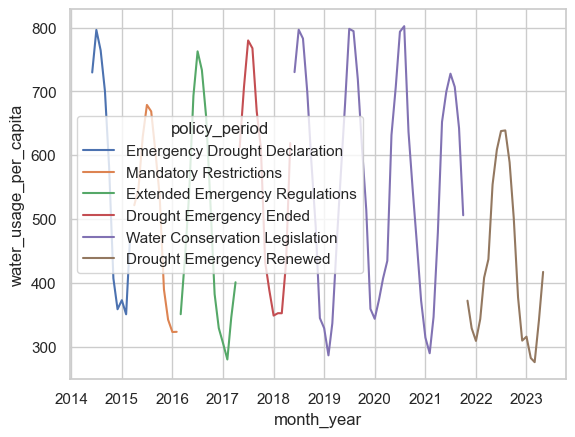

In [326]:
# Plot the time series with vertical lines for each policy
sns.lineplot(data=monthly_usage, x='month_year', y='water_usage_per_capita', hue='policy_period')

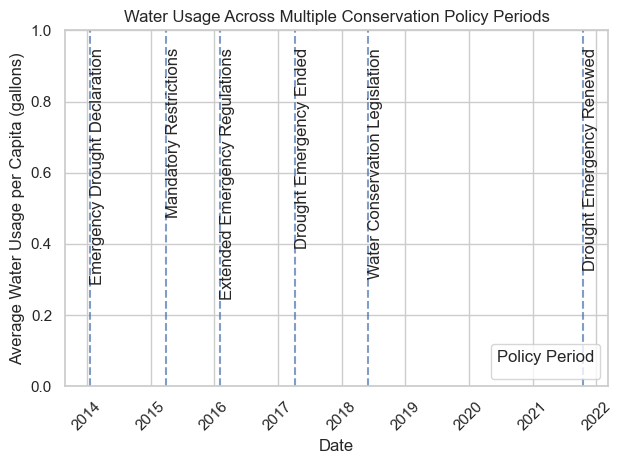

In [327]:
# Add vertical lines for each policy implementation
for policy_name, policy_date in conservation_policies.items():
    plt.axvline(x=policy_date, linestyle='--', alpha=0.7)
    plt.text(policy_date, plt.ylim()[1]*0.95, policy_name, rotation=90, verticalalignment='top')

plt.title('Water Usage Across Multiple Conservation Policy Periods')
plt.xlabel('Date')
plt.ylabel('Average Water Usage per Capita (gallons)')
plt.xticks(rotation=45)
plt.legend(title='Policy Period')
plt.tight_layout()
plt.savefig('images/multi_policy_impact_analysis.svg', dpi=300)
plt.show()
plt.close()

In [328]:
# Compare average water usage across policy periods
policy_impact = sample_df.groupby('policy_period')['water_usage_per_capita'].agg(['mean', 'std', 'count']).reset_index()
print("Conservation Policy Impact Analysis Across Multiple Policies:")
print(policy_impact)

Conservation Policy Impact Analysis Across Multiple Policies:
                    policy_period        mean          std  count
0         Drought Emergency Ended  546.746278  1700.968590   5140
1       Drought Emergency Renewed  425.776604  1397.783192   7510
2   Emergency Drought Declaration  552.603386  1839.426933   4007
3  Extended Emergency Regulations  482.302266  1508.381115   5693
4          Mandatory Restrictions  506.047324  1547.617870   4460
5  Water Conservation Legislation  554.938204  1763.872953  15659


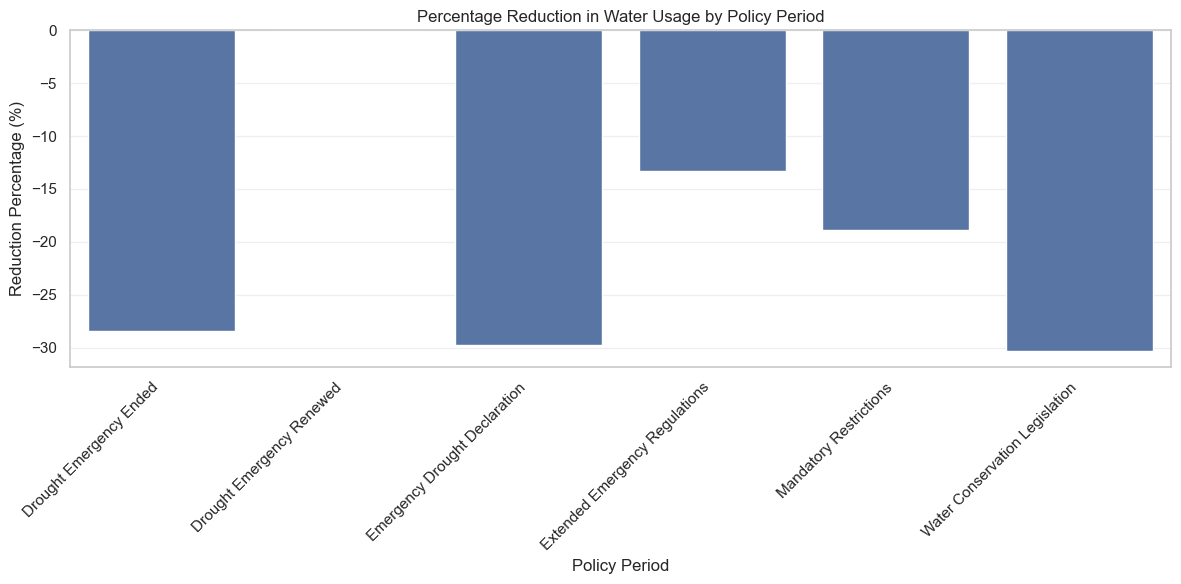

In [329]:
# Check if 'Pre-Policy' exists before calculating reduction
if 'Pre-Policy' in policy_impact['policy_period'].values:
    pre_policy_usage = policy_impact.loc[policy_impact['policy_period'] == 'Pre-Policy', 'mean'].values[0]
else:
    # If missing, use the earliest policy period mean as baseline
    pre_policy_usage = policy_impact['mean'].min()

policy_impact['reduction_percent'] = (pre_policy_usage - policy_impact['mean']) / pre_policy_usage * 100

# Create a bar chart showing reduction percentages
plt.figure(figsize=(12, 6))
sns.barplot(x='policy_period', y='reduction_percent', data=policy_impact)
plt.title('Percentage Reduction in Water Usage by Policy Period')
plt.xlabel('Policy Period')
plt.ylabel('Reduction Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/policy_reduction_comparison.svg', dpi=300)
plt.show()
plt.close()

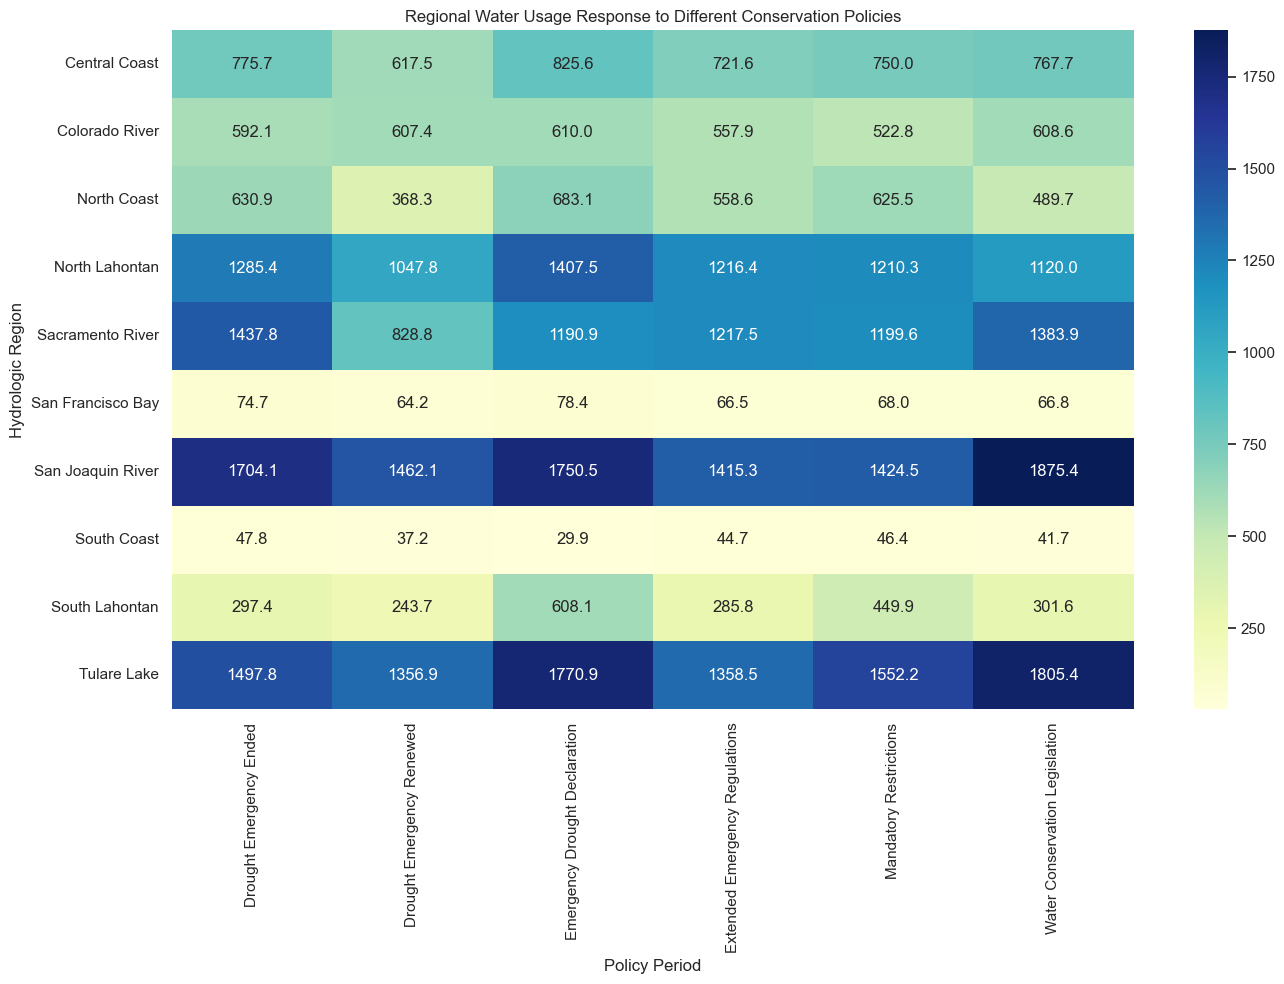

In [330]:
# Analyze regional response to different policies
regional_policy_impact = sample_df.groupby(['hydrologic_region', 'policy_period'])['water_usage_per_capita'].mean().reset_index()
regional_policy_pivot = regional_policy_impact.pivot(index='hydrologic_region', 
                                                    columns='policy_period', 
                                                    values='water_usage_per_capita')

# Create a heatmap of regional response to policies
plt.figure(figsize=(14, 10))
sns.heatmap(regional_policy_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Regional Water Usage Response to Different Conservation Policies')
plt.ylabel('Hydrologic Region')
plt.xlabel('Policy Period')
plt.tight_layout()
plt.savefig('images/regional_policy_heatmap.svg', dpi=300)
plt.show()
plt.close()

## Clustering Analysis

To group suppliers with similar metrics

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [332]:
# Prepare data for clustering with climate and water quality features
supplier_metrics = sample_df.groupby('supplier_name').agg({
    # Original features
    'water_usage_per_capita': 'mean',
    'total_population_served': 'mean',
    'reported_final_total_potable_water_production': 'mean',
    'final_percent_residential_use': 'mean',
    'reported_recycled_water': 'mean',
    'percent_non_revenue': 'mean',
    'climate_zone': 'first',  # Take the most common climate zone
    'county_under_drought_declaration': 'mean',  # Percentage of time under drought
    
    # Climate features
    'precip': 'mean',
    'ETo_mm': 'mean',
    'max_temp': 'mean',
    'min_temp': 'mean',
    'avg_temp': 'mean',
    'palmer_hydro': 'mean',
    'palmer_z_index': 'mean',
    
    # Water quality features
    'DissolvedOxygen': 'mean',
    'pH': 'mean',
    'ElectricalConductance': 'mean'
}).reset_index()

# Select features for clustering - now including climate and water quality variables
cluster_features = [
    # Original features
    'water_usage_per_capita', 
    'total_population_served',
    'final_percent_residential_use', 
    'percent_non_revenue',
    
    # Climate features
    'precip',
    'max_temp',  # Temperature is often a key driver of water usage
    'palmer_hydro',  # Drought index is important for water management
    
    # Water quality features
    'pH',
    'DissolvedOxygen'
]

In [333]:
# Scale the data
X = supplier_metrics[cluster_features].copy()
X['total_population_served'] = np.log1p(X['total_population_served'])  # Log transform population
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

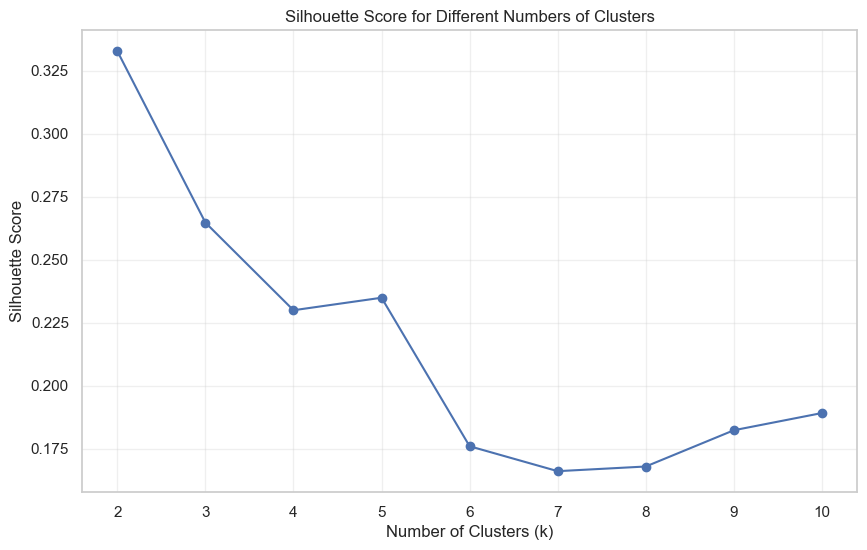

In [334]:
# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True, alpha=0.3)
plt.savefig('images/silhouette_scores.svg', dpi=300)
plt.show()
plt.close()

In [335]:
# Choose optimal k based on silhouette score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
supplier_metrics['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
supplier_metrics['pca_1'] = X_pca[:, 0]
supplier_metrics['pca_2'] = X_pca[:, 1]

Optimal number of clusters: 2


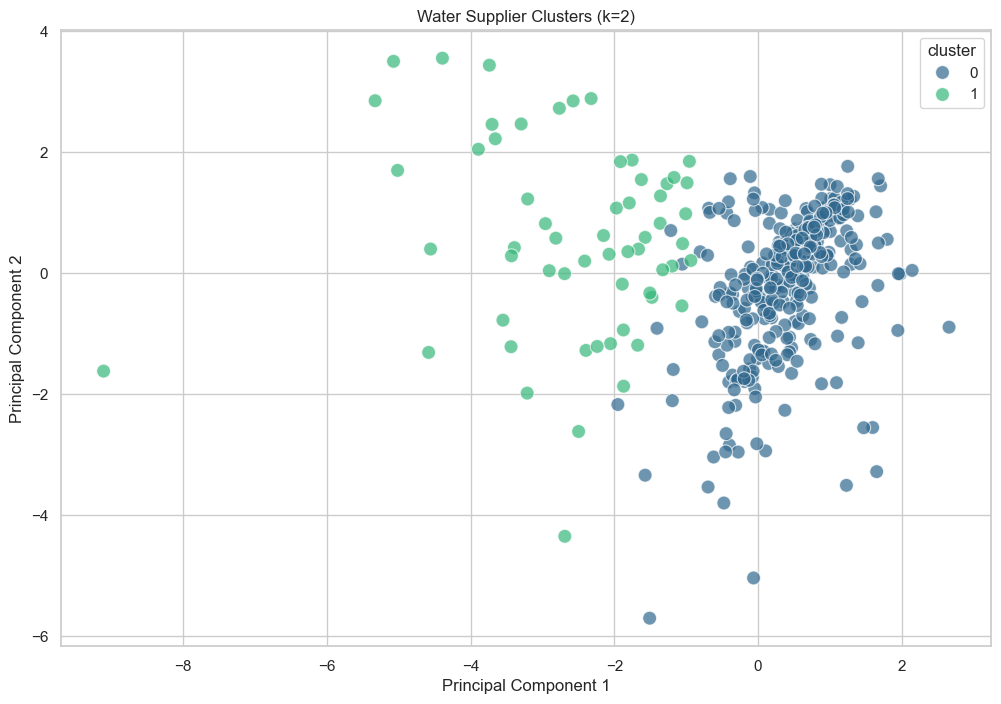

In [336]:
# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', palette='viridis', 
                data=supplier_metrics, s=100, alpha=0.7)
plt.title(f'Water Supplier Clusters (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('images/supplier_clusters.svg', dpi=300)
plt.show()
plt.close()

In [337]:
# Analyze cluster characteristics
cluster_profiles = supplier_metrics.groupby('cluster').agg({
    'water_usage_per_capita': 'mean',
    'total_population_served': 'mean',
    'final_percent_residential_use': 'mean',
    'percent_non_revenue': 'mean',
    # New climate features
    'precip': 'mean',
    'max_temp': 'mean',
    'palmer_hydro': 'mean',
    # New water quality features
    'pH': 'mean',
    'DissolvedOxygen': 'mean',
    # Count of suppliers
    'supplier_name': 'count'
}).rename(columns={'supplier_name': 'count'})

print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         water_usage_per_capita  total_population_served  \
cluster                                                    
0                    521.268597             90467.504157   
1                    596.184357             37376.025377   

         final_percent_residential_use  percent_non_revenue    precip  \
cluster                                                                 
0                            69.918753             1.567583  1.643194   
1                            67.902690             2.974369  1.584634   

          max_temp  palmer_hydro        pH  DissolvedOxygen  count  
cluster                                                             
0        72.508547     -2.410860  8.114005         9.009804    352  
1        72.894465     -2.800901  8.086188         9.298457     59  


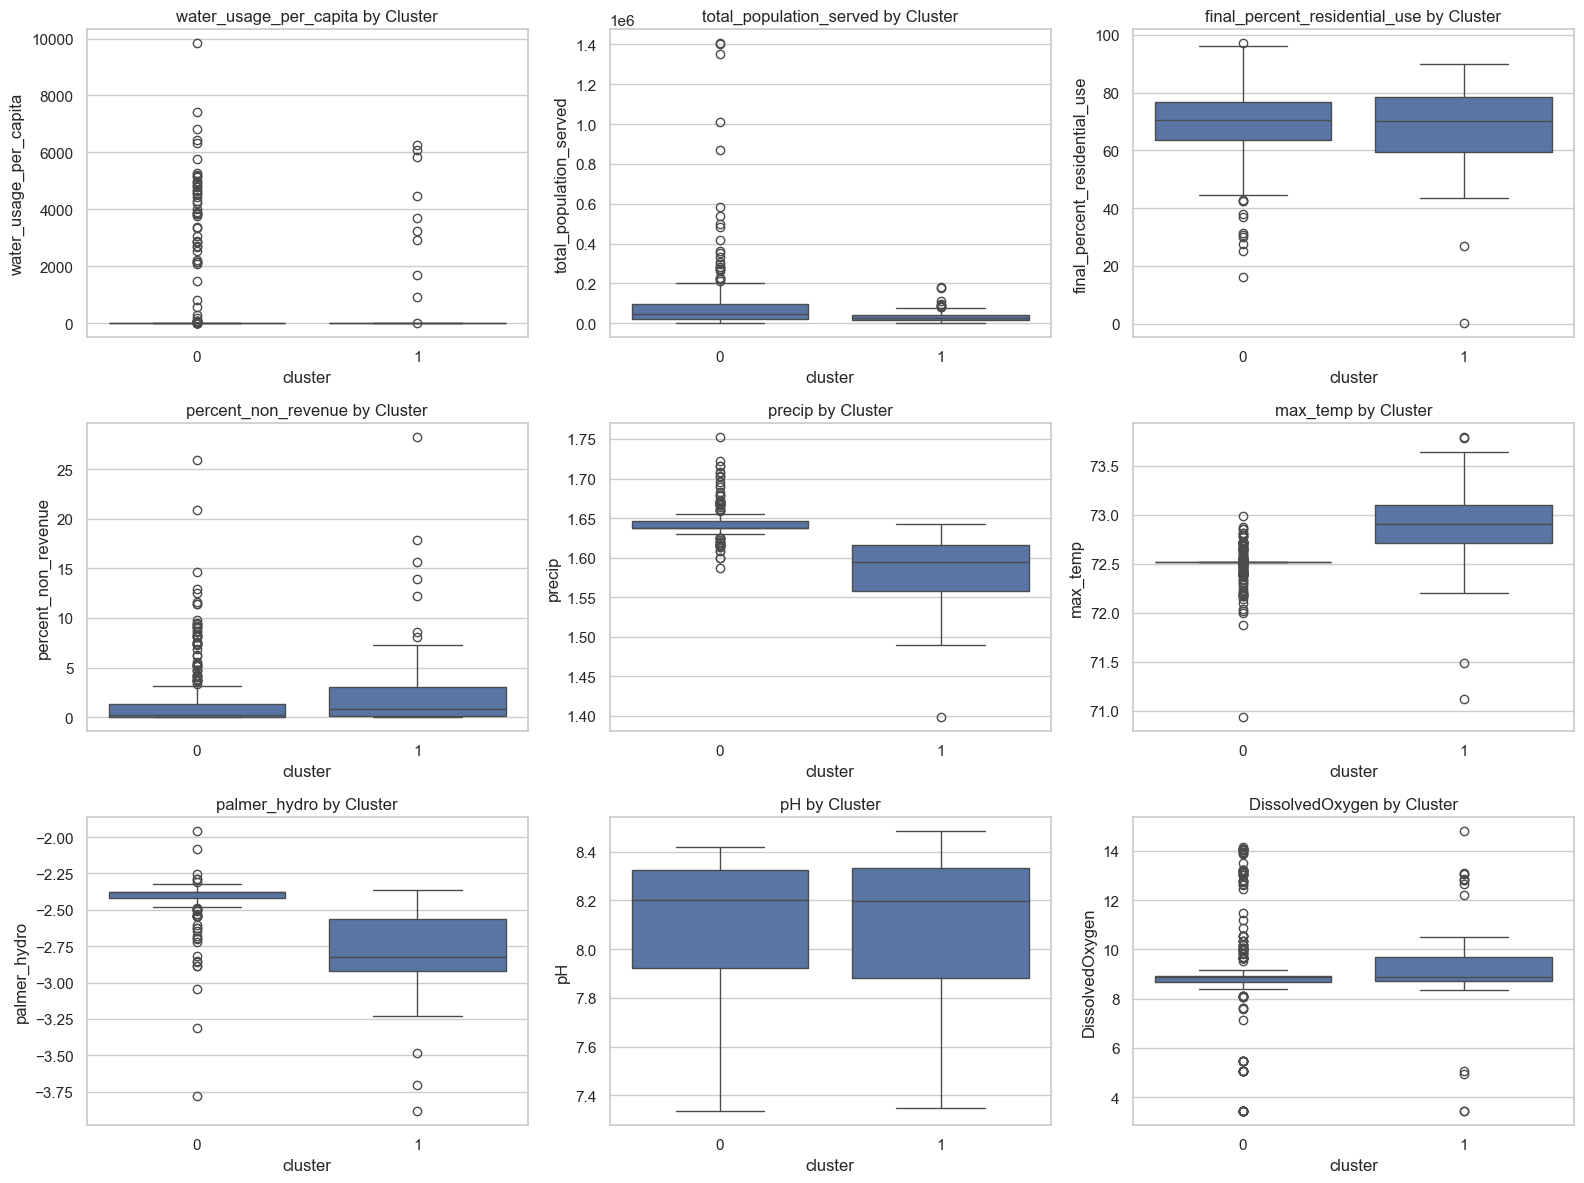

In [338]:
# Visualize cluster characteristics - update subplot dimensions for more features
plt.figure(figsize=(16, 12))
num_features = len(cluster_features)
rows = 3  # Increase rows to accommodate more features
cols = 3  # Increase columns to accommodate more features

for i, feature in enumerate(cluster_features):
    if i < num_features:  # Ensure we don't exceed the number of features
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x='cluster', y=feature, data=supplier_metrics)
        plt.title(f'{feature} by Cluster')
        
plt.tight_layout()
plt.savefig('images/cluster_characteristics.svg', dpi=300)
plt.show()
plt.close()

In [340]:
supplier_metrics.to_csv('supplier_clusters.csv')